### Importation des Librairies & Configurations Préliminaires

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import logging
import pathlib as pl
from logging.config import dictConfig
from typing import Optional, Union
import datetime

from box import Box
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as subplots

from sklearn.metrics import mean_squared_error, mean_absolute_error


pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 600)
pd.set_option("mode.chained_assignment", "raise")


# Set the path to the root directory of the project
def set_paths() -> None:
    """ set correct working directory and python path (also when started from within PyCharm)  """

    # only change the directory if we have not yet done so
    if "cwd" not in globals():
        global cwd
        cwd = os.path.join(os.getcwd(), os.pardir)
        os.chdir(cwd)


set_paths()

### Importation des Données

In [3]:
folder_path = './data/input/base_ciel'
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

In [4]:
excel_files

['Rad Abidjan  Janvier 2018.xlsx',
 'Rad Abidjan Aout 2017.xlsx',
 'Rad Abidjan Aout 2018.xlsx',
 'Rad Abidjan Avril 2017.xlsx',
 'Rad Abidjan Avril 2018.xlsx',
 'Rad Abidjan Decembre 2017.xlsx',
 'Rad Abidjan Decembre 2018.xlsx',
 'Rad Abidjan février 2017.xlsx',
 'Rad Abidjan Février 2018.xlsx',
 'Rad Abidjan Janvier 2017.xlsx',
 'Rad Abidjan juillet 2017.xlsx',
 'Rad Abidjan Juillet 2018.xlsx',
 'Rad Abidjan Juin 2017.xlsx',
 'Rad Abidjan Juin 2018.xlsx',
 'Rad Abidjan Mai 2017.xlsx',
 'Rad Abidjan Mai 2018.xlsx',
 'Rad Abidjan Mars 2017.xlsx',
 'Rad Abidjan Mars 2018.xlsx',
 'Rad Abidjan Novembre 2017.xlsx',
 'Rad Abidjan Novembre 2018.xlsx',
 'Rad Abidjan octobre 2017.xlsx',
 'Rad Abidjan Octobre 2018.xlsx',
 'Rad Abidjan Septembre 2018.xlsx',
 'Rad Abidjan Spetembre 2017.xlsx',
 "Rad M'Brimbo Aout  2018.xlsx",
 "Rad M'Brimbo Aout 2017.xlsx",
 "Rad M'Brimbo Avril 2017.xlsx",
 "Rad M'Brimbo Avril 2018.xlsx",
 "Rad M'Brimbo Decembre 2017.xlsx",
 "Rad M'Brimbo Decembre 2018.xlsx",
 "

In [7]:
df_list = []

for file in excel_files:
    print("reading file", file)

    df = pd.read_excel(os.path.join(folder_path, file))
    
    print("Les colonnes de df avant", df.columns)
    
    df.rename(columns={'Date-time     ': 'Datetime',
                  'Unnamed: 0': 'Datetime',
                      'Year': 'Année',
                      'Month': 'Mois',
                      'Day': 'Jour',
                      'Hour': 'Heure',
                      'Minute': 'Minutes',
                      'minute': 'Minutes',
                      'minutes': 'Minutes',
                      'hour': 'Heure',
                      'day': 'Jour',
                      'Jours': 'Jour',
                      'year': 'Année',
                      'month': 'Mois',
                      }, inplace=True)
    
    print("Les colonnes de df après", df.columns)


    df_list.append(df)


    final_df = pd.concat(df_list, ignore_index=True)

reading file Rad Abidjan  Janvier 2018.xlsx
Les colonnes de df avant Index(['Date-time     ', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'TB5',
       'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
reading file Rad Abidjan Aout 2017.xlsx
Les colonnes de df avant Index(['Date-time     ', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Nam

Les colonnes de df avant Index(['Date-time     ', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'TB5',
       'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11'],
      dtype='object')
reading file Rad Abidjan Mars 2017.xlsx
Les colonnes de df avant Index(['Date-time     ', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'T

Les colonnes de df avant Index(['Date-time     ', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'TB5',
       'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
reading file Rad M'Brimbo Février  2018.xlsx
Les colonnes de df avant Index(['Date-time     ', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'A

Les colonnes de df avant Index(['Date-time     ', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'TB5',
       'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
reading file Rad M'Brimbo Septembre 2018.xlsx
Les colonnes de df avant Index(['Date-time     ', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'AL

Les colonnes de df avant Index(['Date-time     ', 'Year', 'Month', 'Day', 'Hour', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'TB5',
       'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
reading file Rad YAKRO Juin 2018.xlsx
Les colonnes de df avant Index(['Date-time     ', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes',
       'StationNum', 'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3',
       'TB4', 'TB5', 'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')
Les colonnes de df après Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', '

In [8]:
final_df['Name'].value_counts()

Abidjan         49669
Yamoussoukro    48515
M’Brimbo        34455
M達rimbo         14920
Name: Name, dtype: int64

In [9]:
final_df[final_df['Neighb']!="OO"]['Neighb'].value_counts()

se    4464
ss    4464
sw    4464
ee    4464
ww    4464
ne    4464
nn    4464
nw    4464
Name: Neighb, dtype: int64

In [10]:
final_df[final_df.index==68021]

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
68021,'201811011357,2018,11,1,13,57,2.0,M達rimbo,-4.9,6.04,OO,300.5,631.7,353.3,284.7,215.9,229.0,241.3,221.2,233.4,225.8,201.6,0.0


In [11]:
df = final_df[(final_df['Neighb']=="OO") | (final_df['Neighb']=="oo") | (final_df['Neighb']=="oO") | (final_df['Neighb']=="oo") ]

In [12]:
final_df.shape


(147559, 23)

In [13]:
df.shape

(111847, 23)

In [14]:
df['Name'].value_counts()

Abidjan         37765
Yamoussoukro    36611
M’Brimbo        22551
M達rimbo         14920
Name: Name, dtype: int64

In [15]:
df.columns

Index(['Datetime', 'Année', 'Mois', 'Jour', 'Heure', 'Minutes', 'StationNum',
       'Name', 'Long', 'Lat', 'Neighb', 'ALB1', 'ALB2', 'ALB3', 'TB4', 'TB5',
       'TB6', 'TB7', 'TB8', 'TB9', 'TB10', 'TB11', 'ALB12'],
      dtype='object')

In [16]:
null_rows = df[df['Datetime'].isna() | df['Année'].isna() ]

null_rows

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12


In [17]:
df

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201801010612,2018,1,1,6,12,1.0,Abidjan,-3.98,5.34,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201801010627,2018,1,1,6,27,1.0,Abidjan,-3.98,5.34,OO,4.3,5.7,4.7,212.5,152.9,151.9,147.8,134.6,133.0,124.7,111.4,0.0
2,'201801010642,2018,1,1,6,42,1.0,Abidjan,-3.98,5.34,OO,15.0,14.1,16.6,229.3,167.0,168.3,166.5,151.8,151.9,143.3,128.0,0.0
3,'201801010657,2018,1,1,6,57,1.0,Abidjan,-3.98,5.34,OO,30.0,33.9,33.2,239.9,176.0,179.0,179.0,163.4,164.9,156.2,139.5,0.0
4,'201801010712,2018,1,1,7,12,1.0,Abidjan,-3.98,5.34,OO,47.1,53.7,54.5,248.0,183.0,187.6,189.1,172.8,175.6,166.9,149.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147554,'201809301657,2018,9,30,16,57,1.0,Yamoussoukro,-5.24,6.87,OO,173.2,286.6,197.5,272.3,204.6,214.4,222.5,203.7,211.9,203.7,181.9,0.0
147555,'201809301712,2018,9,30,17,12,1.0,Yamoussoukro,-5.24,6.87,OO,106.4,200.4,111.6,261.1,194.6,201.8,206.6,188.9,194.4,185.8,165.9,0.0
147556,'201809301727,2018,9,30,17,27,1.0,Yamoussoukro,-5.24,6.87,OO,93.9,178.1,132.5,264.4,197.5,205.4,211.1,193.1,199.3,190.8,170.4,0.0
147557,'201809301742,2018,9,30,17,42,1.0,Yamoussoukro,-5.24,6.87,OO,160.7,233.8,174.3,269.8,202.3,211.5,218.8,200.2,207.8,199.5,178.1,0.0


In [18]:
def map_town(value):
    """ Utils """
    if value in ["M達rimbo", "M’Brimbo"]:
        return "M'Brimbo"
    else:
        return value

In [19]:
df_ = df.copy()

In [20]:
df_['Name'] = df_['Name'].apply(map_town)

In [21]:
df_

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201801010612,2018,1,1,6,12,1.0,Abidjan,-3.98,5.34,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201801010627,2018,1,1,6,27,1.0,Abidjan,-3.98,5.34,OO,4.3,5.7,4.7,212.5,152.9,151.9,147.8,134.6,133.0,124.7,111.4,0.0
2,'201801010642,2018,1,1,6,42,1.0,Abidjan,-3.98,5.34,OO,15.0,14.1,16.6,229.3,167.0,168.3,166.5,151.8,151.9,143.3,128.0,0.0
3,'201801010657,2018,1,1,6,57,1.0,Abidjan,-3.98,5.34,OO,30.0,33.9,33.2,239.9,176.0,179.0,179.0,163.4,164.9,156.2,139.5,0.0
4,'201801010712,2018,1,1,7,12,1.0,Abidjan,-3.98,5.34,OO,47.1,53.7,54.5,248.0,183.0,187.6,189.1,172.8,175.6,166.9,149.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147554,'201809301657,2018,9,30,16,57,1.0,Yamoussoukro,-5.24,6.87,OO,173.2,286.6,197.5,272.3,204.6,214.4,222.5,203.7,211.9,203.7,181.9,0.0
147555,'201809301712,2018,9,30,17,12,1.0,Yamoussoukro,-5.24,6.87,OO,106.4,200.4,111.6,261.1,194.6,201.8,206.6,188.9,194.4,185.8,165.9,0.0
147556,'201809301727,2018,9,30,17,27,1.0,Yamoussoukro,-5.24,6.87,OO,93.9,178.1,132.5,264.4,197.5,205.4,211.1,193.1,199.3,190.8,170.4,0.0
147557,'201809301742,2018,9,30,17,42,1.0,Yamoussoukro,-5.24,6.87,OO,160.7,233.8,174.3,269.8,202.3,211.5,218.8,200.2,207.8,199.5,178.1,0.0


In [22]:
df_['Name'].value_counts()

Abidjan         37765
M'Brimbo        37471
Yamoussoukro    36611
Name: Name, dtype: int64

In [24]:
df_.to_csv('./modelling_database.csv', index=False)

In [2]:
df_ = pd.read_csv("./modelling_database.csv")

In [3]:
df_sorted = df_.sort_values(by=['Année', 'Mois', 'Jour', 'Heure'] , ascending=True).reset_index(drop=True)

In [4]:
df_sorted

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201701010612,2017,1,1,6,12,1.0,Abidjan,-3.98,5.34,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201701010627,2017,1,1,6,27,1.0,Abidjan,-3.98,5.34,OO,4.2,5.6,4.7,212.5,152.9,151.9,147.8,134.6,133.0,124.7,111.4,0.0
2,'201701010642,2017,1,1,6,42,1.0,Abidjan,-3.98,5.34,OO,16.7,22.3,21.2,233.0,170.2,172.1,170.8,155.8,156.3,147.7,131.9,0.0
3,'201701010657,2017,1,1,6,57,1.0,Abidjan,-3.98,5.34,OO,33.4,39.0,37.7,242.0,177.8,181.2,181.6,165.8,167.6,158.9,141.9,0.0
4,'201701010612,2017,1,1,6,12,2.0,M'Brimbo,-4.90,6.04,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111842,'201812311757,2018,12,31,17,57,2.0,M'Brimbo,-4.90,6.04,OO,33.4,52.9,39.5,243.0,178.7,182.3,182.8,166.9,168.9,160.2,143.1,0.0
111843,'201812311712,2018,12,31,17,12,3.0,Yamoussoukro,-5.24,6.87,OO,85.5,128.0,99.9,259.1,192.7,199.5,203.7,186.3,191.3,182.7,163.1,0.0
111844,'201812311727,2018,12,31,17,27,3.0,Yamoussoukro,-5.24,6.87,OO,85.5,122.4,88.3,256.8,190.7,197.0,200.7,183.5,188.0,179.4,160.1,0.0
111845,'201812311742,2018,12,31,17,42,3.0,Yamoussoukro,-5.24,6.87,OO,54.2,69.6,53.5,248.0,183.0,187.6,189.1,172.8,175.6,166.9,149.0,0.0


### Séparation des Bases de Données par site

In [5]:
df_abidjan, df_yakro, df_mbrimbo = df_sorted[df_sorted['Name'] == "Abidjan"].reset_index(drop=True), df_sorted[df_sorted['Name'] == "Yamoussoukro"].reset_index(drop=True), df_sorted[df_sorted['Name'] == "M'Brimbo"].reset_index(drop=True) 

In [6]:
df_abidjan

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201701010612,2017,1,1,6,12,1.0,Abidjan,-3.98,5.34,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201701010627,2017,1,1,6,27,1.0,Abidjan,-3.98,5.34,OO,4.2,5.6,4.7,212.5,152.9,151.9,147.8,134.6,133.0,124.7,111.4,0.0
2,'201701010642,2017,1,1,6,42,1.0,Abidjan,-3.98,5.34,OO,16.7,22.3,21.2,233.0,170.2,172.1,170.8,155.8,156.3,147.7,131.9,0.0
3,'201701010657,2017,1,1,6,57,1.0,Abidjan,-3.98,5.34,OO,33.4,39.0,37.7,242.0,177.8,181.2,181.6,165.8,167.6,158.9,141.9,0.0
4,'201701010712,2017,1,1,7,12,1.0,Abidjan,-3.98,5.34,OO,54.3,64.1,61.3,250.1,184.9,189.8,191.8,175.3,178.5,169.8,151.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37760,'201812311657,2018,12,31,16,57,1.0,Abidjan,-3.98,5.34,OO,58.4,66.8,76.7,254.3,188.5,194.3,197.3,180.3,184.3,175.7,156.9,0.0
37761,'201812311712,2018,12,31,17,12,1.0,Abidjan,-3.98,5.34,OO,62.6,72.4,88.3,256.8,190.7,197.0,200.7,183.5,188.0,179.4,160.1,0.0
37762,'201812311727,2018,12,31,17,27,1.0,Abidjan,-3.98,5.34,OO,73.0,94.6,65.1,251.4,186.0,191.2,193.5,176.8,180.3,171.6,153.2,0.0
37763,'201812311742,2018,12,31,17,42,1.0,Abidjan,-3.98,5.34,OO,58.4,69.6,58.1,249.4,184.3,189.1,191.0,174.5,177.5,168.8,150.8,0.0


In [7]:
df_abidjan  = df_abidjan.drop_duplicates()

In [8]:
df_abidjan.shape

(34816, 23)

In [9]:
df_yakro

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201701010612,2017,1,1,6,12,3.0,Yamoussoukro,-5.24,6.87,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201701010627,2017,1,1,6,27,3.0,Yamoussoukro,-5.24,6.87,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'201701010642,2017,1,1,6,42,3.0,Yamoussoukro,-5.24,6.87,OO,8.4,11.2,9.4,221.5,160.4,160.6,157.6,143.6,142.8,134.4,120.0,0.0
3,'201701010657,2017,1,1,6,57,3.0,Yamoussoukro,-5.24,6.87,OO,25.1,30.7,28.3,237.4,173.9,176.5,176.0,160.6,161.8,153.1,136.7,0.0
4,'201701010712,2017,1,1,7,12,3.0,Yamoussoukro,-5.24,6.87,OO,52.2,64.1,61.3,250.1,184.9,189.8,191.8,175.3,178.5,169.8,151.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36606,'201812311657,2018,12,31,16,57,3.0,Yamoussoukro,-5.24,6.87,OO,89.7,136.4,113.9,261.5,194.9,202.2,207.1,189.4,194.9,186.4,166.4,0.0
36607,'201812311712,2018,12,31,17,12,3.0,Yamoussoukro,-5.24,6.87,OO,85.5,128.0,99.9,259.1,192.7,199.5,203.7,186.3,191.3,182.7,163.1,0.0
36608,'201812311727,2018,12,31,17,27,3.0,Yamoussoukro,-5.24,6.87,OO,85.5,122.4,88.3,256.8,190.7,197.0,200.7,183.5,188.0,179.4,160.1,0.0
36609,'201812311742,2018,12,31,17,42,3.0,Yamoussoukro,-5.24,6.87,OO,54.2,69.6,53.5,248.0,183.0,187.6,189.1,172.8,175.6,166.9,149.0,0.0


In [10]:
df_yakro  = df_yakro.drop_duplicates()
df_yakro

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201701010612,2017,1,1,6,12,3.0,Yamoussoukro,-5.24,6.87,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201701010627,2017,1,1,6,27,3.0,Yamoussoukro,-5.24,6.87,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'201701010642,2017,1,1,6,42,3.0,Yamoussoukro,-5.24,6.87,OO,8.4,11.2,9.4,221.5,160.4,160.6,157.6,143.6,142.8,134.4,120.0,0.0
3,'201701010657,2017,1,1,6,57,3.0,Yamoussoukro,-5.24,6.87,OO,25.1,30.7,28.3,237.4,173.9,176.5,176.0,160.6,161.8,153.1,136.7,0.0
4,'201701010712,2017,1,1,7,12,3.0,Yamoussoukro,-5.24,6.87,OO,52.2,64.1,61.3,250.1,184.9,189.8,191.8,175.3,178.5,169.8,151.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36606,'201812311657,2018,12,31,16,57,3.0,Yamoussoukro,-5.24,6.87,OO,89.7,136.4,113.9,261.5,194.9,202.2,207.1,189.4,194.9,186.4,166.4,0.0
36607,'201812311712,2018,12,31,17,12,3.0,Yamoussoukro,-5.24,6.87,OO,85.5,128.0,99.9,259.1,192.7,199.5,203.7,186.3,191.3,182.7,163.1,0.0
36608,'201812311727,2018,12,31,17,27,3.0,Yamoussoukro,-5.24,6.87,OO,85.5,122.4,88.3,256.8,190.7,197.0,200.7,183.5,188.0,179.4,160.1,0.0
36609,'201812311742,2018,12,31,17,42,3.0,Yamoussoukro,-5.24,6.87,OO,54.2,69.6,53.5,248.0,183.0,187.6,189.1,172.8,175.6,166.9,149.0,0.0


In [11]:
df_mbrimbo

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201701010612,2017,1,1,6,12,2.0,M'Brimbo,-4.9,6.04,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201701010627,2017,1,1,6,27,2.0,M'Brimbo,-4.9,6.04,OO,0.0,2.8,2.4,0.0,0.0,144.2,0.0,0.0,0.0,116.4,104.0,0.0
2,'201701010642,2017,1,1,6,42,2.0,M'Brimbo,-4.9,6.04,OO,10.4,13.9,11.8,224.6,163.0,163.6,161.0,146.8,146.3,137.8,123.1,0.0
3,'201701010657,2017,1,1,6,57,2.0,M'Brimbo,-4.9,6.04,OO,20.9,27.9,23.6,234.6,171.5,173.7,172.7,157.5,158.3,149.6,133.6,0.0
4,'201701010712,2017,1,1,7,12,2.0,M'Brimbo,-4.9,6.04,OO,41.8,61.3,44.8,244.8,180.3,184.2,185.1,169.0,171.3,162.6,145.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37466,'201812311657,2018,12,31,16,57,2.0,M'Brimbo,-4.9,6.04,OO,85.5,153.1,95.3,258.2,192.0,198.6,202.6,185.2,190.0,181.4,162.0,0.0
37467,'201812311712,2018,12,31,17,12,2.0,M'Brimbo,-4.9,6.04,OO,75.1,122.4,81.3,255.3,189.4,195.4,198.7,181.6,185.8,177.2,158.2,0.0
37468,'201812311727,2018,12,31,17,27,2.0,M'Brimbo,-4.9,6.04,OO,58.4,91.8,65.1,251.4,186.0,191.2,193.5,176.8,180.3,171.6,153.2,0.0
37469,'201812311742,2018,12,31,17,42,2.0,M'Brimbo,-4.9,6.04,OO,41.7,64.0,46.5,245.6,181.0,185.1,186.2,170.0,172.4,163.7,146.2,0.0


In [12]:
df_mbrimbo  = df_mbrimbo.drop_duplicates()
df_mbrimbo

,Datetime,Année,Mois,Jour,Heure,Minutes,StationNum,Name,Long,Lat,Neighb,ALB1,ALB2,ALB3,TB4,TB5,TB6,TB7,TB8,TB9,TB10,TB11,ALB12
0,'201701010612,2017,1,1,6,12,2.0,M'Brimbo,-4.9,6.04,OO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'201701010627,2017,1,1,6,27,2.0,M'Brimbo,-4.9,6.04,OO,0.0,2.8,2.4,0.0,0.0,144.2,0.0,0.0,0.0,116.4,104.0,0.0
2,'201701010642,2017,1,1,6,42,2.0,M'Brimbo,-4.9,6.04,OO,10.4,13.9,11.8,224.6,163.0,163.6,161.0,146.8,146.3,137.8,123.1,0.0
3,'201701010657,2017,1,1,6,57,2.0,M'Brimbo,-4.9,6.04,OO,20.9,27.9,23.6,234.6,171.5,173.7,172.7,157.5,158.3,149.6,133.6,0.0
4,'201701010712,2017,1,1,7,12,2.0,M'Brimbo,-4.9,6.04,OO,41.8,61.3,44.8,244.8,180.3,184.2,185.1,169.0,171.3,162.6,145.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37466,'201812311657,2018,12,31,16,57,2.0,M'Brimbo,-4.9,6.04,OO,85.5,153.1,95.3,258.2,192.0,198.6,202.6,185.2,190.0,181.4,162.0,0.0
37467,'201812311712,2018,12,31,17,12,2.0,M'Brimbo,-4.9,6.04,OO,75.1,122.4,81.3,255.3,189.4,195.4,198.7,181.6,185.8,177.2,158.2,0.0
37468,'201812311727,2018,12,31,17,27,2.0,M'Brimbo,-4.9,6.04,OO,58.4,91.8,65.1,251.4,186.0,191.2,193.5,176.8,180.3,171.6,153.2,0.0
37469,'201812311742,2018,12,31,17,42,2.0,M'Brimbo,-4.9,6.04,OO,41.7,64.0,46.5,245.6,181.0,185.1,186.2,170.0,172.4,163.7,146.2,0.0


### Calcul de la Radiance

In [13]:
def calculate_radiance(df):
    """ Calculate Variance """
    
    df_hourly = df.groupby(['Année', 'Mois', 'Jour', 'Heure']).agg(
    ALB1_mean=('ALB1', 'mean'),
    ALB2_mean=('ALB2', 'mean'),
    Lat=('Lat', 'first'),
    Long=('Long', 'first')
).reset_index()

    # Convert radiance values from e-5 Wm-2 sr-1 (cm-1)-1 to mWm-2 sr-1 (cm-1)-1
    df_hourly['ALB1_mean'] *= 1e-2
    df_hourly['ALB2_mean'] *= 1e-2

    # Add a new column 'radiance' which is the mean of the hourly ALB1 and ALB2
    df_hourly['radiance'] = df_hourly[['ALB1_mean', 'ALB2_mean']].mean(axis=1)
    

    
    return df_hourly

### Implémentation du Modele GISTEL

#### Calcul de CN

In [14]:
def calculate_CN(df_hourly):
    """ Calculate CN """
    
    Cal_offset = -1.24169
    Cal_slope = 0.024347
    
    df_hourly['CN'] = (df_hourly['radiance'] - Cal_offset) / Cal_slope
    
    return df_hourly


In [15]:
    def calculate_declination(day_of_year):
        """ Calculate the declination """
        return 23.45 * np.sin(np.deg2rad(360 * (284 + day_of_year) / 365))

    def calculate_B(day_of_year):
        """ Calculate B"""
        return np.deg2rad(360 * (day_of_year - 81) / 365)

    def calculate_equation_of_time(B):
        """ Equation of time """
        return 9.87 * np.sin(2 * B) - 7.35 * np.cos(B) - 1.5 * np.sin(B)

    def calculate_true_solar_time(LST, longitude, equation_of_time):
        """ True solar time"""
        return LST + equation_of_time / 60 + (longitude / 15)

    def calculate_hour_angle(TST):
        """Hour angle"""
        return 15 * (TST - 12)

    def calculate_solar_elevation(latitude, declination, hour_angle):
        return np.arcsin(np.sin(np.deg2rad(latitude)) * np.sin(np.deg2rad(declination)) + 
                         np.cos(np.deg2rad(latitude)) * np.cos(np.deg2rad(declination)) * np.cos(np.deg2rad(hour_angle)))

#### Calcul Des Composantes De L'irradiation Solaire

In [16]:
def calculate_solar_components(df_hourly, altitute):
    """ Calculate Solar """

    df_hourly['datetime'] = pd.to_datetime(dict(year=df_hourly['Année'], month=df_hourly['Mois'], day=df_hourly['Jour']))

    df_hourly['day_of_year'] = df_hourly['datetime'].dt.dayofyear

    # Constants for solar calculations
    lat_rad = np.deg2rad(df_hourly['Lat'])  # Convert latitude to radians
    
    df_hourly = df_hourly[(df_hourly['Heure'] >= 7) & (df_hourly['Heure'] <= 17)]


    # Calculate declination for each day of the year
    df_hourly['declination'] = df_hourly['day_of_year'].apply(calculate_declination)

    # Calculate B for each day of the year
    df_hourly['B'] = df_hourly['day_of_year'].apply(calculate_B)

    # Calculate equation of time for each day of the year
    df_hourly['equation_of_time'] = df_hourly['B'].apply(calculate_equation_of_time)

    # Calculate local solar time (LST)
#     df_hourly['LST'] = df_hourly['Heure'] + df_hourly['Minutes'] / 60 # a voir
    df_hourly['LST'] = df_hourly['Heure'] 

    # Calculate true solar time (TST)
    df_hourly['TST'] = df_hourly.apply(lambda row: calculate_true_solar_time(row['LST'], row['Long'], row['equation_of_time']), axis=1)

    # Calculate hour angle
    df_hourly['hour_angle'] = df_hourly['TST'].apply(calculate_hour_angle)

    # Calculate solar elevation angle (h_s)
    df_hourly['h_s'] = df_hourly.apply(lambda row: calculate_solar_elevation(row['Lat'], row['declination'], row['hour_angle']), axis=1)


    # Calculate Ah
    df_hourly['Ah'] = np.sin(np.deg2rad(360 / 365 * (df_hourly['day_of_year'] - 121)))

    # Calculate T0, T1, T2
    df_hourly['T0'] = 2.4 - 0.9 * np.sin((lat_rad)) + 0.1 * (2 + np.sin(lat_rad)) * df_hourly['Ah'] - 0.2 * altitute - (1.22 + 0.14 * df_hourly['Ah']) * (1 - np.sin(lat_rad))
    df_hourly['T1'] = 0.89 ** altitute
    df_hourly['T2'] = (0.9 + 0.4 * df_hourly['Ah']) * (0.63) ** altitute

    # Calculate TL
    df_hourly['TL'] = df_hourly['T0'] + df_hourly['T1'] + df_hourly['T2']

    # Calculate ε
    df_hourly['epsilon'] = 1 + 0.034 * np.cos(np.deg2rad(0.986 * (df_hourly['day_of_year'] - 3)))

    # Calculate G_CC
    df_hourly['G_CC'] = df_hourly['epsilon'] * (1300 - 57 * df_hourly['TL']) * (np.sin(df_hourly['h_s'])) ** ((df_hourly['TL'] + 36) / 33)

    # Calculate I_CC
    df_hourly['I_CC'] = df_hourly['epsilon'] * (1390 - 31 * df_hourly['TL']) * np.exp(-df_hourly['TL'] / (12.6 * np.sin(df_hourly['h_s'] + 2)))

    # Calculate D_CC
    df_hourly['D_CC'] = 383 * np.exp(-4 / df_hourly['TL']) * (np.sin(df_hourly['h_s'])) ** ((df_hourly['TL'] + 57) / 33)
    
    return df_hourly

#### Calcul Des Coefficients de Reflection

In [17]:
def calculate_reflection(df_hourly):
    """ reflection coefficients """
    
    df_hourly['h_v'] = np.arcsin((1.826 * np.cos(np.deg2rad(df_hourly['Long'])) * np.cos(np.deg2rad(df_hourly['Lat'])) - 0.274) / np.sqrt(3.41 - np.cos(np.deg2rad(df_hourly['Long'])) * np.cos(np.deg2rad(df_hourly['Lat']))))

    df_hourly['T_i'] = ((1390 - 31 * df_hourly['TL']) / 1367) * np.exp(-df_hourly['TL'] / (12.6 * np.sin(df_hourly['h_v'] + 2)))

    df_hourly['CR'] = ((df_hourly['CN']) - 12) / (0.514 * df_hourly['G_CC'] * df_hourly['T_i'])

    
    return df_hourly

#### Calcul de la Radiation Solaire

In [18]:
def calculate_solar_irradiation(df_hourly):
    """ main """
    
    K0 = 0.20

    # Group by Year, Month, Hour and calculate the min and max CR
    df_ref = df_hourly.groupby(['Année', 'Mois', 'Heure']).agg(CR_clear_sky=('CR', 'min'), CR_cloudy_sky=('CR', 'max')).reset_index()

    # Merge the reference CR values back into the original DataFrame
    df_hourly = pd.merge(df_hourly, df_ref, on=['Année', 'Mois', 'Heure'], how='left')

    conditions = [
        (df_hourly['CR'] <= df_hourly['CR_clear_sky']),
        (df_hourly['CR'] > df_hourly['CR_clear_sky']) & (df_hourly['CR'] < df_hourly['CR_cloudy_sky']),
        (df_hourly['CR'] >= df_hourly['CR_cloudy_sky'])
    ]
    choices = [
        1,
        1 - (1 - K0) * (df_hourly['CR'] - df_hourly['CR_clear_sky']) / (df_hourly['CR_cloudy_sky'] - df_hourly['CR_clear_sky']),
        K0
    ]
    df_hourly['Kt_Gistel'] = np.select(conditions, choices, default=0)

    df_hourly['G_cal_Gistel'] = df_hourly['Kt_Gistel'] * df_hourly['G_CC']
    
    return df_hourly

#### Construction Finale du Modèle Gistel

In [19]:
def build_gistel(df, altitude):
    """ build  gistel model """
    
    # step 1
    df_hourly = calculate_radiance(df)
    
    df_hourly = calculate_CN(df_hourly)
    
    df_hourly_ = calculate_solar_components(df_hourly, altitude)
    
    df_hourly = calculate_reflection(df_hourly_)
    
    df_hourly = calculate_solar_irradiation(df_hourly)
        
    return df_hourly

In [20]:
pd.set_option('mode.chained_assignment', None)


#### Application du Modèle Gistel par Site

##### Abidjan

In [21]:
df_hourly_abidjan = build_gistel(df_abidjan, 0.048)

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df_hourly_abidjan[(df_hourly_abidjan['Année'] == 2017) & (df_hourly_abidjan['Mois'] == 1) & (df_hourly_abidjan['Heure'] == 7) ]

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,CN,datetime,day_of_year,declination,B,equation_of_time,LST,TST,hour_angle,h_s,Ah,T0,T1,T2,TL,epsilon,G_CC,I_CC,D_CC,h_v,T_i,CR,CR_clear_sky,CR_cloudy_sky,Kt_Gistel,G_cal_Gistel
0,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,90.778741,2017-01-01,1,-23.011637,-1.377137,-3.670537,7,6.673491,-79.897634,0.124691,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,103.306047,1055.017647,1.963610,1.432249,1.997124,0.742874,0.691896,2.055382,0.970089,100.216095
11,2017,1,2,7,0.77800,0.95475,5.34,-3.98,0.866375,86.584179,2017-01-02,2,-22.930544,-1.359922,-4.112033,7,6.666133,-80.008008,0.123157,-0.888057,1.127062,0.994422,0.532828,2.654312,1.033995,101.872347,1055.750974,1.916713,1.432249,1.995198,0.713906,0.691896,2.055382,0.987086,100.556722
22,2017,1,3,7,0.72100,0.87850,5.34,-3.98,0.799750,83.847702,2017-01-03,3,-22.842656,-1.342708,-4.548720,7,6.658855,-80.117180,0.121658,-0.895839,1.126421,0.994422,0.529784,2.650627,1.034000,100.471431,1056.451792,1.871479,1.432249,1.993337,0.697953,0.691896,2.055382,0.996446,100.114319
33,2017,1,4,7,0.75750,0.89225,5.34,-3.98,0.824875,84.879657,2017-01-04,4,-22.747999,-1.325494,-4.980194,7,6.651663,-80.225048,0.120195,-0.903356,1.125803,0.994422,0.526843,2.647068,1.033995,99.104452,1057.119838,1.827901,1.432249,1.991541,0.718391,0.691896,2.055382,0.984454,97.563812
44,2017,1,5,7,0.66850,0.80150,5.34,-3.98,0.735000,81.188237,2017-01-05,5,-22.646602,-1.308280,-5.406059,7,6.644566,-80.331515,0.118770,-0.910605,1.125206,0.994422,0.524007,2.643635,1.033980,97.772540,1057.754859,1.785971,1.432249,1.989810,0.691896,0.691896,2.055382,1.000000,97.772540
55,2017,1,6,7,0.71050,0.88525,5.34,-3.98,0.797875,83.770690,2017-01-06,6,-22.538493,-1.291065,-5.825924,7,6.637568,-80.436481,0.117382,-0.917584,1.124631,0.994422,0.521277,2.640330,1.033955,96.476795,1058.356619,1.745682,1.432249,1.988146,0.727969,0.691896,2.055382,0.978835,94.434820
66,2017,1,7,7,0.70525,0.84350,5.34,-3.98,0.774375,82.805479,2017-01-07,7,-22.423707,-1.273851,-6.239406,7,6.630677,-80.539852,0.116035,-0.924291,1.124079,0.994422,0.518653,2.637154,1.033919,95.218290,1058.924892,1.707023,1.432249,1.986547,0.728257,0.691896,2.055382,0.978666,93.186884
77,2017,1,8,7,0.73625,0.89200,5.34,-3.98,0.814125,84.438124,2017-01-08,8,-22.302275,-1.256637,-6.646131,7,6.623898,-80.641533,0.114727,-0.930724,1.123549,0.994422,0.516136,2.634107,1.033874,93.998070,1059.459463,1.669984,1.432249,1.985015,0.755303,0.691896,2.055382,0.962797,90.501038
88,2017,1,9,7,1.25850,1.58225,5.34,-3.98,1.420375,109.338522,2017-01-09,9,-22.174235,-1.239423,-7.045729,7,6.617238,-80.741432,0.113462,-0.936881,1.123042,0.994422,0.513727,2.631191,1.033819,92.817151,1059.960134,1.634556,1.432249,1.983550,1.028609,0.691896,2.055382,0.802440,74.480171
99,2017,1,10,7,0.78850,0.97575,5.34,-3.98,0.882125,87.231076,2017-01-10,10,-22.039625,-1.222209,-7.437841,7,6.610703,-80.839460,0.112240,-0.942761,1.122558,0.994422,0.511427,2.628407,1.033754,91.676519,1060.426714,1.600727,1.432249,1.982152,0.805451,0.691896,2.055382,0.933373,85.568427


In [23]:
df_hourly_abidjan

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,CN,datetime,day_of_year,declination,B,equation_of_time,LST,TST,hour_angle,h_s,Ah,T0,T1,T2,TL,epsilon,G_CC,I_CC,D_CC,h_v,T_i,CR,CR_clear_sky,CR_cloudy_sky,Kt_Gistel,G_cal_Gistel
0,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,90.778741,2017-01-01,1,-23.011637,-1.377137,-3.670537,7,6.673491,-79.897634,0.124691,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,103.306047,1055.017647,1.963610,1.432249,1.997124,0.742874,0.691896,2.055382,0.970089,100.216095
1,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,119.385961,2017-01-01,1,-23.011637,-1.377137,-3.670537,8,7.673491,-64.897634,0.360137,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,349.955982,1002.080791,12.905963,1.432249,1.997124,0.298928,0.256729,1.031327,0.956418,334.704120
2,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,154.646979,2017-01-01,1,-23.011637,-1.377137,-3.670537,9,8.673491,-49.897634,0.587092,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,594.453476,905.682680,29.234320,1.432249,1.997124,0.233763,0.197090,0.893505,0.957872,569.410243
3,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,207.600115,2017-01-01,1,-23.011637,-1.377137,-3.670537,10,9.673491,-34.897634,0.796986,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,801.943544,724.074094,46.403641,1.432249,1.997124,0.237606,0.145814,0.826762,0.892160,715.462083
4,2017,1,1,11,5.50375,6.79600,5.34,-3.98,6.149875,303.592434,2017-01-01,1,-23.011637,-1.377137,-3.670537,11,10.673491,-19.897634,0.970806,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,948.369537,390.763721,60.110576,1.432249,1.997124,0.299523,0.150709,0.756891,0.803604,762.113780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,222.750852,2018-12-31,365,-23.085911,4.888835,-3.224639,13,12.680923,10.213840,1.044988,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,1001.619919,151.235251,65.566730,1.432249,1.999114,0.204770,0.152061,0.593664,0.904514,905.978803
7980,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,271.565901,2018-12-31,365,-23.085911,4.888835,-3.224639,14,13.680923,25.213840,0.914353,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,903.645103,529.244188,55.936605,1.432249,1.999114,0.279543,0.147382,0.585683,0.758775,685.663736
7981,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,134.208116,2018-12-31,365,-23.085911,4.888835,-3.224639,15,14.680923,40.213840,0.724746,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,733.480712,802.250685,40.538798,1.432249,1.999114,0.162148,0.141432,0.510663,0.955116,700.559061
7982,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,99.285949,2018-12-31,365,-23.085911,4.888835,-3.224639,16,15.680923,55.213840,0.507573,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,509.884145,946.331994,23.130130,1.432249,1.999114,0.166599,0.151429,0.536268,0.968465,493.804998


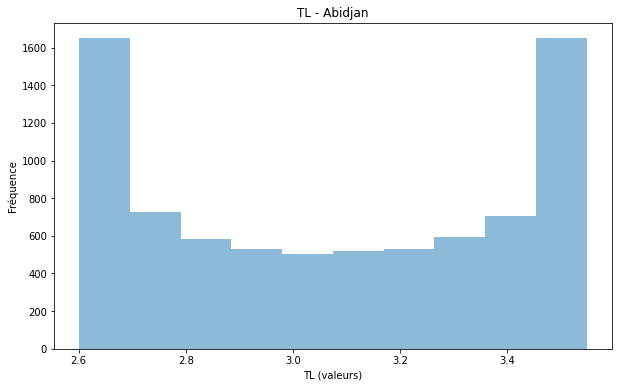

In [24]:
output_dir = './miscellaneous/abidjan'
os.makedirs(output_dir, exist_ok=True)

# Assuming df_hourly_abidjan is your DataFrame
df_hourly_abidjan['TL'].plot.hist(alpha=0.5, figsize=(10, 6))

# Adding title and axis labels
plt.title('TL - Abidjan')
plt.xlabel('TL (valeurs)')
plt.ylabel('Fréquence')

# Saving the plot
output_path = os.path.join(output_dir, 'TL_value.png')
plt.savefig(output_path)

# Displaying the plot
plt.show()

<AxesSubplot:ylabel='Frequency'>

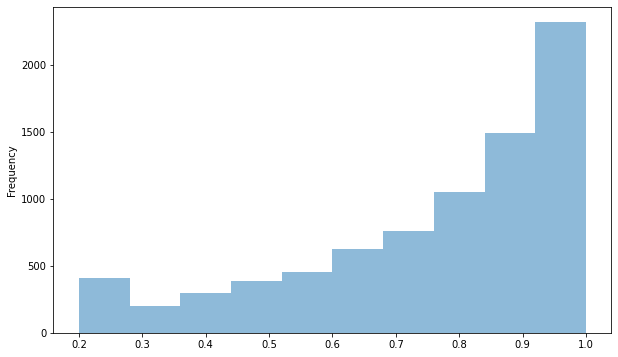

In [25]:
df_hourly_abidjan['Kt_Gistel'].plot.hist(alpha=0.5, figsize=(10, 6))

##### Mbrimbo

In [26]:
df_hourly_mbrimbo = build_gistel(df_mbrimbo, 0.092)

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [27]:
df_hourly_mbrimbo

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,CN,datetime,day_of_year,declination,B,equation_of_time,LST,TST,hour_angle,h_s,Ah,T0,T1,T2,TL,epsilon,G_CC,I_CC,D_CC,h_v,T_i,CR,CR_clear_sky,CR_cloudy_sky,Kt_Gistel,G_cal_Gistel
0,2017,1,1,7,0.67900,1.05950,6.04,-4.9,0.869250,86.702263,2017-01-01,1,-23.011637,-1.377137,-3.670537,7,6.612158,-80.817634,0.105124,-0.880012,1.120247,0.989336,0.525189,2.634773,1.033980,84.890652,1060.969923,1.427338,1.40967,2.107663,0.812287,0.799326,2.195040,0.992571,84.259994
1,2017,1,1,8,1.44150,2.50950,6.04,-4.9,1.975500,132.139073,2017-01-01,1,-23.011637,-1.377137,-3.670537,8,7.612158,-65.817634,0.340352,-0.880012,1.120247,0.989336,0.525189,2.634773,1.033980,329.071922,1011.072752,11.555812,1.40967,2.107663,0.336999,0.288269,0.882687,0.934416,307.490053
2,2017,1,1,9,1.96350,3.58975,6.04,-4.9,2.776625,165.043537,2017-01-01,1,-23.011637,-1.377137,-3.670537,9,8.612158,-50.817634,0.567060,-0.880012,1.120247,0.989336,0.525189,2.634773,1.033980,574.321121,920.696229,27.297950,1.40967,2.107663,0.245978,0.209136,0.702424,0.940252,540.006331
3,2017,1,1,10,2.07325,4.30050,6.04,-4.9,3.186875,181.893662,2017-01-01,1,-23.011637,-1.377137,-3.670537,10,9.612158,-35.817634,0.776913,-0.880012,1.120247,0.989336,0.525189,2.634773,1.033980,784.466498,752.651456,44.173033,1.40967,2.107663,0.199912,0.175471,0.635530,0.957501,751.127092
4,2017,1,1,11,2.35500,4.94900,6.04,-4.9,3.652000,200.997659,2017-01-01,1,-23.011637,-1.377137,-3.670537,11,10.612158,-20.817634,0.951741,-0.880012,1.120247,0.989336,0.525189,2.634773,1.033980,934.913501,446.676829,57.912363,1.40967,2.107663,0.186604,0.163263,0.623414,0.959421,896.975692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,2018,12,31,13,1.73675,4.52925,6.04,-4.9,3.133000,179.680864,2018-12-31,365,-23.085911,4.888835,-3.224639,13,12.619589,9.293840,1.038302,-0.871706,1.120955,0.989336,0.528374,2.638665,1.033951,998.305568,177.455485,64.250254,1.40967,2.109928,0.154878,0.143805,0.216807,0.878660,877.170919
7661,2018,12,31,14,1.50250,3.81950,6.04,-4.9,2.661000,160.294492,2018-12-31,365,-23.085911,4.888835,-3.224639,14,13.619589,24.293840,0.914969,-0.871706,1.120955,0.989336,0.528374,2.638665,1.033951,905.346037,532.595856,55.252905,1.40967,2.109928,0.151036,0.145002,0.213266,0.929286,841.325618
7662,2018,12,31,15,1.29350,2.90800,6.04,-4.9,2.100750,137.283444,2018-12-31,365,-23.085911,4.888835,-3.224639,15,14.619589,39.293840,0.729801,-0.871706,1.120955,0.989336,0.528374,2.638665,1.033951,739.446987,801.577351,40.426864,1.40967,2.109928,0.156227,0.149121,0.466272,0.982076,726.193046
7663,2018,12,31,16,1.00150,1.93425,6.04,-4.9,1.467875,111.289481,2018-12-31,365,-23.085911,4.888835,-3.224639,16,15.619589,54.293840,0.515133,-0.871706,1.120955,0.989336,0.528374,2.638665,1.033951,518.858865,946.336766,23.398660,1.40967,2.109928,0.176451,0.158577,0.385442,0.936972,486.156056


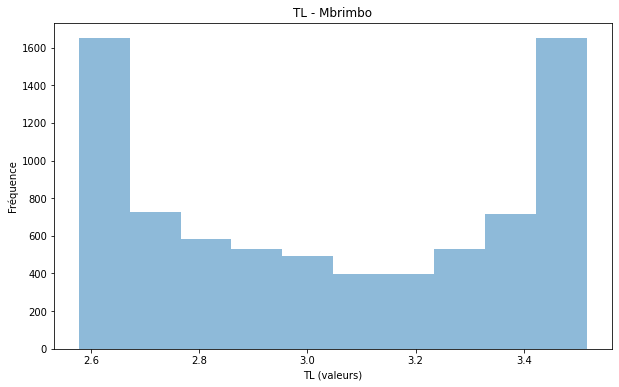

In [28]:

output_dir = './miscellaneous/mbrimbo'
os.makedirs(output_dir, exist_ok=True)

df_hourly_mbrimbo['TL'].plot.hist(alpha=0.5, figsize=(10, 6))

# Adding title and axis labels
plt.title('TL - Mbrimbo')
plt.xlabel('TL (valeurs)')
plt.ylabel('Fréquence')

# Saving the plot
output_path = os.path.join(output_dir, 'TL_value.png')
plt.savefig(output_path)

# Displaying the plot
plt.show()

<AxesSubplot:ylabel='Frequency'>

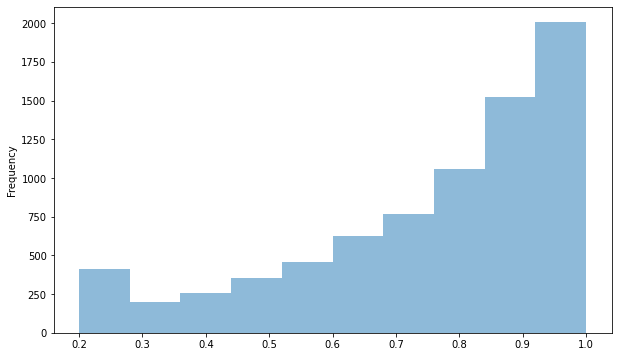

In [29]:
df_hourly_mbrimbo['Kt_Gistel'].plot.hist(alpha=0.5, figsize=(10, 6))

##### Yamoussokro

In [30]:
df_hourly_yakro = build_gistel(df_yakro, 0.243)

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
df_hourly_yakro

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,CN,datetime,day_of_year,declination,B,equation_of_time,LST,TST,hour_angle,h_s,Ah,T0,T1,T2,TL,epsilon,G_CC,I_CC,D_CC,h_v,T_i,CR,CR_clear_sky,CR_cloudy_sky,Kt_Gistel,G_cal_Gistel
0,2017,1,1,7,0.96600,1.19875,6.87,-5.24,1.082375,95.455908,2017-01-01,1,-23.011637,-1.377137,-3.670537,7,6.589491,-81.157634,0.093846,-0.880012,1.091613,0.972079,0.489797,2.553490,1.033980,75.098052,1072.668777,1.115069,1.392207,2.171077,0.995841,0.831277,2.114720,0.897423,67.394730
1,2017,1,1,8,2.54825,3.24800,6.87,-5.24,2.898125,170.033885,2017-01-01,1,-23.011637,-1.377137,-3.670537,8,7.589491,-66.157634,0.328501,-0.880012,1.091613,0.972079,0.489797,2.553490,1.033980,318.349631,1025.419078,10.381330,1.392207,2.171077,0.444844,0.268615,0.744943,0.704021,224.124725
2,2017,1,1,9,3.98425,5.15800,6.87,-5.24,4.571125,238.748716,2017-01-01,1,-23.011637,-1.377137,-3.670537,9,8.589491,-51.157634,0.554322,-0.880012,1.091613,0.972079,0.489797,2.553490,1.033980,563.991753,940.198962,25.113492,1.392207,2.171077,0.360275,0.181796,0.605174,0.662753,373.786977
3,2017,1,1,10,2.68950,4.29375,6.87,-5.24,3.491625,194.410605,2017-01-01,1,-23.011637,-1.377137,-3.670537,10,9.589491,-36.157634,0.762944,-0.880012,1.091613,0.972079,0.489797,2.553490,1.033980,775.158090,783.381491,41.044687,1.392207,2.171077,0.210873,0.159720,0.498731,0.879289,681.587896
4,2017,1,1,11,2.27150,4.11925,6.87,-5.24,3.195375,182.242781,2017-01-01,1,-23.011637,-1.377137,-3.670537,11,10.589491,-21.157634,0.936446,-0.880012,1.091613,0.972079,0.489797,2.553490,1.033980,927.081729,501.201373,54.115641,1.392207,2.171077,0.164556,0.145186,0.400592,0.939331,870.836463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,2018,12,31,13,2.20150,4.32750,6.87,-5.24,3.264500,185.081940,2018-12-31,365,-23.085911,4.888835,-3.224639,13,12.596923,8.953840,1.026092,-0.871706,1.092350,0.972079,0.492767,2.557196,1.033951,994.195209,232.913569,60.442375,1.392207,2.173463,0.155835,0.133087,0.236418,0.823886,819.103087
7991,2018,12,31,14,1.87775,3.55525,6.87,-5.24,2.716500,162.574034,2018-12-31,365,-23.085911,4.888835,-3.224639,14,13.596923,23.953840,0.907146,-0.871706,1.092350,0.972079,0.492767,2.557196,1.033951,903.099505,565.708792,52.104365,1.392207,2.173463,0.149245,0.130582,0.234852,0.856812,773.786581
7992,2018,12,31,15,1.42925,2.67850,6.87,-5.24,2.053875,135.358155,2018-12-31,365,-23.085911,4.888835,-3.224639,15,14.596923,38.953840,0.725270,-0.871706,1.092350,0.972079,0.492767,2.557196,1.033951,738.772249,820.460208,38.206949,1.392207,2.173463,0.149466,0.134786,0.239779,0.888147,656.138557
7993,2018,12,31,16,1.06925,1.73250,6.87,-5.24,1.400875,108.537602,2018-12-31,365,-23.085911,4.888835,-3.224639,16,15.596923,53.953840,0.512691,-0.871706,1.092350,0.972079,0.492767,2.557196,1.033951,519.234443,959.794301,22.160749,1.392207,2.173463,0.166425,0.145744,0.309461,0.898944,466.762833


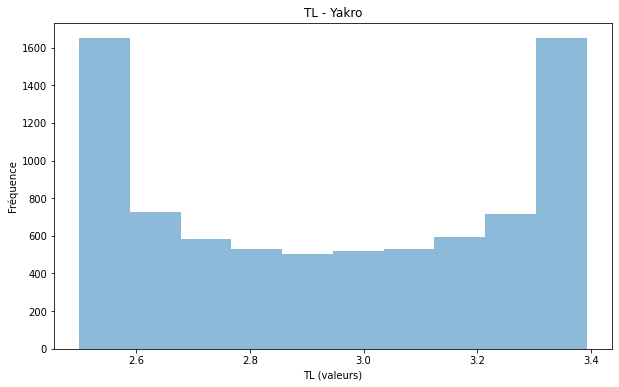

In [32]:

output_dir = './miscellaneous/yakro'
os.makedirs(output_dir, exist_ok=True)

df_hourly_yakro['TL'].plot.hist(alpha=0.5, figsize=(10, 6))

# Adding title and axis labels
plt.title('TL - Yakro')
plt.xlabel('TL (valeurs)')
plt.ylabel('Fréquence')

# Saving the plot
output_path = os.path.join(output_dir, 'TL_value.png')
plt.savefig(output_path)

# Displaying the plot
plt.show()

<AxesSubplot:ylabel='Frequency'>

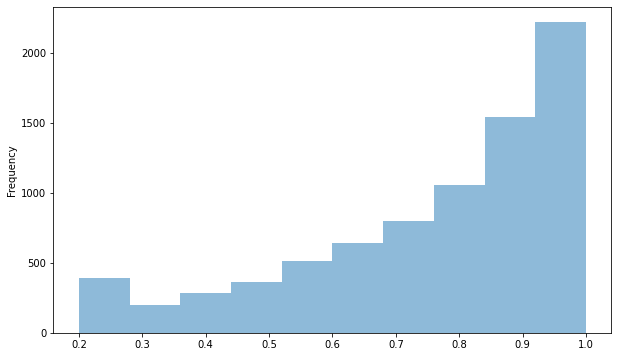

In [33]:
df_hourly_yakro['Kt_Gistel'].plot.hist(alpha=0.5, figsize=(10, 6))

In [34]:
# df_hourly_abidjan[(df_hourly_abidjan['Année'] == 2017) &  (df_hourly_abidjan['Mois'] == 3)][['Année', 'Mois', 'Jour', 'Heure','Kt','G_cal']].to_csv('testing1_abidjan.csv', index=False)

### Implémentation du Modele Heliostat

In [35]:
# Constants


I_0 = 1367  # Solar constant in W/m²
average_cos_theta_v = 0.5  # Given as 0.5 in instructions
I_0met_VIS06 = 65.2296  # mWm-2 sr-1 (cm-1)-1 for VIS0.6 channel
I_0met_VIS08 = 73.0127  # mWm-2 sr-1 (cm-1)-1 for VIS0.8 channel

I0_met = np.mean([I_0met_VIS06, I_0met_VIS08])    

In [36]:
# Rayleigh optical thickness (δ_r) calculation
def calculate_δ_r(m_series):
    """ test """
    
    result = np.where(
        m_series <= 20,
        1 / (6.6296 + 1.7513 * m_series - 0.1202 * m_series**2 + 0.0065 * m_series**3 - 0.00013 * m_series**4),
        1 / (10.4 + 0.718 * m_series)
    )
    return result

In [37]:
def calculate_albedo_apparent(df_hourly):
    """ calculate abdedo """
    
    # Calculate day_of_year
    df_hourly['datetime'] = pd.to_datetime(dict(year=df_hourly['Année'], month=df_hourly['Mois'], day=df_hourly['Jour']))

    df_hourly['day_of_year'] = df_hourly['datetime'].dt.dayofyear
    
    df_hourly['Ah'] = np.sin(np.deg2rad(360 / 365 * (df_hourly['day_of_year'] - 121)))

    
    # Calculate ε (Correction factor for the Earth-Sun distance)
    df_hourly['ε'] = 1 + 0.034 * np.cos(np.deg2rad(0.986 * (df_hourly['day_of_year'] - 3)))

    # Declination calculation
    def calculate_declination(day_of_year):
        return 23.45 * np.sin(np.deg2rad(360 * (284 + day_of_year) / 365))

    df_hourly['declination'] = calculate_declination(df_hourly['day_of_year'])

    # Equation of time calculation
    def calculate_B(day_of_year):
        return np.deg2rad(360 * (day_of_year - 81) / 365)

    def calculate_equation_of_time(B):
        return 9.87 * np.sin(2 * B) - 7.35 * np.cos(B) - 1.5 * np.sin(B)

    df_hourly['B'] = calculate_B(df_hourly['day_of_year'])
    df_hourly['equation_of_time'] = calculate_equation_of_time(df_hourly['B'])

    # True solar time calculation
    def calculate_true_solar_time(LST, longitude, equation_of_time):
        return LST + equation_of_time / 60 + (longitude / 15)

    df_hourly['TST'] = calculate_true_solar_time(df_hourly['Heure'], df_hourly['Long'], df_hourly['equation_of_time'])

    # Hour angle calculation
    def calculate_hour_angle(TST):
        return 15 * (TST - 12)

    df_hourly['hour_angle'] = calculate_hour_angle(df_hourly['TST'])

    # Solar elevation calculation
    def calculate_solar_elevation(latitude, declination, hour_angle):
        return np.arcsin(np.sin(np.deg2rad(latitude)) * np.sin(np.deg2rad(declination)) + 
                         np.cos(np.deg2rad(latitude)) * np.cos(np.deg2rad(declination)) * np.cos(np.deg2rad(hour_angle)))

    df_hourly['solar_elevation'] = calculate_solar_elevation(df_hourly['Lat'], df_hourly['declination'], df_hourly['hour_angle'])
    df_hourly['θ_Z'] = 90 - np.rad2deg(df_hourly['solar_elevation'])  # Zenith angle in degrees

    # Apparent Albedo calculation ρ(i,j)
    df_hourly['ρ(i,j)'] = (np.pi * (df_hourly['radiance'])) / ((I0_met) * df_hourly['ε'] * np.cos(np.deg2rad(df_hourly['θ_Z'])))
    
    
    return df_hourly

In [38]:
def apply_model_esra(df_hourly, altitude):
    """ compute ICC & DCC with model ESRA"""
    
    I_0 = 1367  # Solar constant in W/m²

    
    z_h = 8434.5  # Scale height of Rayleigh atmosphere near the surface of the Earth in meters

    # Height of the site in meters
    df_hourly['z'] = altitude
    
    lat_rad = np.deg2rad(df_hourly['Lat'])  # Convert latitude to radians
    
    # Theta v
    df_hourly['h_v'] = np.arcsin((1.826 * np.cos(np.deg2rad(df_hourly['Long'])) * np.cos(np.deg2rad(df_hourly['Lat'])) - 0.274) / np.sqrt(3.41 - np.cos(np.deg2rad(df_hourly['Long'])) * np.cos(np.deg2rad(df_hourly['Lat']))))

    
    # Calculate the true solar height (h_s^vrai)
    def calculate_h_s_vrai(h_s):
        Δh_reff = 0.061359 * (180 / np.pi) * (0.1594 + 1.1230 * (np.pi / 180) * h_s + 0.061359 * (np.pi / 180)**2 * h_s**2) / (1 + 28.9344 * (np.pi / 180) * h_s + 277.3971 * (np.pi / 180)**2 * h_s**2)
        return h_s + Δh_reff

    df_hourly['h_s'] = np.rad2deg(df_hourly['solar_elevation'])  # Solar height angle in degrees
    df_hourly['h_s_vrai'] = calculate_h_s_vrai(df_hourly['h_s'])

    # Calculate air mass (m)
    def calculate_m(h_s_vrai, z):
        P_p_O = np.exp(-z / z_h)
        return P_p_O / (np.sin(np.deg2rad(h_s_vrai)) + 0.505072 * (h_s_vrai + 6.07995)**-1.63364)

    df_hourly['m'] = calculate_m(df_hourly['h_s_vrai'], df_hourly['z'])



    df_hourly['δ_r'] = calculate_δ_r(df_hourly['m'])
    
    df_hourly['T0'] = 2.4 - 0.9 * np.sin((lat_rad)) + 0.1 * (2 + np.sin(lat_rad)) * df_hourly['Ah'] - 0.2 * (altitude/1000) - (1.22 + 0.14 * df_hourly['Ah']) * (1 - np.sin(lat_rad))
    df_hourly['T1'] = 0.89 ** (altitude/1000)
    df_hourly['T2'] = (0.9 + 0.4 * df_hourly['Ah']) * (0.63) ** (altitude/1000)

    # Calculate TL
    df_hourly['TL'] = df_hourly['T0'] + df_hourly['T1'] + df_hourly['T2']

    # Direct component of clear sky radiation I_CC
    df_hourly['I_CC'] = I_0 * df_hourly['ε'] * np.sin(np.deg2rad(df_hourly['h_s'])) * np.exp(-0.8662 * df_hourly['TL'] * df_hourly['m'] * df_hourly['δ_r'])

    # Parameters for diffuse component calculations
    def calculate_T_rd(T_L):
        return -1.5843e-2 + 3.0543e-2 * T_L + 3.797e-4 * T_L**2

    def calculate_F_d(T_L, θ):
        A_0 = 0.26463 - 0.06158 * T_L + 0.0031408 * T_L**2
        A_1 = 2.0402 + 0.018945 * T_L - 0.011161 * T_L**2
        A_2 = -1.3025 + 0.039231 * T_L + 0.0085079 * T_L**2

        T_rd_values = calculate_T_rd(T_L)
        A_0 = np.where(A_0 * T_rd_values < 2e-3, 2e-3 / T_rd_values, A_0)

        return A_0 + A_1 * np.sin(np.deg2rad(θ)) + A_2 * np.sin(np.deg2rad(θ))**2

    df_hourly['T_rd'] = calculate_T_rd(df_hourly['TL'])
    df_hourly['F_d_Z'] = calculate_F_d(df_hourly['TL'], df_hourly['θ_Z'])
    df_hourly['F_d_v'] = calculate_F_d(df_hourly['TL'], df_hourly['h_v'])

    # Diffuse component of clear sky radiation D_CC
#     df_hourly['D_CC'] = I_0 * df_hourly['ε'] * df_hourly['T_rd'] * df_hourly['F_d_Z']
    df_hourly['D_CC'] = I_0 * df_hourly['ε'] * df_hourly['T_rd'] *  calculate_F_d(df_hourly['TL'], df_hourly['h_s'])

    # Global clear sky radiation G_CC
    df_hourly['G_CC'] = df_hourly['I_CC'] + df_hourly['D_CC']
    
    
    return df_hourly

In [39]:
def other_albedo_calculation(df_hourly):
    """ Albedo sol - Albedo Nuageux """
    
    # Atmospheric Albedo calculation
    df_hourly['L_atm'] = (df_hourly['D_CC'] / np.pi) * ((I0_met/1000) / I_0) * (average_cos_theta_v / np.cos(np.deg2rad(df_hourly['h_v'])))**0.8
    df_hourly['ρ_atm'] = (np.pi * df_hourly['L_atm']) / ((I0_met/1000) * df_hourly['ε'] * np.cos(np.deg2rad(df_hourly['θ_Z'])))

    # Parameters for transmittance calculations
    def calculate_T_rB(T_L, m):
        return np.exp(-0.8662 * T_L * m * calculate_δ_r(m))

    df_hourly['T_rB_Z'] = calculate_T_rB(df_hourly['TL'], df_hourly['m'])
    df_hourly['T_rD_Z'] = df_hourly['T_rd'] * df_hourly['F_d_Z']
    df_hourly['T_rD_v'] = df_hourly['T_rd'] * df_hourly['F_d_v']
    df_hourly['T(θ_Z)'] = df_hourly['T_rB_Z'] + df_hourly['T_rD_Z']

    df_hourly['T(θ_v)'] =  df_hourly['T_rB_Z'] + df_hourly['T_rD_v']

    # Ground Albedo calculation
    df_hourly['ρ_Sol'] = (df_hourly['ρ(i,j)'] - df_hourly['ρ_atm']) / (df_hourly['T(θ_Z)'] * df_hourly['T(θ_v)'])

    # Cloud Albedo calculation
    df_hourly['ρ_N'] = (0.9 - df_hourly['ρ_atm']) / (df_hourly['T(θ_Z)'] * df_hourly['T(θ_v)'])
    
    return df_hourly

In [40]:
def calculate_solar_rad_helio(df_hourly):
    """ Calculate solar radiation """
    
    # Cloudiness Index calculation
    df_hourly['n'] = (df_hourly['ρ(i,j)'] - df_hourly['ρ_atm']) / (df_hourly['ρ_N'] - df_hourly['ρ_Sol'])

    # Clear sky index calculation
    def calculate_KC(n):
        if n <= -0.2:
            return 1.2
        elif -0.2 < n <= 0.8:
            return 1 - n
        elif 0.8 < n <= 1.1:
            return 2.0667 - 3.6667 * n + 1.667 * n**2
        else:
            return 0.05

    df_hourly['K_C'] = df_hourly['n'].apply(calculate_KC)

    # Global Solar Irradiation under Any Sky Conditions
    df_hourly['G_cal_Helio'] = df_hourly['K_C'] * df_hourly['G_CC']
    
    return df_hourly

In [41]:
def build_heliostat(df, altitude):
    """ build  Heliostat model """
    
    # step 1
    df_hourly = calculate_radiance(df)
    
    # aldebo apparent
    df_hourly = calculate_albedo_apparent(df_hourly)
    
    # model estra
    df_hourly = apply_model_esra(df_hourly, altitude)
    
    # other albedos
    df_hourly = other_albedo_calculation(df_hourly)
    
    # solar
    df_hourly = calculate_solar_rad_helio(df_hourly)
    
        
    return df_hourly

#### Application du Modele Heliostat par Site

##### Abidjan

In [42]:
df_hourly_abidjan_h = build_heliostat(df_abidjan, 48)

In [43]:
df_hourly_abidjan_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.13575,0.16725,5.34,-3.98,0.151500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.673491,-94.897634,-0.114875,96.581827,-0.058099,48,1.432249,-6.581827,-6.499757,NaN,NaN,1.127725,0.994422,0.535976,2.658122,NaN,0.068027,0.998422,0.172706,-11.769386,NaN,-0.000109,0.041734,NaN,0.067919,0.011749,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.673491,-79.897634,0.124691,82.855760,0.342310,48,1.432249,7.144240,7.262619,7.434337,0.065446,1.127725,0.994422,0.535976,2.658122,57.340572,0.068027,0.998713,0.172706,34.203520,91.544092,0.000316,0.111781,0.326193,0.067939,0.011749,0.394132,0.337941,1.730783,5.917857,0.055057,0.944943,86.503928
2,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.673491,-64.897634,0.360137,69.365660,0.207683,48,1.432249,20.634340,20.676751,2.797392,0.093263,1.127725,0.994422,0.535976,2.658122,273.174821,0.068027,1.009013,0.172706,66.414869,339.589690,0.000614,0.076600,0.548430,0.068640,0.011749,0.617070,0.560178,0.379216,2.382047,0.065449,0.934551,317.363890
3,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.673491,-49.897634,0.587092,56.362085,0.200247,48,1.432249,33.637915,33.663906,1.789795,0.106214,1.127725,0.994422,0.535976,2.658122,505.421814,0.068027,1.009109,0.172706,85.409415,590.831229,0.000790,0.062668,0.645518,0.068646,0.011749,0.714165,0.657267,0.293097,1.783846,0.092288,0.907712,536.304378
4,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.673491,-34.897634,0.796986,44.336061,0.234318,48,1.432249,45.663939,45.683134,1.388165,0.113046,1.127725,0.994422,0.535976,2.658122,704.404662,0.068027,0.973176,0.172706,94.207231,798.611893,0.000871,0.053534,0.696758,0.066202,0.011749,0.762960,0.708507,0.334437,1.565900,0.146804,0.853196,681.372207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.680923,10.213840,1.044988,30.126595,0.212524,48,1.432249,59.873405,59.888133,1.148731,0.117753,1.128408,0.994422,0.539225,2.662056,894.921012,0.068155,0.845951,0.172525,97.450880,992.371891,0.000901,0.045796,0.732050,0.057656,0.011758,0.789706,0.743809,0.283846,1.454236,0.142455,0.857545,851.003070
8705,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.680923,25.213840,0.914353,37.611437,0.297993,48,1.432249,52.388563,52.405337,1.253875,0.115620,1.128408,0.994422,0.539225,2.662056,801.504285,0.068155,0.926821,0.172525,96.566795,898.071080,0.000893,0.049548,0.715847,0.063167,0.011758,0.779014,0.727605,0.438318,1.500405,0.233921,0.766079,687.993145
8706,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.680923,40.213840,0.724746,48.475111,0.134330,48,1.432249,41.524889,41.545972,1.497167,0.111070,1.128408,0.994422,0.539225,2.662056,638.584415,0.068155,0.991207,0.172525,92.135874,730.720289,0.000852,0.056489,0.681510,0.067556,0.011758,0.749065,0.693268,0.149895,1.624313,0.052794,0.947206,692.142439
8707,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.680923,55.213840,0.507573,60.918232,0.106321,48,1.432249,29.081768,29.111829,2.037472,0.1025

In [44]:
df_hourly_abidjan_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.13575,0.16725,5.34,-3.98,0.151500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.673491,-94.897634,-0.114875,96.581827,-0.058099,48,1.432249,-6.581827,-6.499757,NaN,NaN,1.127725,0.994422,0.535976,2.658122,NaN,0.068027,0.998422,0.172706,-11.769386,NaN,-0.000109,0.041734,NaN,0.067919,0.011749,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.673491,-79.897634,0.124691,82.855760,0.342310,48,1.432249,7.144240,7.262619,7.434337,0.065446,1.127725,0.994422,0.535976,2.658122,57.340572,0.068027,0.998713,0.172706,34.203520,91.544092,0.000316,0.111781,0.326193,0.067939,0.011749,0.394132,0.337941,1.730783,5.917857,0.055057,0.944943,86.503928
2,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.673491,-64.897634,0.360137,69.365660,0.207683,48,1.432249,20.634340,20.676751,2.797392,0.093263,1.127725,0.994422,0.535976,2.658122,273.174821,0.068027,1.009013,0.172706,66.414869,339.589690,0.000614,0.076600,0.548430,0.068640,0.011749,0.617070,0.560178,0.379216,2.382047,0.065449,0.934551,317.363890
3,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.673491,-49.897634,0.587092,56.362085,0.200247,48,1.432249,33.637915,33.663906,1.789795,0.106214,1.127725,0.994422,0.535976,2.658122,505.421814,0.068027,1.009109,0.172706,85.409415,590.831229,0.000790,0.062668,0.645518,0.068646,0.011749,0.714165,0.657267,0.293097,1.783846,0.092288,0.907712,536.304378
4,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.673491,-34.897634,0.796986,44.336061,0.234318,48,1.432249,45.663939,45.683134,1.388165,0.113046,1.127725,0.994422,0.535976,2.658122,704.404662,0.068027,0.973176,0.172706,94.207231,798.611893,0.000871,0.053534,0.696758,0.066202,0.011749,0.762960,0.708507,0.334437,1.565900,0.146804,0.853196,681.372207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.680923,10.213840,1.044988,30.126595,0.212524,48,1.432249,59.873405,59.888133,1.148731,0.117753,1.128408,0.994422,0.539225,2.662056,894.921012,0.068155,0.845951,0.172525,97.450880,992.371891,0.000901,0.045796,0.732050,0.057656,0.011758,0.789706,0.743809,0.283846,1.454236,0.142455,0.857545,851.003070
8705,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.680923,25.213840,0.914353,37.611437,0.297993,48,1.432249,52.388563,52.405337,1.253875,0.115620,1.128408,0.994422,0.539225,2.662056,801.504285,0.068155,0.926821,0.172525,96.566795,898.071080,0.000893,0.049548,0.715847,0.063167,0.011758,0.779014,0.727605,0.438318,1.500405,0.233921,0.766079,687.993145
8706,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.680923,40.213840,0.724746,48.475111,0.134330,48,1.432249,41.524889,41.545972,1.497167,0.111070,1.128408,0.994422,0.539225,2.662056,638.584415,0.068155,0.991207,0.172525,92.135874,730.720289,0.000852,0.056489,0.681510,0.067556,0.011758,0.749065,0.693268,0.149895,1.624313,0.052794,0.947206,692.142439
8707,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.680923,55.213840,0.507573,60.918232,0.106321,48,1.432249,29.081768,29.111829,2.037472,0.1025

<AxesSubplot:>

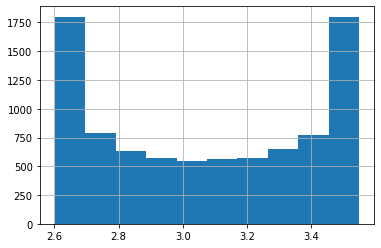

In [45]:
df_hourly_abidjan_h['TL'].hist()

<AxesSubplot:>

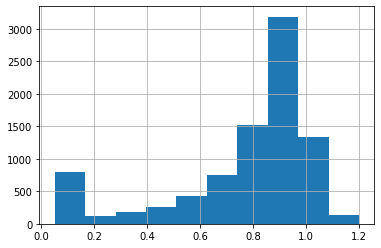

In [46]:
df_hourly_abidjan_h['K_C'].hist()

In [47]:
df_hourly_abidjan_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.13575,0.16725,5.34,-3.98,0.151500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.673491,-94.897634,-0.114875,96.581827,-0.058099,48,1.432249,-6.581827,-6.499757,NaN,NaN,1.127725,0.994422,0.535976,2.658122,NaN,0.068027,0.998422,0.172706,-11.769386,NaN,-0.000109,0.041734,NaN,0.067919,0.011749,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.673491,-79.897634,0.124691,82.855760,0.342310,48,1.432249,7.144240,7.262619,7.434337,0.065446,1.127725,0.994422,0.535976,2.658122,57.340572,0.068027,0.998713,0.172706,34.203520,91.544092,0.000316,0.111781,0.326193,0.067939,0.011749,0.394132,0.337941,1.730783,5.917857,0.055057,0.944943,86.503928
2,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.673491,-64.897634,0.360137,69.365660,0.207683,48,1.432249,20.634340,20.676751,2.797392,0.093263,1.127725,0.994422,0.535976,2.658122,273.174821,0.068027,1.009013,0.172706,66.414869,339.589690,0.000614,0.076600,0.548430,0.068640,0.011749,0.617070,0.560178,0.379216,2.382047,0.065449,0.934551,317.363890
3,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.673491,-49.897634,0.587092,56.362085,0.200247,48,1.432249,33.637915,33.663906,1.789795,0.106214,1.127725,0.994422,0.535976,2.658122,505.421814,0.068027,1.009109,0.172706,85.409415,590.831229,0.000790,0.062668,0.645518,0.068646,0.011749,0.714165,0.657267,0.293097,1.783846,0.092288,0.907712,536.304378
4,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.673491,-34.897634,0.796986,44.336061,0.234318,48,1.432249,45.663939,45.683134,1.388165,0.113046,1.127725,0.994422,0.535976,2.658122,704.404662,0.068027,0.973176,0.172706,94.207231,798.611893,0.000871,0.053534,0.696758,0.066202,0.011749,0.762960,0.708507,0.334437,1.565900,0.146804,0.853196,681.372207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.680923,10.213840,1.044988,30.126595,0.212524,48,1.432249,59.873405,59.888133,1.148731,0.117753,1.128408,0.994422,0.539225,2.662056,894.921012,0.068155,0.845951,0.172525,97.450880,992.371891,0.000901,0.045796,0.732050,0.057656,0.011758,0.789706,0.743809,0.283846,1.454236,0.142455,0.857545,851.003070
8705,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.680923,25.213840,0.914353,37.611437,0.297993,48,1.432249,52.388563,52.405337,1.253875,0.115620,1.128408,0.994422,0.539225,2.662056,801.504285,0.068155,0.926821,0.172525,96.566795,898.071080,0.000893,0.049548,0.715847,0.063167,0.011758,0.779014,0.727605,0.438318,1.500405,0.233921,0.766079,687.993145
8706,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.680923,40.213840,0.724746,48.475111,0.134330,48,1.432249,41.524889,41.545972,1.497167,0.111070,1.128408,0.994422,0.539225,2.662056,638.584415,0.068155,0.991207,0.172525,92.135874,730.720289,0.000852,0.056489,0.681510,0.067556,0.011758,0.749065,0.693268,0.149895,1.624313,0.052794,0.947206,692.142439
8707,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.680923,55.213840,0.507573,60.918232,0.106321,48,1.432249,29.081768,29.111829,2.037472,0.1025

##### Mbrimbo

In [48]:
df_hourly_mbrimbo_h = build_heliostat(df_mbrimbo, 92)

In [49]:
df_hourly_mbrimbo_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.07825,0.11150,6.04,-4.9,0.094875,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.612158,-95.817634,-0.134316,97.695721,-0.031143,92,1.40967,-7.695721,-7.679670,NaN,NaN,1.120247,0.989336,0.525189,2.634773,NaN,0.067267,0.999064,0.173007,-15.761741,NaN,-0.000146,0.047839,NaN,0.067204,0.011638,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.67900,1.05950,6.04,-4.9,0.869250,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.612158,-80.817634,0.105124,83.976853,0.364142,92,1.40967,6.023147,6.160726,8.545108,0.061803,1.120247,0.989336,0.525189,2.634773,44.435612,0.067267,0.998189,0.173007,30.692956,75.128568,0.000284,0.118888,0.299606,0.067145,0.011638,0.366751,0.311243,2.148549,6.842937,0.052244,0.947756,71.203545
2,2017,1,1,8,1.44150,2.50950,6.04,-4.9,1.975500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.612158,-65.817634,0.340352,70.499285,0.260132,92,1.40967,19.500715,19.545597,2.934464,0.091842,1.120247,0.989336,0.525189,2.634773,255.073814,0.067267,1.008341,0.173007,63.606916,318.680731,0.000588,0.077445,0.540598,0.067828,0.011638,0.608426,0.552236,0.543718,2.448118,0.095929,0.904071,288.110104
3,2017,1,1,9,1.96350,3.58975,6.04,-4.9,2.776625,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.612158,-50.817634,0.567060,57.509847,0.227219,92,1.40967,32.490153,32.517061,1.835694,0.105506,1.120247,0.989336,0.525189,2.634773,487.994031,0.067267,1.010688,0.173007,83.319879,571.313909,0.000770,0.063045,0.642739,0.067986,0.011638,0.710725,0.654376,0.353001,1.799588,0.113491,0.886509,506.475119
4,2017,1,1,10,2.07325,4.30050,6.04,-4.9,3.186875,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.612158,-35.817634,0.776913,45.486178,0.199813,92,1.40967,44.513822,44.533506,1.408734,0.112665,1.120247,0.989336,0.525189,2.634773,689.819849,0.067267,0.979647,0.173007,92.686295,782.506145,0.000857,0.053734,0.696124,0.065898,0.011638,0.762022,0.707762,0.270853,1.569107,0.112520,0.887480,694.458831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,2018,12,31,13,1.73675,4.52925,6.04,-4.9,3.133000,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.619589,9.293840,1.038302,30.509663,0.159853,92,1.40967,59.490337,59.505157,1.147217,0.117784,1.120955,0.989336,0.528374,2.638665,894.165738,0.067393,0.851951,0.172828,96.384729,990.550467,0.000891,0.045472,0.734298,0.057416,0.011647,0.791714,0.745945,0.193678,1.446942,0.091267,0.908733,900.146027
8357,2018,12,31,14,1.50250,3.81950,6.04,-4.9,2.661000,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.619589,24.293840,0.914969,37.576165,0.147591,92,1.40967,52.423835,52.440597,1.246762,0.115761,1.120955,0.989336,0.528374,2.638665,805.432751,0.067393,0.927408,0.172828,95.548422,900.981173,0.000883,0.049002,0.719015,0.062501,0.011647,0.781516,0.730662,0.172654,1.490302,0.074822,0.925178,833.567788
8358,2018,12,31,15,1.29350,2.90800,6.04,-4.9,2.100750,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.619589,39.293840,0.729801,48.185510,0.138506,92,1.40967,41.814490,41.835428,1.480985,0.111357,1.120955,0.989336,0.528374,2.638665,646.412694,0.067393,0.990816,0.172828,91.362123,737.774817,0.000845,0.055697,0.685957,0.066774,0.011647,0.752732,0.697605,0.157698,1.607860,0.057103,0.942897,695.645562
8359,2018,12,31,16,1.00150,1.93425,6.04,-4.9,1.467875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.619589,54.293840,0.515133,60.485033,0.130975,92,1.40967,29.514967,29.544587,2.000007,0.103079,1.120955,0.98933

In [50]:
df_hourly_mbrimbo_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.07825,0.11150,6.04,-4.9,0.094875,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.612158,-95.817634,-0.134316,97.695721,-0.031143,92,1.40967,-7.695721,-7.679670,NaN,NaN,1.120247,0.989336,0.525189,2.634773,NaN,0.067267,0.999064,0.173007,-15.761741,NaN,-0.000146,0.047839,NaN,0.067204,0.011638,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.67900,1.05950,6.04,-4.9,0.869250,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.612158,-80.817634,0.105124,83.976853,0.364142,92,1.40967,6.023147,6.160726,8.545108,0.061803,1.120247,0.989336,0.525189,2.634773,44.435612,0.067267,0.998189,0.173007,30.692956,75.128568,0.000284,0.118888,0.299606,0.067145,0.011638,0.366751,0.311243,2.148549,6.842937,0.052244,0.947756,71.203545
2,2017,1,1,8,1.44150,2.50950,6.04,-4.9,1.975500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.612158,-65.817634,0.340352,70.499285,0.260132,92,1.40967,19.500715,19.545597,2.934464,0.091842,1.120247,0.989336,0.525189,2.634773,255.073814,0.067267,1.008341,0.173007,63.606916,318.680731,0.000588,0.077445,0.540598,0.067828,0.011638,0.608426,0.552236,0.543718,2.448118,0.095929,0.904071,288.110104
3,2017,1,1,9,1.96350,3.58975,6.04,-4.9,2.776625,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.612158,-50.817634,0.567060,57.509847,0.227219,92,1.40967,32.490153,32.517061,1.835694,0.105506,1.120247,0.989336,0.525189,2.634773,487.994031,0.067267,1.010688,0.173007,83.319879,571.313909,0.000770,0.063045,0.642739,0.067986,0.011638,0.710725,0.654376,0.353001,1.799588,0.113491,0.886509,506.475119
4,2017,1,1,10,2.07325,4.30050,6.04,-4.9,3.186875,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.612158,-35.817634,0.776913,45.486178,0.199813,92,1.40967,44.513822,44.533506,1.408734,0.112665,1.120247,0.989336,0.525189,2.634773,689.819849,0.067267,0.979647,0.173007,92.686295,782.506145,0.000857,0.053734,0.696124,0.065898,0.011638,0.762022,0.707762,0.270853,1.569107,0.112520,0.887480,694.458831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,2018,12,31,13,1.73675,4.52925,6.04,-4.9,3.133000,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.619589,9.293840,1.038302,30.509663,0.159853,92,1.40967,59.490337,59.505157,1.147217,0.117784,1.120955,0.989336,0.528374,2.638665,894.165738,0.067393,0.851951,0.172828,96.384729,990.550467,0.000891,0.045472,0.734298,0.057416,0.011647,0.791714,0.745945,0.193678,1.446942,0.091267,0.908733,900.146027
8357,2018,12,31,14,1.50250,3.81950,6.04,-4.9,2.661000,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.619589,24.293840,0.914969,37.576165,0.147591,92,1.40967,52.423835,52.440597,1.246762,0.115761,1.120955,0.989336,0.528374,2.638665,805.432751,0.067393,0.927408,0.172828,95.548422,900.981173,0.000883,0.049002,0.719015,0.062501,0.011647,0.781516,0.730662,0.172654,1.490302,0.074822,0.925178,833.567788
8358,2018,12,31,15,1.29350,2.90800,6.04,-4.9,2.100750,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.619589,39.293840,0.729801,48.185510,0.138506,92,1.40967,41.814490,41.835428,1.480985,0.111357,1.120955,0.989336,0.528374,2.638665,646.412694,0.067393,0.990816,0.172828,91.362123,737.774817,0.000845,0.055697,0.685957,0.066774,0.011647,0.752732,0.697605,0.157698,1.607860,0.057103,0.942897,695.645562
8359,2018,12,31,16,1.00150,1.93425,6.04,-4.9,1.467875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.619589,54.293840,0.515133,60.485033,0.130975,92,1.40967,29.514967,29.544587,2.000007,0.103079,1.120955,0.98933

##### Yamoussoukro

In [51]:
df_hourly_yakro_h = build_heliostat(df_yakro, 243)

In [52]:
df_hourly_yakro_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.08375,0.10475,6.87,-5.24,0.094250,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.589491,-96.157634,-0.145291,98.324558,-0.028615,243,1.392207,-8.324558,-8.327828,NaN,NaN,1.091613,0.972079,0.489797,2.553490,NaN,0.064624,0.999619,0.176164,-17.174554,NaN,-0.000159,0.048214,NaN,0.064599,0.011384,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.96600,1.19875,6.87,-5.24,1.082375,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.589491,-81.157634,0.093846,84.623021,0.507723,243,1.392207,5.376979,5.528445,9.205798,0.059871,1.091613,0.972079,0.489797,2.553490,39.139947,0.064624,0.998019,0.176164,28.014094,67.154041,0.000259,0.121506,0.295503,0.064496,0.011384,0.359999,0.306887,3.495840,7.046535,0.108772,0.891228,59.849547
2,2017,1,1,8,2.54825,3.24800,6.87,-5.24,2.898125,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.589491,-66.157634,0.328501,71.178300,0.394864,243,1.392207,18.821700,18.868204,2.980103,0.091383,1.091613,0.972079,0.489797,2.553490,249.677662,0.064624,1.008399,0.176164,60.180348,309.858009,0.000556,0.075815,0.547523,0.065167,0.011384,0.612689,0.558907,0.931701,2.406825,0.216286,0.783714,242.840128
3,2017,1,1,9,3.98425,5.15800,6.87,-5.24,4.571125,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.589491,-51.157634,0.554322,58.239675,0.381734,243,1.392207,31.760325,31.787850,1.839773,0.105444,1.091613,0.972079,0.489797,2.553490,484.420767,0.064624,1.012715,0.176164,79.574997,563.995764,0.000736,0.061445,0.651109,0.065446,0.011384,0.716554,0.662493,0.674702,1.766450,0.293373,0.706627,398.534541
4,2017,1,1,10,2.68950,4.29375,6.87,-5.24,3.491625,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.589491,-36.157634,0.762944,46.286526,0.222097,243,1.392207,43.713474,43.733513,1.403728,0.112758,1.091613,0.972079,0.489797,2.553490,688.254033,0.064624,0.985729,0.176164,88.895605,777.149639,0.000822,0.052284,0.704624,0.063702,0.011384,0.768325,0.716008,0.308681,1.540946,0.137806,0.862194,670.053749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,2018,12,31,13,2.20150,4.32750,6.87,-5.24,3.264500,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.596923,8.953840,1.026092,31.209284,0.167783,243,1.392207,58.790716,58.805708,1.135089,0.118037,1.092350,0.972079,0.492767,2.557196,898.438166,0.064744,0.864301,0.175992,92.695577,991.133743,0.000857,0.044051,0.743209,0.055959,0.011395,0.799168,0.754604,0.205174,1.419354,0.101905,0.898095,890.132107
8717,2018,12,31,14,1.87775,3.55525,6.87,-5.24,2.716500,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.596923,23.953840,0.907146,38.024368,0.151587,243,1.392207,51.975632,51.992536,1.232068,0.116054,1.092350,0.972079,0.492767,2.557196,811.160399,0.064744,0.934279,0.175992,91.880720,903.041118,0.000850,0.047407,0.728535,0.060489,0.011395,0.789024,0.739929,0.178443,1.460363,0.081268,0.918732,829.652721
8718,2018,12,31,15,1.42925,2.67850,6.87,-5.24,2.053875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.596923,38.953840,0.725270,48.445112,0.136106,243,1.392207,41.554888,41.575955,1.462091,0.111695,1.092350,0.972079,0.492767,2.557196,652.984838,0.064744,0.994012,0.175992,87.874026,740.858864,0.000813,0.053844,0.696466,0.064357,0.011395,0.760823,0.707861,0.152746,1.571155,0.057996,0.942004,697.891746
8719,2018,12,31,16,1.06925,1.73250,6.87,-5.24,1.400875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.596923,53.953840,0.512691,60.624978,0.125539,243,1.392207,29.375022,29.404782,1.97295

In [53]:
df_hourly_yakro_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.08375,0.10475,6.87,-5.24,0.094250,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.589491,-96.157634,-0.145291,98.324558,-0.028615,243,1.392207,-8.324558,-8.327828,NaN,NaN,1.091613,0.972079,0.489797,2.553490,NaN,0.064624,0.999619,0.176164,-17.174554,NaN,-0.000159,0.048214,NaN,0.064599,0.011384,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.96600,1.19875,6.87,-5.24,1.082375,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.589491,-81.157634,0.093846,84.623021,0.507723,243,1.392207,5.376979,5.528445,9.205798,0.059871,1.091613,0.972079,0.489797,2.553490,39.139947,0.064624,0.998019,0.176164,28.014094,67.154041,0.000259,0.121506,0.295503,0.064496,0.011384,0.359999,0.306887,3.495840,7.046535,0.108772,0.891228,59.849547
2,2017,1,1,8,2.54825,3.24800,6.87,-5.24,2.898125,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.589491,-66.157634,0.328501,71.178300,0.394864,243,1.392207,18.821700,18.868204,2.980103,0.091383,1.091613,0.972079,0.489797,2.553490,249.677662,0.064624,1.008399,0.176164,60.180348,309.858009,0.000556,0.075815,0.547523,0.065167,0.011384,0.612689,0.558907,0.931701,2.406825,0.216286,0.783714,242.840128
3,2017,1,1,9,3.98425,5.15800,6.87,-5.24,4.571125,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.589491,-51.157634,0.554322,58.239675,0.381734,243,1.392207,31.760325,31.787850,1.839773,0.105444,1.091613,0.972079,0.489797,2.553490,484.420767,0.064624,1.012715,0.176164,79.574997,563.995764,0.000736,0.061445,0.651109,0.065446,0.011384,0.716554,0.662493,0.674702,1.766450,0.293373,0.706627,398.534541
4,2017,1,1,10,2.68950,4.29375,6.87,-5.24,3.491625,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.589491,-36.157634,0.762944,46.286526,0.222097,243,1.392207,43.713474,43.733513,1.403728,0.112758,1.091613,0.972079,0.489797,2.553490,688.254033,0.064624,0.985729,0.176164,88.895605,777.149639,0.000822,0.052284,0.704624,0.063702,0.011384,0.768325,0.716008,0.308681,1.540946,0.137806,0.862194,670.053749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8716,2018,12,31,13,2.20150,4.32750,6.87,-5.24,3.264500,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.596923,8.953840,1.026092,31.209284,0.167783,243,1.392207,58.790716,58.805708,1.135089,0.118037,1.092350,0.972079,0.492767,2.557196,898.438166,0.064744,0.864301,0.175992,92.695577,991.133743,0.000857,0.044051,0.743209,0.055959,0.011395,0.799168,0.754604,0.205174,1.419354,0.101905,0.898095,890.132107
8717,2018,12,31,14,1.87775,3.55525,6.87,-5.24,2.716500,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.596923,23.953840,0.907146,38.024368,0.151587,243,1.392207,51.975632,51.992536,1.232068,0.116054,1.092350,0.972079,0.492767,2.557196,811.160399,0.064744,0.934279,0.175992,91.880720,903.041118,0.000850,0.047407,0.728535,0.060489,0.011395,0.789024,0.739929,0.178443,1.460363,0.081268,0.918732,829.652721
8718,2018,12,31,15,1.42925,2.67850,6.87,-5.24,2.053875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.596923,38.953840,0.725270,48.445112,0.136106,243,1.392207,41.554888,41.575955,1.462091,0.111695,1.092350,0.972079,0.492767,2.557196,652.984838,0.064744,0.994012,0.175992,87.874026,740.858864,0.000813,0.053844,0.696466,0.064357,0.011395,0.760823,0.707861,0.152746,1.571155,0.057996,0.942004,697.891746
8719,2018,12,31,16,1.06925,1.73250,6.87,-5.24,1.400875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.596923,53.953840,0.512691,60.624978,0.125539,243,1.392207,29.375022,29.404782,1.97295

### Evaluation des Modeles

In [54]:

def prepare_df_real(df_real):
    """Prepare the real data frame by adding necessary columns."""
    df_real['Date'] = pd.to_datetime(df_real['Date'])
    df_real['Année'] = df_real['Date'].dt.year
    df_real['Mois'] = df_real['Date'].dt.month
    df_real['Jour'] = df_real['Date'].dt.day
    df_real['Heure'] = df_real['Hour']  # Assuming 'Hour' column exists
    
    return df_real

def merge_dfs(df_real, df_gistel, df_heliostat):
    """Merge the real data frame with the model data frames."""
    df_merged = df_gistel.merge(df_real, on=['Année', 'Mois', 'Jour', 'Heure'], how='left')
    df_merged = df_merged.merge(df_heliostat, on=['Année', 'Mois', 'Jour', 'Heure'], how='left')
    return df_merged

def calculate_metrics(df, actual_col, pred_col):
    """Calculate accuracy metrics between actual and predicted columns."""
    G_mes = df[actual_col]
    G_cal = df[pred_col]
    
    R = G_mes.corr(G_cal)
    MBE = (G_cal - G_mes).mean()
    MAE = mean_absolute_error(G_mes, G_cal) / G_mes.mean() * 100
    RMSE = np.sqrt(mean_squared_error(G_mes, G_cal))
    MAPE = (np.abs((G_cal - G_mes) / G_mes).mean()) * 100
    
    return R, MBE, MAE, RMSE, MAPE

def calculate_group_metrics(df, group_cols, actual_col, pred_cols):
    metrics = ['R', 'MBE', 'MAE', 'RMSE', 'MAPE']
    results_df = pd.DataFrame(index=metrics)
    
    grouped = df.groupby(group_cols)
    for group_name, group in grouped:
        group_key = '-'.join(map(str, group_name)) if isinstance(group_name, tuple) else str(group_name)
        for pred_col in pred_cols:
            col_name = f"{group_key}_{pred_col}"
            results_df[col_name] = calculate_metrics(group, actual_col, pred_col)
    
    return results_df

def evaluate_model(df_real, df_gistel, df_heliostat):
    """Evaluate the model by calculating accuracy metrics for each month, year, and overall."""
    # Prepare the real data frame
    df_real = prepare_df_real(df_real)
    
    # Merge the data frames
    df_merged = merge_dfs(df_real, df_gistel, df_heliostat)
    
    # Select relevant columns
    df_final = df_merged[['Année', 'Mois', 'Jour', 'Heure', 'IGH', 'IGH0','G_cal_Gistel', 'G_cal_Helio']]
    
    # Select relevant columns
    df_final_kt = df_merged[['Année', 'Mois', 'Jour', 'Heure', 'kt', 'Kt_Gistel', 'K_C']]
    
    print(df_final.shape)
    
    # Drop NA values
    df_final = df_final.dropna()
    df_final_kt = df_final_kt.dropna()

    print(df_final.shape)


    # Calculate metrics for df_final
    pred_cols = ['G_cal_Gistel', 'G_cal_Helio']
    results_df = calculate_group_metrics(df_final, ['Année', 'Mois'], 'IGH', pred_cols)
    results_yearly = calculate_group_metrics(df_final, ['Année'], 'IGH', pred_cols)

    overall_metrics_gistel = calculate_metrics(df_final, 'IGH', 'G_cal_Gistel')
    overall_metrics_heliostat = calculate_metrics(df_final, 'IGH', 'G_cal_Helio')
    results_df['Overall_Gistel'] = overall_metrics_gistel
    results_df['Overall_Heliostat'] = overall_metrics_heliostat

    # Calculate IGJ (daily sums)
    igj_df = df_final.groupby(['Année', 'Mois', 'Jour']).agg({
        'IGH': 'sum',
        'G_cal_Gistel': 'sum',
        'G_cal_Helio': 'sum'
    }).reset_index()

    # Calculate metrics for igj_df
    results_igj = calculate_group_metrics(igj_df, ['Année', 'Mois'], 'IGH', pred_cols)
    results_igj_yearly = calculate_group_metrics(igj_df, ['Année'], 'IGH', pred_cols)

    overall_metrics_igj_gistel = calculate_metrics(igj_df, 'IGH', 'G_cal_Gistel')
    overall_metrics_igj_heliostat = calculate_metrics(igj_df, 'IGH', 'G_cal_Helio')
    results_igj['Overall_Gistel'] = overall_metrics_igj_gistel
    results_igj['Overall_Heliostat'] = overall_metrics_igj_heliostat

    # Calculate IGM (monthly sums)
    igm_df = igj_df.groupby(['Année', 'Mois']).agg({
        'IGH': 'sum',
        'G_cal_Gistel': 'sum',
        'G_cal_Helio': 'sum'
    }).reset_index()

    # Calculate metrics for igm_df
    results_igm = calculate_group_metrics(igm_df, ['Année'], 'IGH', pred_cols)

    overall_metrics_igm_gistel = calculate_metrics(igm_df, 'IGH', 'G_cal_Gistel')
    overall_metrics_igm_heliostat = calculate_metrics(igm_df, 'IGH', 'G_cal_Helio')
    results_igm['Overall_Gistel'] = overall_metrics_igm_gistel
    results_igm['Overall_Heliostat'] = overall_metrics_igm_heliostat

    return results_df, results_yearly, results_igj, results_igj_yearly, results_igm, df_final, df_final_kt

In [4]:
def plot_scatter_comparison(df, show: bool, city='', date=''):
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Scatter plot for IGH vs G_cal
    axs[0].scatter(df['IGH'], df['G_cal_Gistel'], alpha=0.7, marker='o', label='G_cal_Gistel')
    axs[0].plot([df['IGH'].min(), df['IGH'].max()], [df['IGH'].min(), df['IGH'].max()], 'r--')
    axs[0].set_title(f'Nuage de Points: IGH vs G_cal_Gistel De {city} du {date}')
    axs[0].set_xlabel('IGH (Real Data)')
    axs[0].set_ylabel('G_cal_Gistel (Estimatés)')
    axs[0].legend()
    axs[0].grid(True)
    
    # Scatter plot for IGH vs G_cal_helio
    axs[1].scatter(df['IGH'], df['G_cal_Helio'], alpha=0.7, marker='o', label='G_cal_Helio', color='green')
    axs[1].plot([df['IGH'].min(), df['IGH'].max()], [df['IGH'].min(), df['IGH'].max()], 'r--')
    axs[1].set_title(f'Nuage de Points: IGH vs G_cal_helio De {city} du {date}')
    axs[1].set_xlabel('IGH (Real Data)')
    axs[1].set_ylabel('G_cal_helio (Estimatés)')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    
    if show:
        plt.show()
    



#### Evaluation sur Abidjan

In [124]:
df_real_abidjan = pd.read_csv("./indice_clarte_abidjan.csv")

In [125]:
df_real_abidjan

,Unnamed: 0,Year,Month,Date,Hour,IGH,IGH0,kt
0,0,2017,3,3/1/2017,6,7.283333,-14.726208,-0.494583
1,1,2017,3,3/1/2017,7,94.830508,337.753097,0.280769
2,2,2017,3,3/1/2017,8,264.316667,667.758636,0.395827
3,3,2017,3,3/1/2017,9,425.933333,950.042784,0.448331
4,4,2017,3,3/1/2017,10,450.000000,1166.309146,0.385833
...,...,...,...,...,...,...,...,...
8394,8394,2018,12,12/31/2018,14,361.416667,1035.586167,0.348997
8395,8395,2018,12,12/31/2018,15,249.400000,818.728442,0.304619
8396,8396,2018,12,12/31/2018,16,145.216667,542.557371,0.267652
8397,8397,2018,12,12/31/2018,17,43.616667,225.893556,0.193085


In [126]:
# results_abidjan, df_merge_abidjan = evaluate_model(df_real_abidjan, df_hourly_abidjan, df_hourly_abidjan_h)

In [127]:
results_abidjan, results_yearly_abidjan, results_igj_abidjan, results_igj_yearly_abidjan, results_igm_abidjan, df_merge_abidjan, df_merge_kt_abidjan = evaluate_model(df_real_abidjan, df_hourly_abidjan, df_hourly_abidjan_h)

(7984, 8)
(7058, 8)


In [128]:
results_abidjan.to_csv('./hourly_igh_comparison_abidjan.csv')
results_abidjan


,2017-3_G_cal_Gistel,2017-3_G_cal_Helio,2017-4_G_cal_Gistel,2017-4_G_cal_Helio,2017-5_G_cal_Gistel,2017-5_G_cal_Helio,2017-6_G_cal_Gistel,2017-6_G_cal_Helio,2017-7_G_cal_Gistel,2017-7_G_cal_Helio,2017-8_G_cal_Gistel,2017-8_G_cal_Helio,2017-9_G_cal_Gistel,2017-9_G_cal_Helio,2017-10_G_cal_Gistel,2017-10_G_cal_Helio,2017-11_G_cal_Gistel,2017-11_G_cal_Helio,2017-12_G_cal_Gistel,2017-12_G_cal_Helio,2018-1_G_cal_Gistel,2018-1_G_cal_Helio,2018-2_G_cal_Gistel,2018-2_G_cal_Helio,2018-3_G_cal_Gistel,2018-3_G_cal_Helio,2018-4_G_cal_Gistel,2018-4_G_cal_Helio,2018-5_G_cal_Gistel,2018-5_G_cal_Helio,2018-6_G_cal_Gistel,2018-6_G_cal_Helio,2018-7_G_cal_Gistel,2018-7_G_cal_Helio,2018-8_G_cal_Gistel,2018-8_G_cal_Helio,2018-9_G_cal_Gistel,2018-9_G_cal_Helio,2018-10_G_cal_Gistel,2018-10_G_cal_Helio,2018-11_G_cal_Gistel,2018-11_G_cal_Helio,2018-12_G_cal_Gistel,2018-12_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.923597,0.901562,0.887532,0.815292,0.806748,0.756491,0.814473,0.590631,0.786230,0.660888,0.891279,0.722755,0.878685,0.784905,0.883268,0.785964,0.847539,0.832952,0.901557,0.887719,0.897831,0.895968,0.897016,0.872223,0.850514,0.898247,0.880233,0.787111,0.879066,0.689538,0.602808,0.439913,0.857382,0.748799,0.869494,0.825055,0.877680,0.754092,0.838990,0.743728,0.833014,0.836698,0.840487,0.851389,0.850539,0.786231
MBE,175.038920,155.796516,195.474990,175.723742,204.158398,157.395117,221.660243,158.548045,174.496685,141.054602,181.968933,131.450279,165.663375,117.870287,170.752512,118.234199,153.855505,142.906289,185.196928,182.286010,225.053162,219.169415,194.225842,152.171091,77.414576,107.672649,187.069494,156.826983,185.278671,150.097246,169.766573,127.295118,207.624114,165.228923,149.098156,114.585837,131.838042,81.069003,171.154762,110.316237,102.614799,105.988724,190.012356,207.656655,173.410106,143.912795
MAE,40.882745,37.537665,49.769512,48.255447,64.455937,59.738429,94.935342,85.837799,75.627401,78.038479,74.107262,72.947420,54.621405,53.691381,51.484319,48.173321,45.921616,44.671575,55.602799,56.083684,67.046409,65.217719,51.561651,43.139921,27.209542,26.244109,46.593002,42.749074,53.796817,52.584657,66.832881,70.355591,71.963021,65.471066,44.938839,43.708519,46.645644,48.274855,54.328395,48.163931,37.174039,37.442840,61.535841,64.384036,53.836897,51.794549
RMSE,219.203045,202.618278,240.950898,240.514631,264.742253,245.858726,268.027758,269.366792,222.597703,231.819427,217.680029,216.763192,209.279285,203.903745,219.199611,215.726978,215.792702,205.106908,221.281018,220.250761,265.040548,253.352332,247.345821,207.002971,175.418563,165.314056,244.443943,235.222574,231.900326,258.278854,282.385889,297.780776,250.263086,240.119842,202.167687,191.089187,183.895945,192.221047,229.472223,214.639606,187.396585,187.244789,244.147717,246.075913,230.482563,226.308483
MAPE,62.756733,76.205318,85.006471,137.913529,172.884108,163.532156,inf,inf,125.594542,141.830560,112.677403,147.475729,90.394402,98.539693,196.467875,417.164397,inf,inf,106.921984,110.738475,88.539770,92.908421,73.176358,70.218412,38.955764,46.656749,76.138392,151.292557,131.295134,218.321866,199.690962,235.725131,inf,inf,64.926757,70.702501,74.767793,99.121760,126.684502,201.088856,97.544696,102.101556,103.477105,120.670653,inf,inf


In [129]:
results_yearly_abidjan.to_csv('./hourly_igh_comparison_abidjan_per_year.csv')

results_yearly_abidjan

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio
R,0.871796,0.797502,0.834356,0.776251
MBE,182.352606,147.533230,165.799718,140.831674
MAE,57.713703,55.515714,50.868863,48.945672
RMSE,230.125468,225.639010,230.786028,226.876673
MAPE,inf,inf,inf,inf


In [130]:
results_igj_abidjan.to_csv('./igj_comparison_abidjan.csv')


results_igj_abidjan

,2017-3_G_cal_Gistel,2017-3_G_cal_Helio,2017-4_G_cal_Gistel,2017-4_G_cal_Helio,2017-5_G_cal_Gistel,2017-5_G_cal_Helio,2017-6_G_cal_Gistel,2017-6_G_cal_Helio,2017-7_G_cal_Gistel,2017-7_G_cal_Helio,2017-8_G_cal_Gistel,2017-8_G_cal_Helio,2017-9_G_cal_Gistel,2017-9_G_cal_Helio,2017-10_G_cal_Gistel,2017-10_G_cal_Helio,2017-11_G_cal_Gistel,2017-11_G_cal_Helio,2017-12_G_cal_Gistel,2017-12_G_cal_Helio,2018-1_G_cal_Gistel,2018-1_G_cal_Helio,2018-2_G_cal_Gistel,2018-2_G_cal_Helio,2018-3_G_cal_Gistel,2018-3_G_cal_Helio,2018-4_G_cal_Gistel,2018-4_G_cal_Helio,2018-5_G_cal_Gistel,2018-5_G_cal_Helio,2018-6_G_cal_Gistel,2018-6_G_cal_Helio,2018-7_G_cal_Gistel,2018-7_G_cal_Helio,2018-8_G_cal_Gistel,2018-8_G_cal_Helio,2018-9_G_cal_Gistel,2018-9_G_cal_Helio,2018-10_G_cal_Gistel,2018-10_G_cal_Helio,2018-11_G_cal_Gistel,2018-11_G_cal_Helio,2018-12_G_cal_Gistel,2018-12_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.898671,0.881758,0.932608,0.875935,0.885403,0.868327,0.871544,0.726944,0.896751,0.870814,0.914210,0.911149,0.871342,0.854673,0.931489,0.910470,0.850023,0.838492,0.857437,0.829071,0.747578,0.734953,0.892581,0.881313,0.791788,0.884696,0.911556,0.884279,0.946680,0.811693,0.246447,0.194080,0.874662,0.845855,0.847361,0.816037,0.913651,0.882496,0.891444,0.886578,0.941645,0.900104,0.833273,0.846836,0.842914,0.828474
MBE,1897.196039,1688.633201,2065.519059,1856.814208,2076.783702,1601.088262,2438.262675,1744.028493,1874.432136,1515.199434,1995.788294,1441.712735,1822.297125,1296.573160,1861.753200,1289.134168,1687.282038,1567.205633,2037.166208,2005.146108,2439.285889,2375.513656,2067.117887,1619.535182,836.576872,1163.559272,1964.229690,1646.683326,2038.065382,1651.069704,1867.432300,1400.246295,2196.797074,1748.228608,1635.270097,1256.747885,1432.033902,880.577104,1854.176592,1195.092566,1092.114646,1128.022851,1998.929981,2184.548008,1871.450350,1553.113924
MAE,38.699206,34.444919,47.773434,43.862099,62.032672,48.087872,92.786711,66.368021,71.738901,57.990226,73.599214,53.166423,52.508229,37.359857,48.567207,33.629402,41.173213,38.274610,54.741305,53.880884,65.520357,63.807405,48.017907,37.620830,16.070194,21.319383,44.406035,37.227152,52.194749,42.514262,59.490815,55.091776,71.155415,56.626046,41.800565,33.899949,41.647181,26.592417,50.076240,32.276182,26.016843,26.872849,58.179877,62.942011,50.039519,42.087839
RMSE,1949.727081,1746.860137,2164.924116,1995.051517,2244.194730,1877.842450,2519.350351,2014.644175,1966.341272,1666.171124,2089.808826,1638.525891,1923.828847,1461.926672,1923.336490,1423.377704,1778.571595,1679.209748,2107.114031,2072.495928,2517.185628,2440.678371,2170.252679,1750.333075,1038.158843,1239.502449,2086.510436,1779.990073,2091.167468,1858.881403,2529.371620,2330.003632,2336.524861,1936.814288,1773.362530,1504.108338,1513.137891,1065.265249,1932.907177,1318.772470,1185.281925,1258.655902,2139.295654,2263.207795,2032.280485,1773.332645
MAPE,40.188125,36.108054,50.538459,50.706262,76.923435,61.305964,119.517243,93.662410,90.871213,74.914296,81.023950,52.689046,57.895431,40.110661,58.456147,39.423227,44.186854,40.482179,56.343858,55.862981,66.997930,65.683104,83.559903,73.272972,17.293524,23.235748,53.384013,52.213079,72.081037,68.905983,80.163840,74.229287,151.425888,474.168079,47.526232,37.861718,46.222163,29.735444,58.802236,39.987284,26.979602,28.702315,60.062011,66.355198,65.569195,72.408352


In [131]:
results_igj_yearly_abidjan.to_csv('./igj_comparison_abidjan_per_year.csv')


results_igj_yearly_abidjan

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio
R,0.905696,0.885655,0.787855,0.771761
MBE,1972.447351,1595.817776,1785.859671,1516.924218
MAE,55.295643,44.875775,46.015495,39.953429
RMSE,2072.638169,1765.447287,1997.440836,1779.987806
MAPE,67.465842,54.314642,63.961867,87.742005


In [132]:
results_igm_abidjan.to_csv('./igm_comparison_abidjan.csv')

results_igm_abidjan

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.976819,0.975464,0.752590,0.828413,0.860449,0.904367
MBE,59173.420518,47874.533269,52682.860292,44749.264443,55633.114940,46169.841182
MAE,55.295643,44.737199,45.228242,38.417249,49.593631,41.157682
RMSE,59384.860545,48201.298886,54464.304756,46423.940449,56753.831481,47240.121192
MAPE,58.362009,46.585297,47.047714,39.733857,52.190575,42.848148


In [133]:
df_merge_abidjan.to_csv('./abidjan_mes_cal.csv')

In [2]:
df_merge_abidjan = pd.read_csv('./abidjan_mes_cal.csv')

In [5]:
df_merge_abidjan

,Unnamed: 0,Année,Mois,Jour,Heure,IGH,IGH0,G_cal_Gistel,G_cal_Helio
0,649,2017,3,1,7,94.830508,337.753097,64.177787,71.856794
1,650,2017,3,1,8,264.316667,667.758636,186.981930,210.768011
2,651,2017,3,1,9,425.933333,950.042784,510.390488,476.894264
3,652,2017,3,1,10,450.000000,1166.309146,570.956998,606.762014
4,653,2017,3,1,11,547.933333,1301.819525,698.844801,750.637798
...,...,...,...,...,...,...,...,...,...
7053,7979,2018,12,31,13,500.750000,1178.352052,905.978803,851.003070
7054,7980,2018,12,31,14,361.416667,1035.586167,685.663736,687.993145
7055,7981,2018,12,31,15,249.400000,818.728442,700.559061,692.142439
7056,7982,2018,12,31,16,145.216667,542.557371,493.804998,493.682904


In [11]:
def plot_scatter_comparison_igj(df, show: bool, city='', date=''):
    """ff"""

    # Calculer la somme journalière d'IGH (IGJ), G_cal_Gistel et G_cal_Helio
    df_igj = df.groupby(['Année', 'Mois', 'Jour']).agg({
        'IGH': 'sum',
        'G_cal_Gistel': 'sum',
        'G_cal_Helio': 'sum'
    }).reset_index()

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Scatter plot pour IGJ vs G_cal_Gistel
    axs[0].scatter(df_igj['IGH'], df_igj['G_cal_Gistel'], alpha=0.7, marker='o', label='G_cal_Gistel')
    axs[0].plot([df_igj['IGH'].min(), df_igj['IGH'].max()], [df_igj['IGH'].min(), df_igj['IGH'].max()], 'r--')
    axs[0].set_title(f'Nuage de Points: IGJ vs G_cal_Gistel')
    axs[0].set_xlabel('IGJ (Somme des IGH par jour)')
    axs[0].set_ylabel('G_cal_Gistel (Somme par jour)')
    axs[0].legend()
    axs[0].grid(True)
    
    # Scatter plot pour IGJ vs G_cal_Helio
    axs[1].scatter(df_igj['IGH'], df_igj['G_cal_Helio'], alpha=0.7, marker='o', label='G_cal_Helio', color='green')
    axs[1].plot([df_igj['IGH'].min(), df_igj['IGH'].max()], [df_igj['IGH'].min(), df_igj['IGH'].max()], 'r--')
    axs[1].set_title(f'Nuage de Points: IGJ vs G_cal_Helio')
    axs[1].set_xlabel('IGJ (Somme des IGH par jour)')
    axs[1].set_ylabel('G_cal_Helio (Somme par jour)')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    
    if show:
        plt.show()

In [10]:
def plot_scatter_comparison_igm(df, show: bool, city='', date=''):
    """ff"""

    # Calculer la somme journalière d'IGH (IGJ), G_cal_Gistel et G_cal_Helio
    df_igj = df.groupby(['Année', 'Mois']).agg({
        'IGH': 'sum',
        'G_cal_Gistel': 'sum',
        'G_cal_Helio': 'sum'
    }).reset_index()

    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    # Scatter plot pour IGJ vs G_cal_Gistel
    axs[0].scatter(df_igj['IGH'], df_igj['G_cal_Gistel'], alpha=0.7, marker='o', label='G_cal_Gistel')
    axs[0].plot([df_igj['IGH'].min(), df_igj['IGH'].max()], [df_igj['IGH'].min(), df_igj['IGH'].max()], 'r--')
    axs[0].set_title(f'Nuage de Points: IGJ vs G_cal_Gistel')
    axs[0].set_xlabel('IGM (Somme des IGH par Mois)')
    axs[0].set_ylabel('G_cal_Gistel (Somme par Mois)')
    axs[0].legend()
    axs[0].grid(True)
    
    # Scatter plot pour IGJ vs G_cal_Helio
    axs[1].scatter(df_igj['IGH'], df_igj['G_cal_Helio'], alpha=0.7, marker='o', label='G_cal_Helio', color='green')
    axs[1].plot([df_igj['IGH'].min(), df_igj['IGH'].max()], [df_igj['IGH'].min(), df_igj['IGH'].max()], 'r--')
    axs[1].set_title(f'Nuage de Points: IGJ vs G_cal_Helio')
    axs[1].set_xlabel('IGM (Somme des IGH par Mois)')
    axs[1].set_ylabel('G_cal_Helio (Somme par Mois)')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    
    if show:
        plt.show()

In [134]:
df_merge_kt_abidjan.to_csv('./abidjan_kt_all_models.csv')

In [261]:
df_test = df_merge_abidjan[(df_merge_abidjan['Année'] == 2018) & (df_merge_abidjan['Mois'] == 3) & (df_merge_abidjan['Jour'] == 28)]

In [262]:
df_test

,Année,Mois,Jour,Heure,IGH,G_cal_Gistel,G_cal_Helio,Date
4948,2018,3,28,7,145.950000,36.970770,120.560289,2018-03-28
4949,2018,3,28,8,322.383333,104.518937,326.584500,2018-03-28
4950,2018,3,28,9,501.850000,158.408487,514.806965,2018-03-28
4951,2018,3,28,10,753.216667,247.811417,735.224955,2018-03-28
4952,2018,3,28,11,739.400000,277.922401,806.018843,2018-03-28
4953,2018,3,28,12,531.483333,227.758498,812.870291,2018-03-28
4954,2018,3,28,13,820.900000,403.464863,947.153165,2018-03-28
4955,2018,3,28,14,715.800000,289.908572,903.899661,2018-03-28
4956,2018,3,28,15,546.266667,501.789545,757.868705,2018-03-28
4957,2018,3,28,16,286.233333,403.161121,564.031535,2018-03-28


In [263]:
G_mes = df_test['IGH']
G_cal = df_test['G_cal_Gistel']

R = G_mes.corr(G_cal)
MBE = (G_cal - G_mes).mean()
MAE = mean_absolute_error(G_mes, G_cal) / G_mes.mean() * 100
RMSE = np.sqrt(mean_squared_error(G_mes, G_cal))
MAPE = (np.abs((G_cal - G_mes) / G_mes).mean()) * 100

In [264]:
R

0.37751007909041867

In [265]:
MBE

-229.88802441598548

In [266]:
MAE

57.23949156031101

In [267]:
RMSE

322.308906920065

In [260]:
MAPE

23.22618441365475

In [139]:
def plot_random_days(df, n_days=3):
    
    # Ensure the DataFrame has unique days
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour']))
    unique_days = df['Date'].unique()
    
    # Randomly select n_days unique days
    selected_days = np.random.choice(unique_days, n_days, replace=False)
    
    # Plotting
    fig, axs = plt.subplots(1, n_days, figsize=(6 * n_days, 6))
    
    if n_days == 1:
        axs = [axs]  # Make axs iterable if n_days is 1
    
    for i, day in enumerate(selected_days):
        df_day = df[df['Date'] == day]
        axs[i].plot(df_day['Heure'], df_day['IGH'], label='IGH', marker='o')
        axs[i].plot(df_day['Heure'], df_day['G_cal_Gistel'], label='G_cal_Gistel', marker='o')
        axs[i].plot(df_day['Heure'], df_day['G_cal_Helio'], label='G_cal_Helio', marker='o')
        
        axs[i].set_title(f'Data for {selected_days[i]}')
        axs[i].set_xlabel('Heure')
        axs[i].set_ylabel('Radiation (W/m^2)')
        axs[i].legend()
        axs[i].grid(True)
    
    plt.tight_layout()
    plt.show()


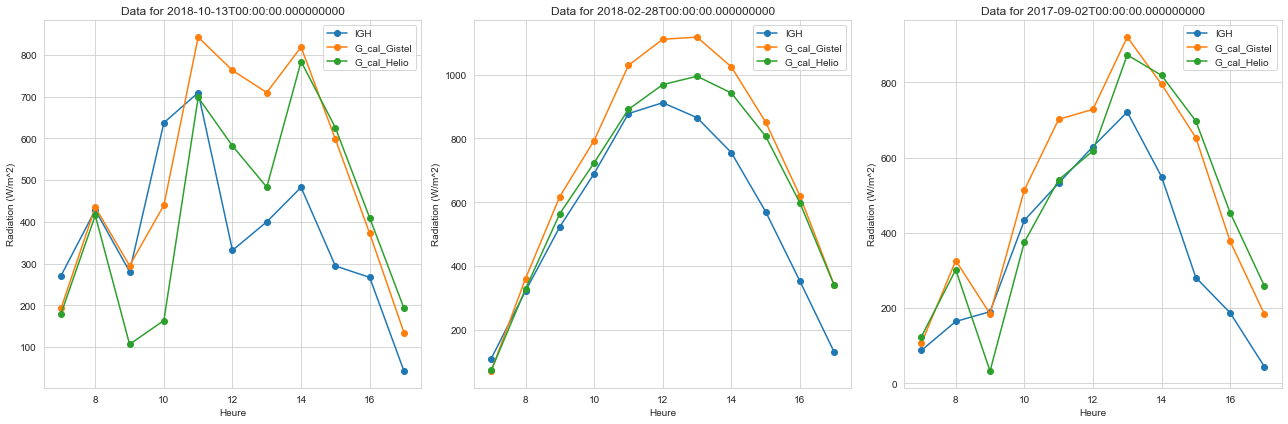

In [140]:
plot_random_days(df_merge_abidjan, 3)

In [3]:
plot_scatter_comparison(df_merge_abidjan)

NameError: name 'plot_scatter_comparison' is not defined

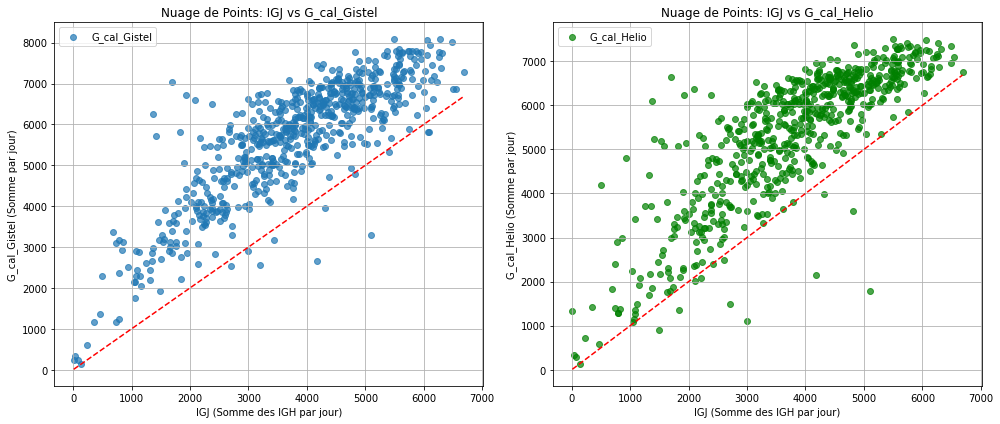

In [13]:
plot_scatter_comparison_igj(df_merge_abidjan, show=True)

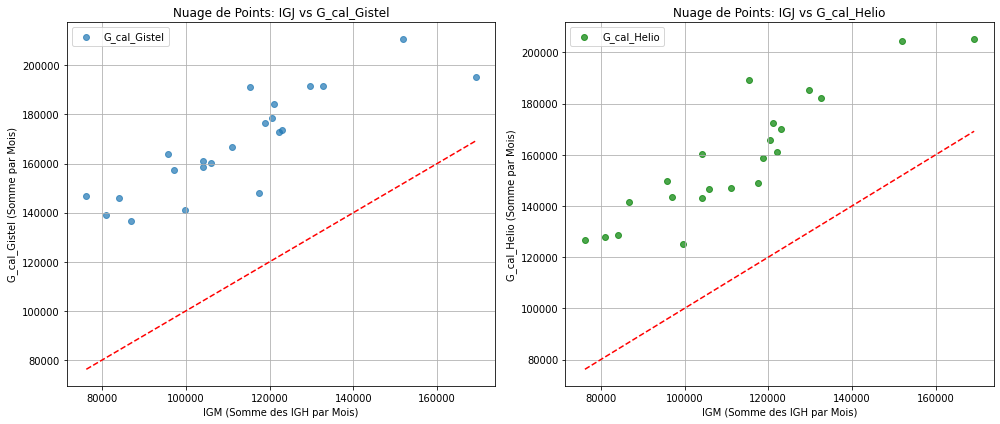

In [12]:
plot_scatter_comparison_igm(df_merge_abidjan, show=True)

#### Evaluation sur Mbrimbo

In [142]:
df_real_mbrimbo = pd.read_csv("./indice_clarte_mbrimbo.csv")

In [143]:
results_mbrimbo, results_yearly_mbrimbo, results_igj_mbrimbo, results_igj_yearly_mbrimbo, results_igm_mbrimbo, df_merge_mbrimbo, df_merge_kt_mbrimbo = evaluate_model(df_real_mbrimbo, df_hourly_mbrimbo, df_hourly_mbrimbo_h)

(7665, 8)
(4875, 8)


In [99]:
results_mbrimbo.to_csv('./mbrimbo_hourly_igh_comparison.csv')


results_mbrimbo

,2017-1_G_cal_Gistel,2017-1_G_cal_Helio,2017-2_G_cal_Gistel,2017-2_G_cal_Helio,2017-3_G_cal_Gistel,2017-3_G_cal_Helio,2017-4_G_cal_Gistel,2017-4_G_cal_Helio,2017-5_G_cal_Gistel,2017-5_G_cal_Helio,2017-6_G_cal_Gistel,2017-6_G_cal_Helio,2017-7_G_cal_Gistel,2017-7_G_cal_Helio,2017-8_G_cal_Gistel,2017-8_G_cal_Helio,2017-9_G_cal_Gistel,2017-9_G_cal_Helio,2017-10_G_cal_Gistel,2017-10_G_cal_Helio,2017-11_G_cal_Gistel,2017-11_G_cal_Helio,2017-12_G_cal_Gistel,2017-12_G_cal_Helio,2018-1_G_cal_Gistel,2018-1_G_cal_Helio,2018-2_G_cal_Gistel,2018-2_G_cal_Helio,2018-3_G_cal_Gistel,2018-3_G_cal_Helio,2018-4_G_cal_Gistel,2018-4_G_cal_Helio,2018-5_G_cal_Gistel,2018-5_G_cal_Helio,2018-6_G_cal_Gistel,2018-6_G_cal_Helio,2018-7_G_cal_Gistel,2018-7_G_cal_Helio,2018-8_G_cal_Gistel,2018-8_G_cal_Helio,2018-9_G_cal_Gistel,2018-9_G_cal_Helio,2018-11_G_cal_Gistel,2018-11_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.924140,0.887316,0.924109,0.887513,0.818946,0.866565,0.892351,0.891016,0.899865,0.852951,0.847135,0.779782,0.810237,0.757515,0.896852,0.730464,0.869482,0.734746,0.878130,0.854598,0.894706,0.891732,0.862929,0.915624,0.869952,0.920923,0.904286,0.915409,0.902897,0.897168,0.888049,0.827224,0.630314,0.597017,0.149797,0.065596,0.258865,0.293588,0.852170,0.768443,0.881620,0.745224,0.909878,0.931111,0.839881,0.823193
MBE,194.685896,178.313156,209.730769,171.525974,88.912838,120.611850,128.567533,129.673279,164.774342,117.410375,179.849624,117.059159,154.606968,140.222052,188.295314,147.468355,172.508588,104.648727,143.232312,130.335836,162.709475,148.720703,139.800805,208.049963,163.509230,221.680547,182.850521,203.739507,122.115353,100.348150,163.856166,139.178131,205.625774,133.627891,299.573827,210.879632,199.026592,142.800505,123.844202,91.067253,163.351578,85.506595,21.961340,41.546475,160.044604,145.629089
MAE,53.988933,51.494053,54.416401,46.247832,31.769033,29.821700,31.877523,29.953739,42.692079,36.422423,61.628316,52.030220,55.353254,54.350146,72.142422,67.639697,56.891637,54.088809,42.660211,42.750713,46.675895,41.473948,47.701290,61.773533,49.743470,61.400791,51.182218,54.281918,31.123732,27.564126,43.143613,38.026712,61.579911,47.811095,149.617615,129.732475,111.743752,99.169428,36.414261,37.022042,33.731691,31.169557,19.091168,11.826640,47.475420,45.214253
RMSE,234.477644,222.201320,252.260867,220.376577,194.116979,185.772509,185.926110,180.237049,211.138843,185.962702,232.581443,196.927467,205.677461,204.367522,224.667998,215.204217,217.170265,204.511649,198.356520,192.840752,214.649905,189.651442,191.845864,234.055019,213.324470,250.492220,230.420045,235.256944,179.937349,160.431501,218.328568,202.869833,308.137734,258.000081,433.498207,381.454482,359.233737,326.337988,183.611128,184.964518,209.938462,191.620714,138.609613,92.821834,224.769922,213.491771
MAPE,82.767369,104.565235,87.248931,106.294965,77.257069,92.486619,inf,inf,90.422661,92.352804,inf,inf,105.642302,112.667913,159.877402,225.321220,97.022781,114.169029,114.694582,178.123665,115.093017,141.665601,78.196057,103.708316,73.193812,91.491599,72.323665,84.511967,51.109474,56.603727,79.198336,93.186521,inf,inf,inf,inf,inf,inf,84.116202,93.355615,48.319164,39.657205,23.177094,12.758233,inf,inf


In [100]:
results_yearly_mbrimbo.to_csv('./mbrimbo_hourly_igh_comparison_per_year.csv')


results_yearly_mbrimbo

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio
R,0.872189,0.853752,0.774213,0.761142
MBE,157.127434,142.588344,166.133896,151.976329
MAE,46.318582,44.004514,49.809632,47.655207
RMSE,212.823551,201.842820,247.858241,235.961874
MAPE,inf,inf,inf,inf


In [101]:
results_igj_mbrimbo.to_csv('./mbrimbo_igj_comparison.csv')


results_igj_mbrimbo

,2017-1_G_cal_Gistel,2017-1_G_cal_Helio,2017-2_G_cal_Gistel,2017-2_G_cal_Helio,2017-3_G_cal_Gistel,2017-3_G_cal_Helio,2017-4_G_cal_Gistel,2017-4_G_cal_Helio,2017-5_G_cal_Gistel,2017-5_G_cal_Helio,2017-6_G_cal_Gistel,2017-6_G_cal_Helio,2017-7_G_cal_Gistel,2017-7_G_cal_Helio,2017-8_G_cal_Gistel,2017-8_G_cal_Helio,2017-9_G_cal_Gistel,2017-9_G_cal_Helio,2017-10_G_cal_Gistel,2017-10_G_cal_Helio,2017-11_G_cal_Gistel,2017-11_G_cal_Helio,2017-12_G_cal_Gistel,2017-12_G_cal_Helio,2018-1_G_cal_Gistel,2018-1_G_cal_Helio,2018-2_G_cal_Gistel,2018-2_G_cal_Helio,2018-3_G_cal_Gistel,2018-3_G_cal_Helio,2018-4_G_cal_Gistel,2018-4_G_cal_Helio,2018-5_G_cal_Gistel,2018-5_G_cal_Helio,2018-6_G_cal_Gistel,2018-6_G_cal_Helio,2018-7_G_cal_Gistel,2018-7_G_cal_Helio,2018-8_G_cal_Gistel,2018-8_G_cal_Helio,2018-9_G_cal_Gistel,2018-9_G_cal_Helio,2018-11_G_cal_Gistel,2018-11_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.977382,0.976052,0.977596,0.953519,0.850228,0.860894,0.954026,0.962817,0.959735,0.949797,0.926726,0.900814,0.945529,0.932817,0.986563,0.988945,0.957423,0.945919,0.893093,0.899028,0.927988,0.923528,0.851935,0.932013,0.772181,0.595814,0.872765,0.948087,0.925908,0.922110,0.905915,0.906126,0.731761,0.738686,0.331381,0.246088,0.471665,0.486412,0.982630,0.974179,0.867121,0.766024,0.996074,0.997459,0.907639,0.908556
MBE,1887.606735,1728.862334,2157.230765,1764.267158,945.439843,1282.506009,1363.734185,1375.462990,1757.592986,1252.377330,1916.328756,1247.285525,1410.015552,1278.825116,1591.951291,1246.777912,1787.816280,1084.541354,1570.935039,1429.489814,1757.262332,1606.183587,1474.673012,2194.591542,1788.052542,2424.184048,1926.963181,2147.100960,1319.633658,1084.407429,1631.734319,1385.982224,2026.882629,1317.189213,2696.164444,1897.916686,1536.927569,1102.737231,684.402167,503.266399,176.964209,92.632145,48.314949,91.402245,1566.701696,1425.585957
MAE,52.908243,48.472029,53.336608,43.620751,18.695391,25.360631,26.863956,27.095000,40.759388,29.043205,59.000569,38.846527,51.002563,46.301663,71.324244,55.859430,55.274767,33.531281,38.154155,34.718798,42.845137,39.161573,41.582565,61.561794,45.131490,61.187821,48.245649,53.757270,26.438797,21.930784,38.806508,32.961941,52.769652,34.404180,125.737298,100.746110,81.914682,63.785997,33.353204,30.006311,33.731691,31.169557,7.410253,7.742847,42.235622,38.789422
RMSE,2022.723687,1849.422568,2218.130665,1844.511103,1078.248537,1362.786680,1424.222974,1402.840520,1825.515064,1377.156949,1983.355777,1411.040141,1585.256472,1477.170644,1799.970641,1358.880127,1827.811066,1157.573501,1629.835997,1480.044161,1793.052513,1638.017842,1598.246697,2231.110594,1885.422176,2455.219885,2034.839131,2183.756842,1416.202083,1165.283284,1790.819989,1529.987394,2318.572732,1726.649521,3004.795468,2499.701298,2309.338839,2001.618089,931.844649,784.049752,225.238944,204.807035,121.871146,118.734177,1764.755033,1639.161260
MAPE,64.764212,61.285301,57.722528,47.561495,20.896933,27.845436,27.608656,28.918681,43.813738,30.529913,63.781697,40.520317,67.556395,63.899075,107.009870,140.115103,59.388017,35.577965,38.229006,34.847141,43.966300,40.604680,43.876509,64.269152,44.950026,62.912750,48.272627,54.265636,26.773144,22.832209,39.817031,34.606054,66.196367,44.799799,150.947333,125.194903,1107.454713,570.911983,41.556731,46.305935,47.805648,38.988858,13.273018,12.055089,86.692427,64.779092


In [102]:
results_igj_yearly_mbrimbo.to_csv('./mbrimbo_igj_comparison_per_year.csv')


results_igj_yearly_mbrimbo

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio
R,0.919943,0.930007,0.893173,0.885933
MBE,1628.591267,1477.896801,1457.363454,1333.170133
MAE,41.827629,37.977012,43.058850,40.428665
RMSE,1744.299775,1592.475796,1800.324756,1718.542252
MAPE,49.391994,46.193586,152.589858,97.613487


In [103]:
results_igm_mbrimbo.to_csv('./mbrimbo_igm_comparison.csv')


results_igm_mbrimbo

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.966986,0.972380,0.991335,0.981441,0.984574,0.982008
MBE,43157.668582,39164.265215,26232.542177,23997.062391,35464.429307,32270.082113
MAE,41.808392,37.939838,42.729923,39.088573,42.113762,38.320497
RMSE,44722.610239,41229.559654,31495.324748,31693.523330,39266.511992,37199.287189
MAPE,45.960996,40.255854,48.191957,39.501791,46.975069,39.913098


In [104]:
df_merge_mbrimbo.to_csv('./mbrimbo_mes_cal.csv')

In [14]:
df_merge_mbrimbo = pd.read_csv('./mbrimbo_mes_cal.csv')

In [105]:
df_merge_kt_mbrimbo.to_csv('./mbrimbo_kt_all_models.csv')

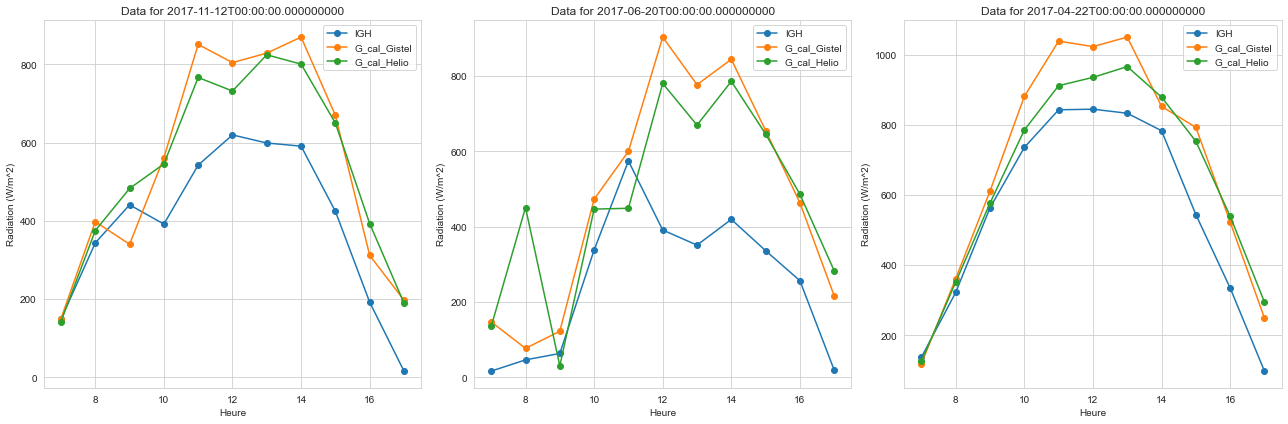

In [144]:
plot_random_days(df_merge_mbrimbo, 3)

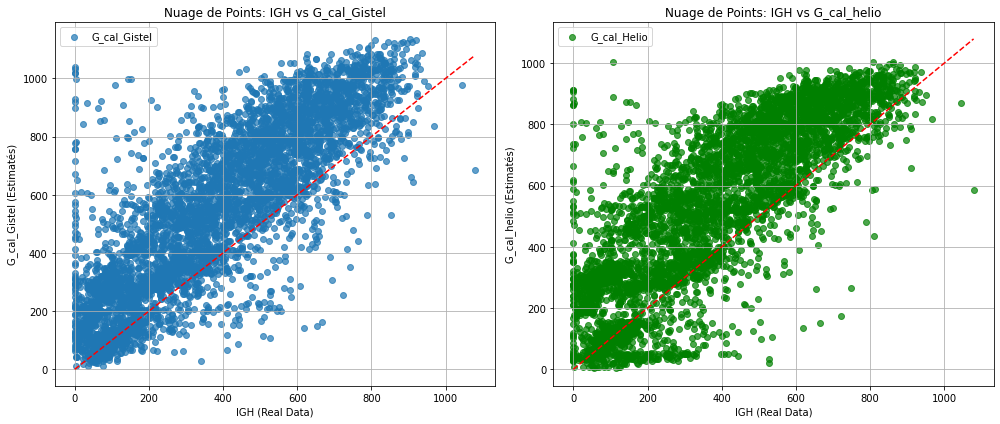

In [107]:
plot_scatter_comparison(df_merge_mbrimbo)


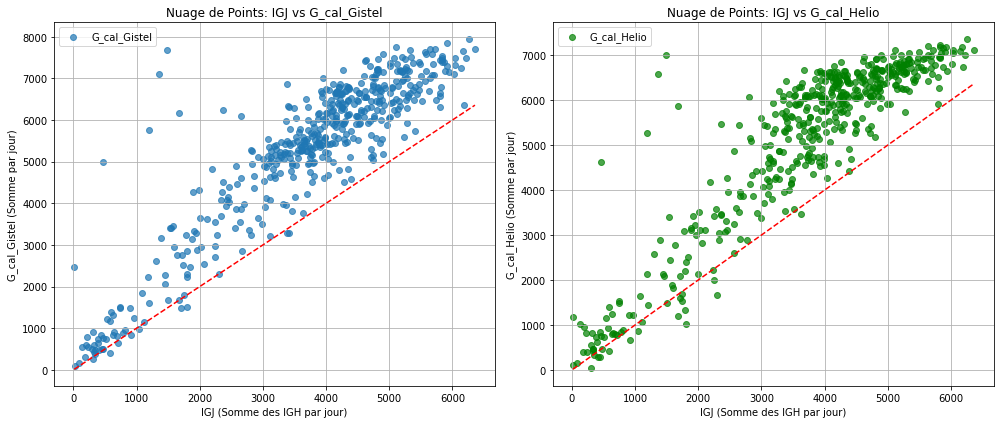

In [16]:
plot_scatter_comparison_igj(df_merge_mbrimbo, show=True)


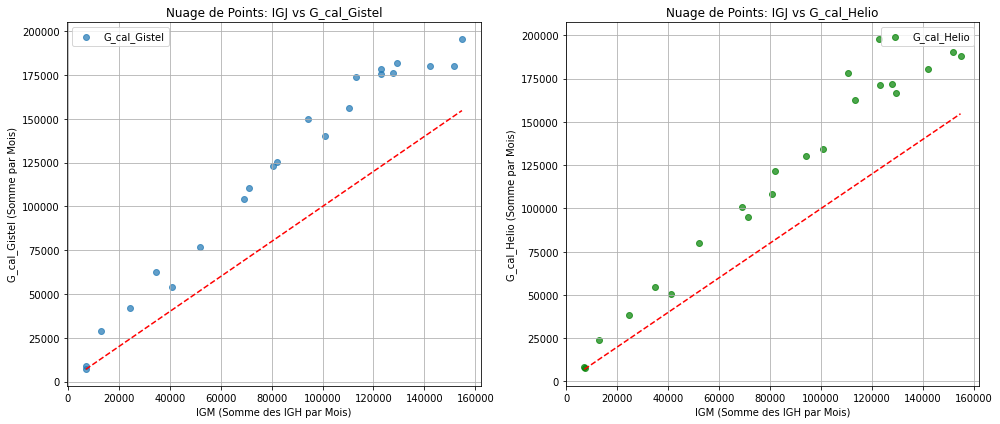

In [18]:
plot_scatter_comparison_igm(df_merge_mbrimbo, show=True)


#### Evaluation sur Yakro

In [145]:
df_real_yakro = pd.read_csv("./indice_clarte_yakro.csv")

In [146]:
results_yakro, results_yearly_yakro, results_igj_yakro, results_igj_yearly_yakro, results_igm_yakro, df_merge_yakro, df_merge_kt_yakro = evaluate_model(df_real_yakro, df_hourly_yakro, df_hourly_yakro_h)

(7995, 8)
(7875, 8)


In [110]:
results_yakro.to_csv('./yakro_hourly_igh_comparison.csv')


results_yakro

,2017-1_G_cal_Gistel,2017-1_G_cal_Helio,2017-2_G_cal_Gistel,2017-2_G_cal_Helio,2017-3_G_cal_Gistel,2017-3_G_cal_Helio,2017-4_G_cal_Gistel,2017-4_G_cal_Helio,2017-5_G_cal_Gistel,2017-5_G_cal_Helio,2017-6_G_cal_Gistel,2017-6_G_cal_Helio,2017-7_G_cal_Gistel,2017-7_G_cal_Helio,2017-8_G_cal_Gistel,2017-8_G_cal_Helio,2017-9_G_cal_Gistel,2017-9_G_cal_Helio,2017-10_G_cal_Gistel,2017-10_G_cal_Helio,2017-11_G_cal_Gistel,2017-11_G_cal_Helio,2017-12_G_cal_Gistel,2017-12_G_cal_Helio,2018-1_G_cal_Gistel,2018-1_G_cal_Helio,2018-2_G_cal_Gistel,2018-2_G_cal_Helio,2018-3_G_cal_Gistel,2018-3_G_cal_Helio,2018-4_G_cal_Gistel,2018-4_G_cal_Helio,2018-5_G_cal_Gistel,2018-5_G_cal_Helio,2018-6_G_cal_Gistel,2018-6_G_cal_Helio,2018-7_G_cal_Gistel,2018-7_G_cal_Helio,2018-8_G_cal_Gistel,2018-8_G_cal_Helio,2018-9_G_cal_Gistel,2018-9_G_cal_Helio,2018-10_G_cal_Gistel,2018-10_G_cal_Helio,2018-11_G_cal_Gistel,2018-11_G_cal_Helio,2018-12_G_cal_Gistel,2018-12_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.660034,0.635597,0.630516,0.584612,0.725831,0.674275,0.908116,0.891087,0.923781,0.883455,0.882157,0.828217,0.886786,0.804555,0.906466,0.737733,0.915707,0.752751,0.888890,0.848967,0.585786,0.540285,0.656983,0.659140,0.631143,0.615234,0.604272,0.574028,0.635802,0.564202,0.898405,0.861406,0.930430,0.892536,0.895165,0.796147,0.904103,0.816242,0.906287,0.785993,0.902995,0.778509,0.827387,0.772668,0.567475,0.575863,0.901469,0.881375,0.787963,0.735441
MBE,187.671091,200.765826,191.003169,189.957541,156.627512,121.405548,154.844633,120.552049,172.355152,137.406508,179.953234,126.147708,150.825501,139.221638,165.727809,85.918552,192.764211,89.606239,133.131326,108.872391,178.735974,172.038349,202.527818,222.966308,188.055397,227.491612,172.007262,202.157821,115.638230,148.158443,167.350343,162.377327,184.956939,151.487306,192.996237,139.742224,182.622750,123.561567,190.891967,119.054309,172.317842,89.507965,121.572461,108.519801,114.241877,155.276208,153.633493,191.337758,167.420542,146.575459
MAE,67.482265,69.824689,66.757450,66.746475,48.501628,45.255268,36.095926,29.319597,44.209231,37.857238,56.858386,48.328926,54.365890,58.715874,63.905119,62.448445,61.297584,51.549025,38.287002,38.084116,70.857690,70.919074,73.701123,75.812791,72.277853,76.694747,64.035648,69.842649,49.314563,55.429694,45.576656,44.247655,48.125824,41.235719,63.437134,54.150881,61.384848,54.555826,64.192925,54.344063,54.009443,46.931070,40.471720,43.766533,61.412271,63.308398,47.541060,54.949482,55.405008,53.860606
RMSE,298.534887,306.423960,311.844196,310.856313,274.060344,258.752107,209.006622,178.031610,210.370905,184.196897,228.051163,192.166298,199.510299,204.957823,203.399899,195.884826,226.469392,205.283267,191.005469,181.988208,295.852115,294.781974,300.195072,305.746900,309.525149,325.650907,302.838517,327.301968,250.815886,279.632468,214.192722,211.704968,215.420631,187.510145,227.209894,202.940863,220.202032,196.850586,233.658361,197.298046,216.055392,188.231960,187.225768,199.167887,268.820052,283.018156,203.032640,230.515120,244.216153,240.131911
MAPE,844.605280,1029.654594,inf,inf,inf,inf,63.734983,62.634538,64.347292,71.209935,93.445231,92.699727,68.016797,82.188461,93.143996,112.413042,103.054628,131.569051,inf,inf,inf,inf,inf,inf,1335.395642,1895.526256,486.205007,553.679910,413.130529,473.952170,65.521264,71.612292,64.483203,73.020774,124.980369,163.689203,83.524299,84.907049,86.793178,97.370922,76.064349,81.871613,inf,inf,inf,inf,inf,inf,inf,inf


In [111]:
results_yearly_yakro.to_csv('./yakro_hourly_igh_comparison_per_year.csv')


results_yearly_yakro

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio
R,0.795134,0.738575,0.779738,0.732457
MBE,171.632892,141.939706,163.232726,151.184212
MAE,55.341892,52.874751,55.469309,54.864982
RMSE,248.666478,239.797261,239.709861,240.464149
MAPE,inf,inf,inf,inf


In [112]:
results_igj_yakro.to_csv('./yakro_igj_comparison.csv')

results_igj_yakro

,2017-1_G_cal_Gistel,2017-1_G_cal_Helio,2017-2_G_cal_Gistel,2017-2_G_cal_Helio,2017-3_G_cal_Gistel,2017-3_G_cal_Helio,2017-4_G_cal_Gistel,2017-4_G_cal_Helio,2017-5_G_cal_Gistel,2017-5_G_cal_Helio,2017-6_G_cal_Gistel,2017-6_G_cal_Helio,2017-7_G_cal_Gistel,2017-7_G_cal_Helio,2017-8_G_cal_Gistel,2017-8_G_cal_Helio,2017-9_G_cal_Gistel,2017-9_G_cal_Helio,2017-10_G_cal_Gistel,2017-10_G_cal_Helio,2017-11_G_cal_Gistel,2017-11_G_cal_Helio,2017-12_G_cal_Gistel,2017-12_G_cal_Helio,2018-1_G_cal_Gistel,2018-1_G_cal_Helio,2018-2_G_cal_Gistel,2018-2_G_cal_Helio,2018-3_G_cal_Gistel,2018-3_G_cal_Helio,2018-4_G_cal_Gistel,2018-4_G_cal_Helio,2018-5_G_cal_Gistel,2018-5_G_cal_Helio,2018-6_G_cal_Gistel,2018-6_G_cal_Helio,2018-7_G_cal_Gistel,2018-7_G_cal_Helio,2018-8_G_cal_Gistel,2018-8_G_cal_Helio,2018-9_G_cal_Gistel,2018-9_G_cal_Helio,2018-10_G_cal_Gistel,2018-10_G_cal_Helio,2018-11_G_cal_Gistel,2018-11_G_cal_Helio,2018-12_G_cal_Gistel,2018-12_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.845759,0.822776,0.903287,0.871169,0.890908,0.855499,0.860161,0.815628,0.912750,0.850495,0.949556,0.938111,0.931019,0.948258,0.950976,0.937432,0.942473,0.840514,0.806110,0.806651,0.937878,0.924627,0.921245,0.943251,0.689512,0.798763,0.787639,0.783012,0.887774,0.862110,0.954703,0.934680,0.933784,0.938510,0.946504,0.919786,0.923057,0.918939,0.871714,0.834998,0.839330,0.866042,0.912412,0.866054,0.914225,0.930306,0.913442,0.924734,0.882059,0.867877
MBE,2064.381999,2208.424082,2080.570235,2069.180354,1722.902628,1335.461033,1703.290967,1326.072535,1895.906673,1511.471584,1861.585176,1304.976290,1629.888483,1504.491896,1817.659842,942.332502,2120.406322,985.668628,1464.444585,1197.596305,1930.348518,1858.014169,2086.036530,2296.552977,2026.145249,2451.038654,1885.936769,2216.516109,1268.290263,1624.963568,1807.383703,1753.675134,1974.862805,1617.493489,2103.658984,1523.190245,2008.850252,1359.177234,2099.811638,1309.597403,1895.496264,984.587618,1337.297072,1193.717806,1217.266893,1654.494769,1660.232907,2067.682221,1818.533479,1592.112745
MAE,50.903916,54.455732,48.667003,48.400580,33.147226,25.693169,32.303340,25.342478,42.426024,33.823253,54.837271,39.280663,51.396196,47.556412,62.996514,33.446681,60.200858,28.021288,33.737945,27.590281,50.598268,48.702241,59.960037,66.011021,52.307021,63.276081,43.288437,50.876318,28.269089,35.257931,41.172046,39.948569,47.537158,38.934879,62.768664,45.806294,60.255194,40.768339,63.194718,39.412887,52.401847,27.517824,33.272942,29.700583,30.705260,41.734226,42.506439,52.769667,46.105106,40.420176
RMSE,2136.668002,2230.807226,2138.854078,2107.535321,1776.186688,1403.662615,1778.057644,1415.579888,1938.505975,1584.439458,1943.423667,1466.891731,1754.025838,1618.479586,1878.644926,1129.742796,2153.004562,1125.716588,1539.889320,1280.363776,1980.068727,1902.628264,2168.641699,2316.034130,2142.437208,2475.509827,2026.130970,2253.678284,1376.248836,1667.733481,1859.022979,1794.126278,2033.411926,1660.021912,2162.339548,1626.363661,2051.158493,1456.387088,2151.523801,1414.729907,1950.236003,1100.705343,1391.676306,1275.282789,1327.823567,1700.267238,1749.158140,2086.402400,1908.229943,1712.299392
MAPE,50.803595,55.673851,48.837090,49.684516,33.627944,26.433367,32.711605,26.134095,42.894189,34.498586,59.248027,40.186789,50.148554,45.934833,64.755131,32.117182,62.447648,30.367759,34.054514,27.867504,50.520815,49.012282,61.686469,71.042614,53.834160,65.543993,43.182675,52.546172,28.210034,36.018717,42.214586,41.481395,49.219419,41.452194,62.817644,45.352398,64.318466,41.410113,63.674658,39.158432,53.521271,27.493167,34.079442,30.631453,32.714721,45.902550,42.459785,54.922016,48.428507,42.042463


In [113]:
results_igj_yearly_yakro.to_csv('./yakro_igj_comparison_per_year.csv')


results_igj_yearly_yakro

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio
R,0.913229,0.873437,0.838410,0.864183
MBE,1861.410871,1539.379246,1775.774206,1644.700973
MAE,46.649062,38.716185,45.550930,42.156180
RMSE,1938.120218,1673.822392,1877.948287,1749.828019
MAPE,49.228247,40.596401,47.630970,43.484542


In [114]:
results_igm_yakro.to_csv('./yakro_igm_comparison.csv')


results_igm_yakro

,2017_G_cal_Gistel,2017_G_cal_Helio,2018_G_cal_Gistel,2018_G_cal_Helio,Overall_Gistel,Overall_Heliostat
R,0.972649,0.870505,0.648059,0.830723,0.898393,0.842690
MBE,56152.561275,46437.940583,53717.169721,49752.204422,54934.865498,48095.072502
MAE,46.648585,38.578191,45.463745,42.107981,46.061678,40.326662
RMSE,56396.796321,48136.344911,54622.784919,51252.523409,55516.877018,49718.853854
MAPE,48.430853,39.695746,46.399444,42.112298,47.415148,40.904022


In [115]:
df_merge_yakro

,Année,Mois,Jour,Heure,IGH,IGH0,G_cal_Gistel,G_cal_Helio
0,2017,1,1,7,122.666667,293.470320,67.394730,59.849547
1,2017,1,1,8,208.000000,601.133279,224.124725,242.840128
2,2017,1,1,9,455.316667,863.328723,373.786977,398.534541
3,2017,1,1,10,641.783333,1062.188465,681.587896,670.053749
4,2017,1,1,11,653.766667,1184.160543,870.836463,830.061599
...,...,...,...,...,...,...,...,...
7990,2018,12,31,13,612.716667,1168.419303,819.103087,890.132107
7991,2018,12,31,14,460.366667,1032.726896,773.786581,829.652721
7992,2018,12,31,15,369.716667,822.140829,656.138557,697.891746
7993,2018,12,31,16,186.100000,551.012194,466.762833,499.244900


In [116]:
df_merge_yakro.to_csv('./yakro_mes_cal.csv')

In [19]:
df_merge_yakro = pd.read_csv('./yakro_mes_cal.csv')

In [117]:
df_merge_kt_yakro.to_csv('./yakro_kt_all_models.csv')

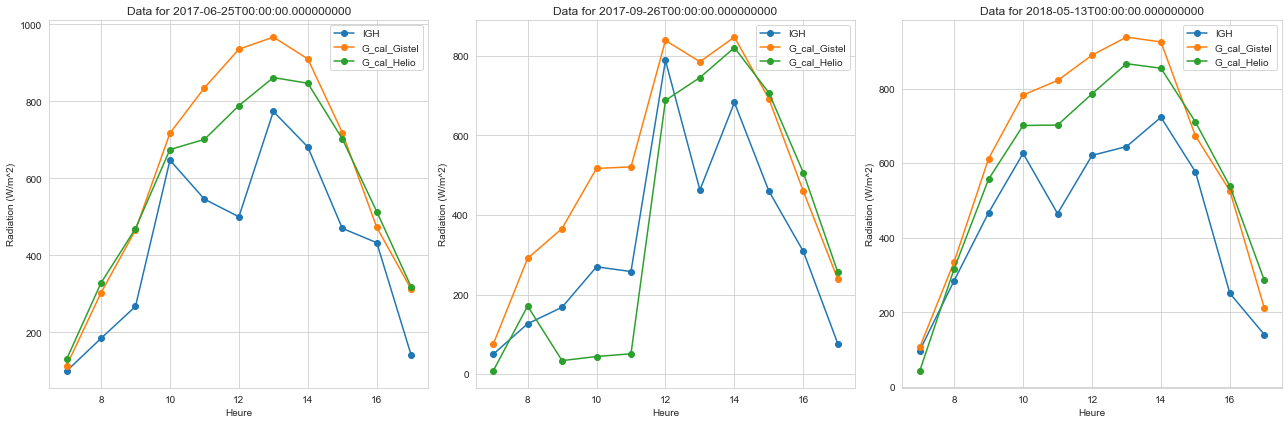

In [147]:
plot_random_days(df_merge_yakro, 3)

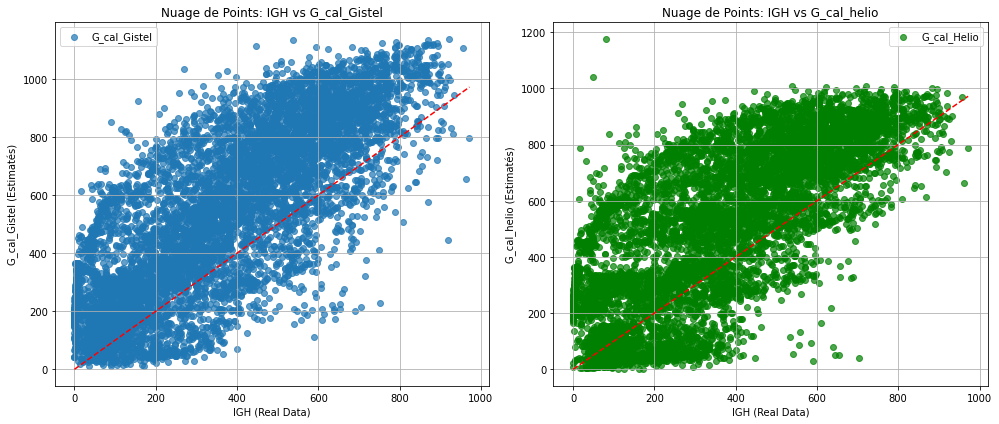

In [119]:
plot_scatter_comparison(df_merge_yakro)


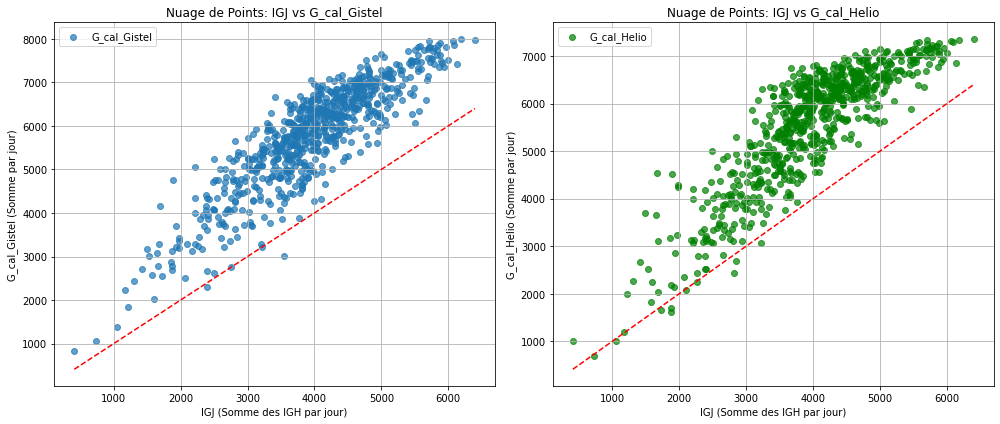

In [20]:
plot_scatter_comparison_igj(df_merge_yakro, show=True)


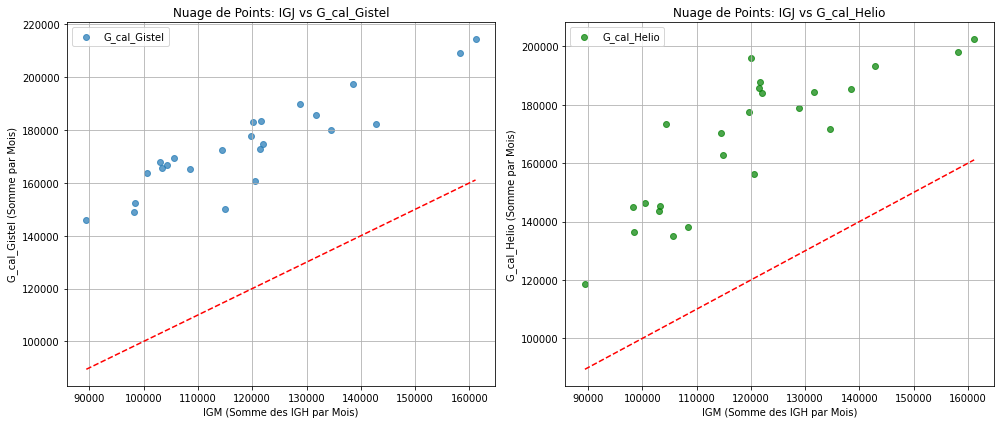

In [21]:
plot_scatter_comparison_igm(df_merge_yakro, show=True)


### Evaluation sur les données où les valeurs manquantes ont été imputées [TEST]

#### Abidjan 

In [87]:
df_real_filled_abidjan = pd.read_csv("./indice_clarte_abidjan_filled.csv")

In [88]:
results_abidjan_filled, df_merge_abidjan_filled = evaluate_model(df_real_filled_abidjan, df_hourly_abidjan, df_hourly_abidjan_h)

In [204]:
results_abidjan_filled

,03-2017_Gistel,03-2017_Heliostat,04-2017_Gistel,04-2017_Heliostat,05-2017_Gistel,05-2017_Heliostat,06-2017_Gistel,06-2017_Heliostat,07-2017_Gistel,07-2017_Heliostat,08-2017_Gistel,08-2017_Heliostat,09-2017_Gistel,09-2017_Heliostat,10-2017_Gistel,10-2017_Heliostat,11-2017_Gistel,11-2017_Heliostat,12-2017_Gistel,12-2017_Heliostat,01-2018_Gistel,01-2018_Heliostat,02-2018_Gistel,02-2018_Heliostat,03-2018_Gistel,03-2018_Heliostat,04-2018_Gistel,04-2018_Heliostat,05-2018_Gistel,05-2018_Heliostat,06-2018_Gistel,06-2018_Heliostat,07-2018_Gistel,07-2018_Heliostat,08-2018_Gistel,08-2018_Heliostat,09-2018_Gistel,09-2018_Heliostat,10-2018_Gistel,10-2018_Heliostat,11-2018_Gistel,11-2018_Heliostat,12-2018_Gistel,12-2018_Heliostat,2017_Gistel,2017_Heliostat,2018_Gistel,2018_Heliostat,Overall_Gistel,Overall_Heliostat
R,0.687464,0.914246,0.814171,0.828253,0.793533,0.746538,0.743344,0.697120,0.654111,0.699280,0.751025,0.790064,0.783923,0.834309,0.756683,0.827839,0.601868,0.837479,0.702554,0.888350,0.776470,0.902814,0.623838,0.889187,0.695418,0.917633,0.812370,0.813855,0.864633,0.761259,0.606550,0.538203,0.647870,0.790864,0.823104,0.827339,0.799279,0.825696,0.670049,0.791317,0.562359,0.831662,0.722016,0.830653,0.702208,0.824156,0.691800,0.813680,0.695029,0.818161
MBE,5.512783,366.867982,91.169228,376.325646,193.895249,333.685191,190.329902,320.400334,140.587304,328.337987,188.038885,326.430079,106.206320,314.812982,59.636167,304.133733,22.205077,320.288002,99.332482,359.931334,111.938522,405.384001,34.929853,358.751681,-75.844039,324.007400,112.913481,359.047137,173.291545,323.577202,133.417988,276.532628,121.218031,322.583374,84.561725,291.953969,62.795374,293.997239,56.932634,304.974788,-6.676685,286.595488,117.798356,381.072367,108.635148,334.807265,77.529151,326.708158,91.830506,330.431820
MAE,167.636300,371.678766,154.138926,381.252624,211.023918,350.871835,208.634641,335.291243,168.496993,341.765525,200.109993,334.990431,146.157738,323.227034,145.715866,316.535057,176.836704,325.732968,178.169193,361.639562,163.382184,406.358472,177.378649,365.691000,170.316073,328.243897,175.119112,365.016025,188.370441,334.472494,198.192118,331.751801,171.125123,330.250884,124.667024,302.918627,115.489175,303.111321,157.848943,312.768935,180.984797,297.029843,181.693008,383.618998,175.248272,343.949403,166.626231,337.841423,170.590317,340.649640
RMSE,215.720170,418.187191,192.870056,439.909603,262.643647,419.075978,249.963533,404.936190,226.212979,399.362648,250.834026,389.723864,195.030247,377.758941,188.131005,372.389804,213.285009,382.269803,220.967454,414.493168,209.257052,458.764624,225.258481,419.429355,225.398672,373.088964,221.262966,429.120617,228.847846,400.595204,257.624561,403.054177,219.007640,387.781577,168.640051,356.378507,150.556268,354.338728,206.021850,377.500472,232.824102,355.752147,223.747747,440.612378,222.509559,401.817852,215.430540,397.165565,218.713661,399.311241
MAPE,54.789810,122.252165,74.545828,191.903715,172.747807,238.932307,inf,inf,120.954243,221.127176,130.481036,218.110193,78.297658,151.212647,282.321302,484.109699,inf,inf,92.461828,164.770436,65.994929,143.533506,58.533300,115.704956,40.416385,84.291901,70.980888,194.410254,127.019617,270.223675,196.568189,287.909455,inf,inf,51.318428,112.822840,66.434366,150.866642,174.603526,256.933895,108.296213,151.779938,98.205355,179.944957,inf,inf,inf,inf,inf,inf


In [260]:
results_abidjan

{'Gistel': {'R': 0.8505398930935716,
  'MBE': 173.40946828213754,
  'MAE': 53.836714624493546,
  'RMSE': 230.48207216827493,
  'MAPE': inf},
 'Heliostat': {'R': 0.8127650930761149,
  'MBE': 377.83846675413014,
  'MAE': 109.79536211835274,
  'RMSE': 436.2017355092915,
  'MAPE': inf}}

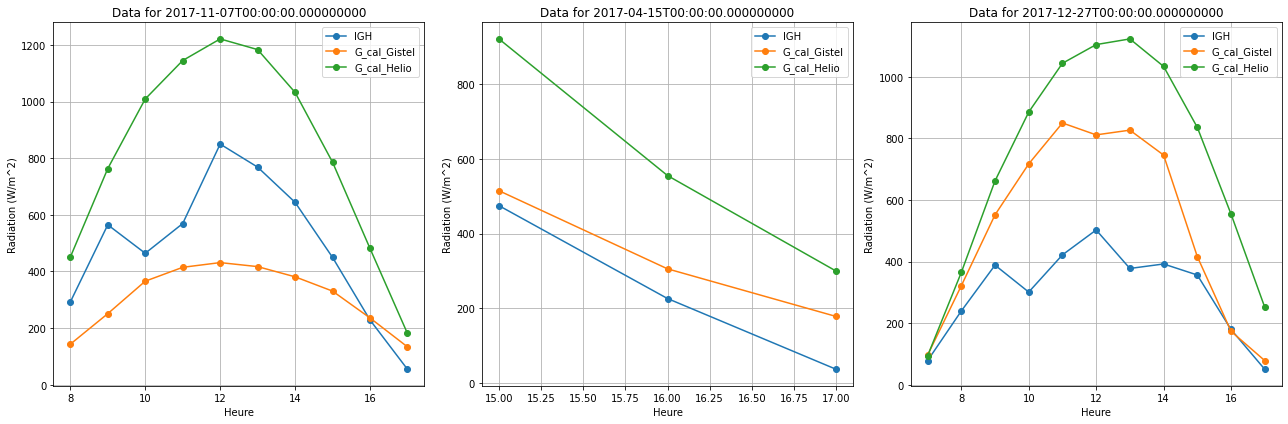

In [320]:
plot_random_days(df_merge_abidjan_filled, 3)

In [463]:
df_merge_abidjan

,Année,Mois,Jour,Heure,IGH,G_cal,G_cal_Helio,Date
1,2017,3,1,7,94.830508,97.855664,94.275847,2017-03-01
2,2017,3,1,8,264.316667,363.087460,402.321120,2017-03-01
3,2017,3,1,9,425.933333,631.031999,590.341822,2017-03-01
4,2017,3,1,10,450.000000,863.070549,760.541016,2017-03-01
5,2017,3,1,11,547.933333,1032.386228,770.887296,2017-03-01
...,...,...,...,...,...,...,...,...
8393,2018,12,31,13,500.750000,901.311269,357.679300,2018-12-31
8394,2018,12,31,14,361.416667,516.347733,690.810794,2018-12-31
8395,2018,12,31,15,249.400000,147.391671,36.536014,2018-12-31
8396,2018,12,31,16,145.216667,101.976829,25.224090,2018-12-31


In [466]:
df_merge_abidjan = df_merge_abidjan.assign(mes_gist = lambda x: x.G_cal - x.IGH,
                       mes_hest = lambda x: x.G_cal_Helio - x.IGH)

In [479]:
df_testing = df_merge_abidjan[(np.abs(df_merge_abidjan['mes_gist']) < 100) & (np.abs(df_merge_abidjan['mes_hest']) < 100)]

In [480]:
df_testing.describe()

,Année,Mois,Jour,Heure,IGH,G_cal,G_cal_Helio,mes_gist,mes_hest
count,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000,879.000000
mean,2017.580205,6.822526,15.559727,10.093288,209.258358,206.606499,232.549023,-2.651859,23.290665
std,0.493806,3.516041,8.516674,4.080392,186.229398,187.831900,177.784562,51.218368,49.845984
min,2017.000000,1.000000,1.000000,7.000000,20.983333,19.302384,12.672877,-99.838230,-98.064933
25%,2017.000000,4.000000,9.000000,7.000000,86.158333,80.932825,123.484976,-43.999265,-9.858685
50%,2018.000000,7.000000,15.000000,8.000000,127.433333,128.638952,161.481985,-3.668198,26.494994
75%,2018.000000,10.000000,23.000000,15.000000,279.058333,284.753341,299.488360,37.829783,63.840906
max,2018.000000,12.000000,31.000000,17.000000,949.633333,1009.894676,865.024112,99.708982,99.983338


In [481]:
df_testing

,Année,Mois,Jour,Heure,IGH,G_cal,G_cal_Helio,Date,mes_gist,mes_hest
1,2017,3,1,7,94.830508,97.855664,94.275847,2017-03-01,3.025155,-0.554661
11,2017,3,1,17,95.100000,140.137984,172.815884,2017-03-01,45.037984,77.715884
14,2017,3,2,7,69.016949,96.262121,94.635502,2017-03-02,27.245172,25.618553
24,2017,3,2,17,117.033333,136.083768,137.361018,2017-03-02,19.050435,20.327685
27,2017,3,3,7,84.050000,94.332843,96.253410,2017-03-03,10.282843,12.203410
...,...,...,...,...,...,...,...,...,...,...
8374,2018,12,30,7,75.266667,103.354799,100.111103,2018-12-30,28.088133,24.844436
8383,2018,12,30,16,137.433333,113.526886,158.896846,2018-12-30,-23.906447,21.463513
8384,2018,12,30,17,49.283333,58.836474,93.802421,2018-12-30,9.553141,44.519088
8387,2018,12,31,7,52.033333,104.771000,101.808561,2018-12-31,52.737667,49.775227


In [482]:
np.mean(np.abs(df_testing['mes_gist']))

43.227441940357544

In [483]:
np.mean(np.abs(df_testing['mes_hest']))

46.50355372986232

### Analyse & Comparaison Journalière

In [135]:
def compute_metrics(df):
    actual_col = 'IGH'
    pred_cols = ['G_cal_Gistel', 'G_cal_Helio']
    results = {}

    for date, group in df.groupby('Date'):
        date_metrics = {}
        G_mes = group[actual_col]

        for pred_col in pred_cols:
            G_cal = group[pred_col]
            R = G_mes.corr(G_cal)
            MBE = (G_cal - G_mes).mean()
            MAE = mean_absolute_error(G_mes, G_cal) / G_mes.mean() * 100
            RMSE = np.sqrt(mean_squared_error(G_mes, G_cal))
            MAPE = (np.abs((G_cal - G_mes) / G_mes).mean()) * 100

            date_metrics[pred_col] = {
                'R': R,
                'MBE': MBE,
                'MAE': MAE,
                'RMSE': RMSE,
                'MAPE': MAPE
            }

        results[date] = date_metrics

    return results

def select_best_days(metrics):
    best_days_gistel = []
    best_days_helio = []
    sorted_gistel = sorted(metrics.items(), key=lambda x: x[1]['G_cal_Gistel']['MAE'])[:3]
    sorted_helio = sorted(metrics.items(), key=lambda x: x[1]['G_cal_Helio']['MAE'])[:3]

    best_days_gistel = [day[0] for day in sorted_gistel]
    best_days_helio = [day[0] for day in sorted_helio]

    return best_days_gistel, best_days_helio

In [155]:
# Compute metrics function
def compute_metrics(df):
    actual_col = 'IGH'
    pred_cols = ['G_cal_Gistel', 'G_cal_Helio']
    results = []

    for date, group in df.groupby('Date'):
        date_metrics = {'Date': date}
        G_mes = group[actual_col]

        for pred_col in pred_cols:
            G_cal = group[pred_col]
            R = G_mes.corr(G_cal)
            MBE = (G_cal - G_mes).mean()
            MAE = mean_absolute_error(G_mes, G_cal) / G_mes.mean() * 100
            RMSE = np.sqrt(mean_squared_error(G_mes, G_cal))
            MAPE = (np.abs((G_cal - G_mes) / G_mes).mean()) * 100

            date_metrics[f'{pred_col}_R'] = R
            date_metrics[f'{pred_col}_MBE'] = MBE
            date_metrics[f'{pred_col}_MAE'] = MAE
            date_metrics[f'{pred_col}_RMSE'] = RMSE
            date_metrics[f'{pred_col}_MAPE'] = MAPE

        results.append(date_metrics)

    return pd.DataFrame(results)

def select_best_days(metrics_df):
    best_days_gistel = {}
    best_days_helio = {}

    metrics_df['Date'] = pd.to_datetime(metrics_df['Date'])
    metrics_df['Month'] = metrics_df['Date'].dt.to_period('M')

    for month, group in metrics_df.groupby('Month'):
        # Select the four best days for G_cal_Gistel
        sorted_gistel = group.sort_values('G_cal_Gistel_MAE').head(4)
        best_days_gistel[month] = sorted_gistel['Date'].tolist()

        # Select the four best days for G_cal_Helio
        sorted_helio = group.sort_values('G_cal_Helio_MAE').head(4)
        best_days_helio[month] = sorted_helio['Date'].tolist()

    return best_days_gistel, best_days_helio

def plot_best_days(best_days, df, pred_col, city):
    """plot"""
    
    # Create output folder
    output_folder = os.path.join('data', 'miscellaneous', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    selected_days = [str(day) for days in best_days.values() for day in days]
    n_days = len(selected_days)

#     fig, axs = plt.subplots(1, n_days, figsize=(6 * n_days, 6))

    if n_days == 1:
        axs = [axs]  # Make axs iterable if n_days is 1

    for i, day in enumerate(selected_days):
        plt.figure(figsize=(12, 10))

        df_day = df[df['Date'] == day]
        plt.plot(df_day['Heure'], df_day['IGH'], label='IGH', marker='o')
        plt.plot(df_day['Heure'], df_day[pred_col[0]], label=pred_col[0], marker='o')
        plt.plot(df_day['Heure'], df_day[pred_col[1]], label=pred_col[1], marker='o')

        plt.title(f'Comparaison IGH {city} du {selected_days[i].split(" ")[0]}',  fontsize=20)
        plt.xlabel('Heure (UTC)', fontsize=16)
        plt.ylabel('Radiation (Wh/m$^2$)', fontsize=16)

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
        
        plt.xticks(range(6, 19), fontsize=14)
        plt.yticks(fontsize=14)
        
        plt.grid(True)

        # Save plot
        plot_filename = os.path.join(output_folder, f'Comparaison IGH {city} du {selected_days[i].split(" ")[0]}.png')
        
        plt.tight_layout()
        plt.savefig(plot_filename, bbox_inches="tight", dpi=300)
        
        # Close plot
        plt.close()


#### Abidjan

In [ ]:
metrics_abidjan

In [123]:
metrics_abidjan = compute_metrics(df_merge_abidjan)
best_days_gistel_abidjan, best_days_helio_abidjan = select_best_days(metrics_abidjan)
plot_best_days(best_days_gistel_abidjan, df_merge_abidjan, ['G_cal_Gistel','G_cal_Helio'], 'abidjan')
# plot_best_days(best_days_helio_abidjan, df_merge_abidjan, 'G_cal_Helio')

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\f

In [95]:
plot_best_days(best_days_helio_abidjan, df_merge_abidjan, ['G_cal_Gistel','G_cal_Helio'], 'abidjan')


In [311]:
metrics_abidjan[pd.Timestamp('2017-04-01 00:00:00')]

{'G_cal_Gistel': {'R': 0.9523162802817535,
  'MBE': 109.70934359046072,
  'MAE': 24.59558319626271,
  'RMSE': 180.28206394112115,
  'MAPE': 24.00561903503049},
 'G_cal_Helio': {'R': 0.8549075412557007,
  'MBE': 122.20675912358973,
  'MAE': 29.919443358693087,
  'RMSE': 183.41248684798737,
  'MAPE': 46.89965134763709}}

In [295]:
best_days_gistel_abidjan

[Timestamp('2018-11-29 00:00:00'),
 Timestamp('2018-09-18 00:00:00'),
 Timestamp('2018-03-17 00:00:00')]

In [312]:
best_days_helio_abidjan

[Timestamp('2018-11-29 00:00:00'),
 Timestamp('2018-03-15 00:00:00'),
 Timestamp('2018-04-11 00:00:00')]

In [314]:
for k in best_days_gistel_abidjan:
    print(k)
    print(metrics_abidjan[k])

2018-11-29 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': 13.729904973520576, 'MAE': 9.803817900681345, 'RMSE': 13.729904973520576, 'MAPE': 9.803817900681345}, 'G_cal_Helio': {'R': nan, 'MBE': -0.34351976327917555, 'MAE': 0.2452897679167723, 'RMSE': 0.34351976327917555, 'MAPE': 0.2452897679167723}}
2018-09-18 00:00:00
{'G_cal_Gistel': {'R': 0.9739982535999535, 'MBE': -7.518302246299143, 'MAE': 10.072222295956557, 'RMSE': 55.145310348302594, 'MAPE': 14.885973523971641}, 'G_cal_Helio': {'R': 0.9339816953431024, 'MBE': 91.74879449366894, 'MAE': 23.900094058403702, 'RMSE': 137.2857643031715, 'MAPE': 35.83745554016797}}
2018-03-17 00:00:00
{'G_cal_Gistel': {'R': 0.9609165857631363, 'MBE': -17.0714533560918, 'MAE': 10.60714757037168, 'RMSE': 59.407541372625296, 'MAPE': 9.502181052348556}, 'G_cal_Helio': {'R': 0.9548102203340312, 'MBE': 258.80098160803493, 'MAE': 56.931471661122615, 'RMSE': 269.8367210809346, 'MAPE': 71.7091092248724}}


In [313]:
for k in best_days_helio_abidjan:
    print(k)
    print(metrics_abidjan[k])

2018-11-29 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': 13.729904973520576, 'MAE': 9.803817900681345, 'RMSE': 13.729904973520576, 'MAPE': 9.803817900681345}, 'G_cal_Helio': {'R': nan, 'MBE': -0.34351976327917555, 'MAE': 0.2452897679167723, 'RMSE': 0.34351976327917555, 'MAPE': 0.2452897679167723}}
2018-03-15 00:00:00
{'G_cal_Gistel': {'R': 0.9639599405587779, 'MBE': -148.3135285327421, 'MAE': 26.761514272875342, 'RMSE': 188.64836581522206, 'MAPE': 24.49709110435066}, 'G_cal_Helio': {'R': 0.9476445627620269, 'MBE': 50.750259407271805, 'MAE': 14.352697876721573, 'RMSE': 106.460982033155, 'MAPE': 30.259862049213005}}
2018-04-11 00:00:00
{'G_cal_Gistel': {'R': 0.9605627626624528, 'MBE': 33.5089998019564, 'MAE': 14.634625011233618, 'RMSE': 102.6546086360428, 'MAPE': 20.2434704316104}, 'G_cal_Helio': {'R': 0.9431529920348545, 'MBE': 77.77325101917447, 'MAE': 15.062006221413002, 'RMSE': 126.35510208116415, 'MAPE': 31.38840802276734}}


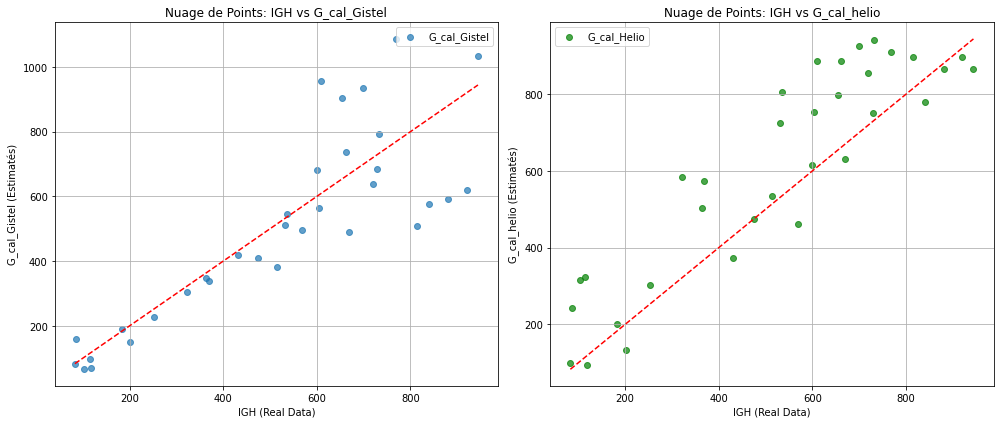

In [396]:
plot_scatter_comparison(df_merge_abidjan[(df_merge_abidjan['Date'] == '2017-04-01 00:00:00') | (df_merge_abidjan['Date'] == '2018-03-15 00:00:00') | (df_merge_abidjan['Date'] == '2018-09-18 00:00:00')])
                                         
                                        

,Année,Mois,Jour,Heure,IGH,G_cal_Gistel,G_cal_Helio,Date
649,2017,3,1,7,94.830508,97.855664,71.856794,2017-03-01
650,2017,3,1,8,264.316667,363.087460,210.768011,2017-03-01
651,2017,3,1,9,425.933333,631.031999,476.894264,2017-03-01
652,2017,3,1,10,450.000000,863.070549,606.762014,2017-03-01
653,2017,3,1,11,547.933333,1032.386228,750.637798,2017-03-01
...,...,...,...,...,...,...,...,...
7979,2018,12,31,13,500.750000,901.311269,851.003070,2018-12-31
7980,2018,12,31,14,361.416667,516.347733,687.993145,2018-12-31
7981,2018,12,31,15,249.400000,147.391671,692.142439,2018-12-31
7982,2018,12,31,16,145.216667,101.976829,493.682904,2018-12-31


#### Mbrimbo

In [124]:
metrics_mbrimbo = compute_metrics(df_merge_mbrimbo)
best_days_gistel_mbrimbo, best_days_helio_mbrimbo = select_best_days(metrics_mbrimbo)
plot_best_days(best_days_gistel_mbrimbo, df_merge_mbrimbo, ['G_cal_Gistel','G_cal_Helio'], 'mbrimbo')
plot_best_days(best_days_helio_mbrimbo, df_merge_mbrimbo, ['G_cal_Gistel','G_cal_Helio'], 'mbrimbo')

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\f

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\f

In [323]:
best_days_gistel_mbrimbo

[Timestamp('2018-08-18 00:00:00'),
 Timestamp('2018-11-20 00:00:00'),
 Timestamp('2018-07-23 00:00:00')]

In [324]:
best_days_helio_mbrimbo

[Timestamp('2018-09-17 00:00:00'),
 Timestamp('2018-09-13 00:00:00'),
 Timestamp('2018-08-14 00:00:00')]

In [325]:
for k in best_days_gistel_mbrimbo:
    print(k)
    print(metrics_mbrimbo[k])

2018-08-18 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': -0.6967931764208402, 'MAE': 0.3947836693602494, 'RMSE': 0.6967931764208402, 'MAPE': 0.3947836693602494}, 'G_cal_Helio': {'R': nan, 'MBE': 347.9821227645766, 'MAE': 197.15701006491594, 'RMSE': 347.9821227645766, 'MAPE': 197.15701006491594}}
2018-11-20 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': 24.68356488524205, 'MAE': 3.491310450529286, 'RMSE': 24.68356488524205, 'MAPE': 3.491310450529286}, 'G_cal_Helio': {'R': nan, 'MBE': 396.8121057068861, 'MAE': 56.12618185387356, 'RMSE': 396.8121057068861, 'MAPE': 56.12618185387356}}
2018-07-23 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': 21.135107366435932, 'MAE': 7.162236014503859, 'RMSE': 21.135107366435932, 'MAPE': 7.162236014503859}, 'G_cal_Helio': {'R': nan, 'MBE': 466.02553303295934, 'MAE': 157.9260894443177, 'RMSE': 466.02553303295934, 'MAPE': 157.9260894443177}}


In [326]:
for k in best_days_helio_mbrimbo:
    print(k)
    print(metrics_mbrimbo[k])

2018-09-17 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': -94.03566332194816, 'MAE': 10.322246248292883, 'RMSE': 94.03566332194816, 'MAPE': 10.322246248292883}, 'G_cal_Helio': {'R': nan, 'MBE': 0.25663875580778495, 'MAE': 0.028171103820832596, 'RMSE': 0.25663875580778495, 'MAPE': 0.028171103820832596}}
2018-09-13 00:00:00
{'G_cal_Gistel': {'R': nan, 'MBE': -324.40226173231554, 'MAE': 31.037338474197814, 'RMSE': 324.40226173231554, 'MAPE': 31.037338474197814}, 'G_cal_Helio': {'R': nan, 'MBE': 136.3806923069576, 'MAE': 13.048286673072864, 'RMSE': 136.3806923069576, 'MAPE': 13.048286673072864}}
2018-08-14 00:00:00
{'G_cal_Gistel': {'R': 1.0, 'MBE': -40.38229630032135, 'MAE': 17.201340205663744, 'RMSE': 40.723119516641106, 'MAPE': 19.073461765390697}, 'G_cal_Helio': {'R': 0.9999999999999999, 'MBE': 11.720325186110344, 'MAE': 16.435504541361553, 'RMSE': 40.32520365630213, 'MAPE': 16.96866279579735}}


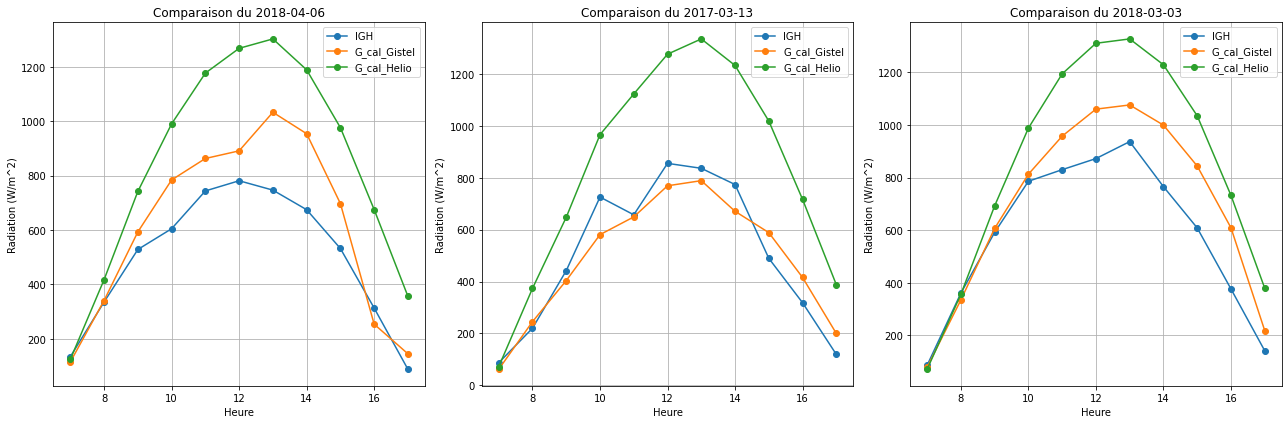

In [366]:
selected_days = ['2018-04-06 00:00:00', '2017-03-13 00:00:00', '2018-03-03 00:00:00']
n_days = 3

df = df_merge_mbrimbo

fig, axs = plt.subplots(1, n_days, figsize=(6 * n_days, 6))
    
if n_days == 1:
    axs = [axs]  # Make axs iterable if n_days is 1

for i, day in enumerate(selected_days):
    df_day = df[df['Date'] == day]
    axs[i].plot(df_day['Heure'], df_day['IGH'], label='IGH', marker='o')
    axs[i].plot(df_day['Heure'], df_day['G_cal_Gistel'], label='G_cal_Gistel', marker='o')
    axs[i].plot(df_day['Heure'], df_day['G_cal_Helio'], label='G_cal_Helio', marker='o')

    axs[i].set_title(f'Comparaison du {selected_days[i].split(" ")[0]}')
    axs[i].set_xlabel('Heure')
    axs[i].set_ylabel('Radiation (W/m^2)')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [376]:
metrics_mbrimbo[pd.Timestamp('2018-04-06 00:00:00')]

{'G_cal_Gistel': {'R': 0.9722365435552873,
  'MBE': 107.90010636648553,
  'MAE': 24.52268008410435,
  'RMSE': 152.79651072429047,
  'MAPE': 25.654290565379252},
 'G_cal_Helio': {'R': 0.9589393927598266,
  'MBE': 339.49979884478256,
  'MAE': 68.49020738291534,
  'RMSE': 381.1794210224922,
  'MAPE': 82.78661889766167}}

In [375]:
metrics_mbrimbo[pd.Timestamp('2018-03-03 00:00:00')]

{'G_cal_Gistel': {'R': 0.9646984104085887,
  'MBE': 112.94999113318282,
  'MAE': 20.577754495809927,
  'RMSE': 148.56762459485105,
  'MAPE': 23.48110342031103},
 'G_cal_Helio': {'R': 0.949999841312832,
  'MBE': 269.0412471971474,
  'MAE': 47.16158369761671,
  'RMSE': 317.368437867134,
  'MAPE': 53.623850899687085}}

In [357]:
metrics_mbrimbo[pd.Timestamp('2017-03-04 00:00:00')]

{'G_cal_Gistel': {'R': 0.9754446825235723,
  'MBE': 157.78253569710415,
  'MAE': 33.90584420945053,
  'RMSE': 180.45797951445164,
  'MAPE': 53.66702133812261},
 'G_cal_Helio': {'R': 0.9470065205208629,
  'MBE': 325.60447473310774,
  'MAE': 69.41069234421177,
  'RMSE': 368.43053316857555,
  'MAPE': 117.92883838662425}}

In [363]:
metrics_mbrimbo[pd.Timestamp('2017-05-19 00:00:00')]

{'G_cal_Gistel': {'R': 0.8546783222884512,
  'MBE': 115.67542549800383,
  'MAE': 34.07602830170619,
  'RMSE': 205.67989350549243,
  'MAPE': 150.30355536832133},
 'G_cal_Helio': {'R': 0.8956143944822047,
  'MBE': 304.3925234163477,
  'MAE': 67.94498948345655,
  'RMSE': 344.6014870682219,
  'MAPE': 214.79064076971395}}

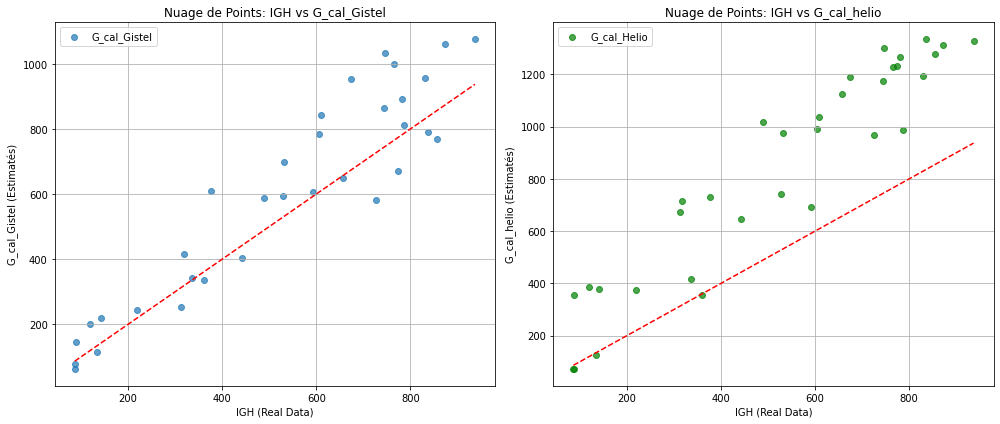

In [398]:
plot_scatter_comparison(df_merge_mbrimbo[(df_merge_mbrimbo['Date'] == '2018-04-06 00:00:00') | (df_merge_mbrimbo['Date'] == '2017-03-13 00:00:00') | (df_merge_mbrimbo['Date'] == '2018-03-03 00:00:00')])


#### Yakro

In [125]:
metrics_yakro = compute_metrics(df_merge_yakro)
best_days_gistel_yakro, best_days_helio_yakro = select_best_days(metrics_yakro)
plot_best_days(best_days_gistel_yakro, df_merge_yakro, ['G_cal_Gistel','G_cal_Helio'], 'yamoussoukro')
plot_best_days(best_days_helio_yakro, df_merge_yakro, ['G_cal_Gistel','G_cal_Helio'], 'yamoussoukro')


In [368]:
print(best_days_gistel_yakro)
print('--------------')
print(best_days_helio_yakro)


[Timestamp('2017-10-17 00:00:00'), Timestamp('2017-10-19 00:00:00'), Timestamp('2017-10-18 00:00:00')]
--------------
[Timestamp('2018-10-17 00:00:00'), Timestamp('2018-10-23 00:00:00'), Timestamp('2017-10-09 00:00:00')]


In [371]:
for k in best_days_gistel_yakro:
    print(k)
    print(metrics_yakro[k])

2017-10-17 00:00:00
{'G_cal_Gistel': {'R': 0.9799012729865065, 'MBE': 25.748775521185358, 'MAE': 8.8693478967743, 'RMSE': 48.880322594031895, 'MAPE': 31.931116190836235}, 'G_cal_Helio': {'R': 0.9859555594284599, 'MBE': 293.9827721158255, 'MAE': 78.52167509629417, 'RMSE': 329.9717014864372, 'MAPE': 110.00268257287502}}
2017-10-19 00:00:00
{'G_cal_Gistel': {'R': 0.9798166976509513, 'MBE': 34.240147732061104, 'MAE': 12.290694387615689, 'RMSE': 57.889358005671674, 'MAPE': 28.190586720556997}, 'G_cal_Helio': {'R': 0.9845639240920285, 'MBE': 317.81758944060545, 'MAE': 74.60080028543216, 'RMSE': 358.02094850500396, 'MAPE': 87.38080047577644}}
2017-10-18 00:00:00
{'G_cal_Gistel': {'R': 0.963587203937652, 'MBE': -8.887897076593903, 'MAE': 12.460529238393727, 'RMSE': 70.17485807577681, 'MAPE': 47.06584244785631}, 'G_cal_Helio': {'R': 0.9712765902847339, 'MBE': 309.9291786865237, 'MAE': 66.34683318784262, 'RMSE': 342.673413767081, 'MAPE': 111.83451053611371}}


In [372]:
for k in best_days_helio_yakro:
    print(k)
    print(metrics_yakro[k])

2018-10-17 00:00:00
{'G_cal_Gistel': {'R': 0.9728566763672734, 'MBE': -97.2539756614416, 'MAE': 20.94608034775361, 'RMSE': 130.07739745618733, 'MAPE': 32.19509832772253}, 'G_cal_Helio': {'R': 0.9739461198042123, 'MBE': 231.66651396741557, 'MAE': 41.98509782364646, 'RMSE': 260.5339926594143, 'MAPE': 59.13725197619096}}
2018-10-23 00:00:00
{'G_cal_Gistel': {'R': 0.9536874571991547, 'MBE': 31.597996439343834, 'MAE': 14.283429806405179, 'RMSE': 86.89211299753545, 'MAPE': 43.74082021313362}, 'G_cal_Helio': {'R': 0.9481387012986303, 'MBE': 249.54706548370407, 'MAE': 47.71620305906672, 'RMSE': 294.159789961569, 'MAPE': 77.13455759927463}}
2017-10-09 00:00:00
{'G_cal_Gistel': {'R': 0.9455635216064963, 'MBE': -205.8295001999979, 'MAE': 41.2929649284485, 'RMSE': 233.1431973842571, 'MAPE': 44.74209809937651}, 'G_cal_Helio': {'R': 0.9566987624907822, 'MBE': 249.51431679433165, 'MAE': 48.48818386124198, 'RMSE': 290.4442619189149, 'MAPE': 62.552008679575266}}


In [384]:
metrics_yakro[pd.Timestamp('2018-10-23 00:00:00')]

{'G_cal_Gistel': {'R': 0.9536874571991547,
  'MBE': 31.597996439343834,
  'MAE': 14.283429806405179,
  'RMSE': 86.89211299753545,
  'MAPE': 43.74082021313362},
 'G_cal_Helio': {'R': 0.9481387012986303,
  'MBE': 249.54706548370407,
  'MAE': 47.71620305906672,
  'RMSE': 294.159789961569,
  'MAPE': 77.13455759927463}}

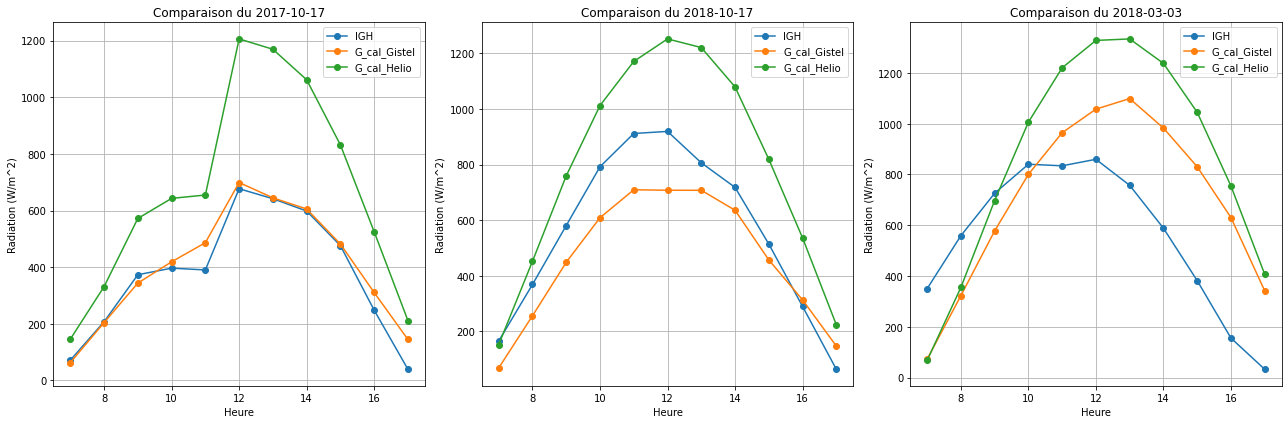

In [397]:
selected_days = ['2017-10-17 00:00:00', '2018-10-17 00:00:00', '2018-10-23 00:00:00']
n_days = 3

df = df_merge_yakro

fig, axs = plt.subplots(1, n_days, figsize=(6 * n_days, 6))
    
if n_days == 1:
    axs = [axs]  # Make axs iterable if n_days is 1

for i, day in enumerate(selected_days):
    df_day = df[df['Date'] == day]
    axs[i].plot(df_day['Heure'], df_day['IGH'], label='IGH', marker='o')
    axs[i].plot(df_day['Heure'], df_day['G_cal_Gistel'], label='G_cal_Gistel', marker='o')
    axs[i].plot(df_day['Heure'], df_day['G_cal_Helio'], label='G_cal_Helio', marker='o')

    axs[i].set_title(f'Comparaison du {selected_days[i].split(" ")[0]}')
    axs[i].set_xlabel('Heure')
    axs[i].set_ylabel('Radiation (W/m^2)')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

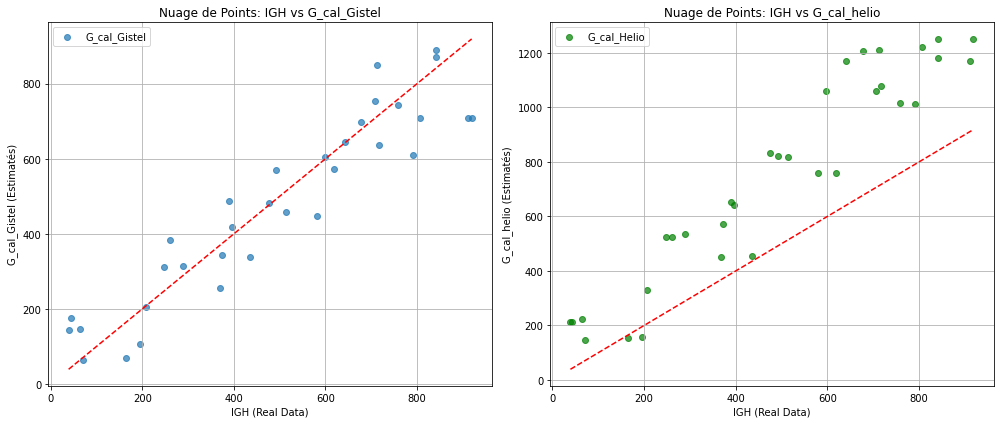

In [399]:
plot_scatter_comparison(df_merge_yakro[(df_merge_yakro['Date'] == '2017-10-17 00:00:00') | (df_merge_yakro['Date'] == '2018-10-17 00:00:00') | (df_merge_yakro['Date'] == '2018-10-23 00:00:00')])


### Comparaison au niveau des IGJ

In [67]:
def get_month_name_in_french(month):
    """ Miscelaneous"""
    months = {
        1: "Janvier", 2: "Février", 3: "Mars", 4: "Avril", 5: "Mai", 6: "Juin",
        7: "Juillet", 8: "Août", 9: "Septembre", 10: "Octobre", 11: "Novembre", 12: "Décembre"
    }
    return months.get(month, "Unknown")

def plot_IGJ_comparison(igh_df, city):
    """ plot """
    
    # Create output folder
    output_folder = os.path.join('data', 'miscellaneous', city, 'IGJ')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
#     igh_df['Date'] = pd.to_datetime(igh_df[['Année', 'Mois', 'Jour']])
    igh_df['Date'] = pd.to_datetime(dict(year=igh_df['Année'], month=igh_df['Mois'], day=igh_df['Jour']))

    # Calculate daily sums for IGH, G_cal_Gistel, and G_cal_Helio
    sum_df = igh_df.groupby(['Date']).agg({
        'IGH': 'sum',
        'G_cal_Gistel': 'sum',
        'G_cal_Helio': 'sum'
    }).reset_index()

    # Plotting for each month
    for (year, month), group in sum_df.groupby([sum_df['Date'].dt.year, sum_df['Date'].dt.month]):
        plt.figure(figsize=(16, 10))

        # Plotting IGH, G_cal_Gistel, and G_cal_Helio with 'Date' as x-axis
        plt.plot(group['Date'], group['IGH'], label='IGJ', marker='o', color='orange')
        plt.plot(group['Date'], group['G_cal_Gistel'], label='G_cal_Gistel', marker='o', color='blue')
        plt.plot(group['Date'], group['G_cal_Helio'], label='G_cal_Helio', marker='o', color='green')

        # Customize plot
        plt.xticks(rotation=90)
        month_name = get_month_name_in_french(month)
        plt.grid(True, axis='y', linewidth=0.5)
        plt.xlabel('Jour', fontsize=18)
        plt.ylabel('IGJ (Wh/m$^2$/jour)', fontsize=18)
        plt.title(f'Comparaison IGJ {city} de {month_name} {year}', fontsize=20)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=16)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=15)
        plt.tight_layout()

        # Save plot
        plot_filename = os.path.join(f"{output_folder}", f'Comparaison_IGJ_{city}_{month_name}_{year}.png')
        plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
        plt.close()

    print("IGJ, G_cal_Gistel, and G_cal_Helio plots saved successfully.")

#### Abidjan

In [127]:
plot_IGJ_comparison(df_merge_abidjan, 'abidjan')


IGJ, G_cal_Gistel, and G_cal_Helio plots saved successfully.


#### Mbrimbo

In [128]:
plot_IGJ_comparison(df_merge_mbrimbo, 'mbrimbo')


IGJ, G_cal_Gistel, and G_cal_Helio plots saved successfully.


#### Yakro

In [129]:
plot_IGJ_comparison(df_merge_yakro, 'yamoussoukro')


IGJ, G_cal_Gistel, and G_cal_Helio plots saved successfully.


### Comparaison au niveau des IGM

In [130]:
def plot_IGM_comparison(igh_df, city):
    """ Plot """
    
    # Create output folder
    output_folder = os.path.join('data', 'miscellaneous', city, 'IGM')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Calculate month sums for IGH, G_cal_Gistel, and G_cal_Helio
    sum_df = igh_df.groupby(['Année', 'Mois']).agg({
        'IGH': 'sum',
        'G_cal_Gistel': 'sum',
        'G_cal_Helio': 'sum'
    }).reset_index()

    # Plotting for each month
    for (year), group in sum_df.groupby(['Année']):
        plt.figure(figsize=(12, 10))

        # Plotting IGH, G_cal_Gistel, and G_cal_Helio
        plt.plot(group['Mois'], group['IGH'], label='IGM', marker='o', color='orange')
        plt.plot(group['Mois'], group['G_cal_Gistel'], label='G_cal_Gistel', marker='o', color='blue')
        plt.plot(group['Mois'], group['G_cal_Helio'], label='G_cal_Helio', marker='o', color='green')
        
        plt.grid(True, axis='y', linewidth=0.5)

        plt.xlabel('Mois', fontsize=18)
        plt.ylabel('IGM (Wh/m$^2$/jour)', fontsize=18)
        plt.title(f'IGM Station {city} Année {year}', fontsize=20)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=18)
        plt.yticks(fontsize=15)

        plt.tight_layout()

        # Save plot
        plot_filename = os.path.join(f"{output_folder}", f'Comparaison_IGM_{city}_{year}.png')
        plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
        plt.close()

    print("IGM, G_cal_Gistel, and G_cal_Helio plots saved successfully.")

#### Abidjan

In [131]:
plot_IGM_comparison(df_merge_abidjan, 'abidjan')


IGM, G_cal_Gistel, and G_cal_Helio plots saved successfully.


#### Mbrimbo

In [132]:
plot_IGM_comparison(df_merge_mbrimbo, 'mbrimbo')


IGM, G_cal_Gistel, and G_cal_Helio plots saved successfully.


#### Yakro

In [133]:
plot_IGM_comparison(df_merge_yakro, 'yamoussoukro')


IGM, G_cal_Gistel, and G_cal_Helio plots saved successfully.


### Nuage de Points des Meilleurs Jours (en terme d'evaluation)

In [168]:
def create_best_days_df(df, best_days_gistel, best_days_helio, city):
    """Create a DataFrame with the metrics of the 4 best days per month for both models (Gistel and Helio)"""
    
    best_days_df = pd.DataFrame()

    # Gather data for Gistel best days
    for month, days in best_days_gistel.items():
        for day in days:
            day_data = df[df['Date'] == day]
            day_data['Model'] = 'Gistel'
            best_days_df = pd.concat([best_days_df, day_data])

    # Gather data for Helio best days
    for month, days in best_days_helio.items():
        for day in days:
            day_data = df[df['Date'] == day]
            day_data['Model'] = 'Helio'
            best_days_df = pd.concat([best_days_df, day_data])
    
    df_final = best_days_df.sort_values(by=['Date']).reset_index(drop=True)
    
    df_final.to_csv(f'./{city}_metrics_comparison.csv')

    return df_final


In [162]:
metrics_abidjan = compute_metrics(df_merge_abidjan)
best_days_gistel_abidjan, best_days_helio_abidjan = select_best_days(metrics_abidjan)

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\f

In [170]:
df_metrics_abidjan = create_best_days_df(metrics_abidjan, best_days_gistel_abidjan, best_days_helio_abidjan, 'abidjan')

In [171]:
df_metrics_abidjan

,Date,G_cal_Gistel_R,G_cal_Gistel_MBE,G_cal_Gistel_MAE,G_cal_Gistel_RMSE,G_cal_Gistel_MAPE,G_cal_Helio_R,G_cal_Helio_MBE,G_cal_Helio_MAE,G_cal_Helio_RMSE,G_cal_Helio_MAPE,Month,Model
0,2017-03-03,0.968774,123.379580,28.968641,161.339838,63.288830,0.938329,150.616797,34.892918,182.677361,195.964616,2017-03,Gistel
1,2017-03-06,0.903261,98.786102,26.296901,174.101035,28.588723,0.899909,110.187087,25.498477,168.693268,43.479033,2017-03,Helio
2,2017-03-06,0.903261,98.786102,26.296901,174.101035,28.588723,0.899909,110.187087,25.498477,168.693268,43.479033,2017-03,Gistel
3,2017-03-09,0.939247,84.128742,24.740694,151.718677,33.502857,0.913620,52.615913,27.713293,159.275498,48.898385,2017-03,Gistel
4,2017-03-26,0.909511,148.430059,29.360134,194.972018,44.202365,0.896330,117.221252,24.032804,170.282038,42.004646,2017-03,Helio
5,2017-03-29,0.918284,182.381618,34.384800,220.592291,76.147643,0.895335,130.103177,25.328189,184.206519,68.347357,2017-03,Helio
6,2017-03-30,0.959445,121.927096,27.235303,149.468413,33.893068,0.954514,112.355374,24.182620,135.365300,47.189410,2017-03,Helio
7,2017-03-30,0.959445,121.927096,27.235303,149.468413,33.893068,0.954514,112.355374,24.182620,135.365300,47.189410,2017-03,Gistel
8,2017-04-01,0.890409,144.613026,30.722918,191.020424,47.460136,0.854908,122.206759,29.919443,183.412487,46.899651,2017-04,Gistel
9,2017-04-02,0.961992,184.029862,38.547502,205.991082,58.852009,0.928728,121.302855,29.629021,171.981298,50.114687,2017-04,Helio


In [172]:
metrics_mbrimbo= compute_metrics(df_merge_mbrimbo)
best_days_gistel_mbrimbo, best_days_helio_mbrimbo = select_best_days(metrics_mbrimbo)
df_metrics_mbrimbo = create_best_days_df(metrics_mbrimbo, best_days_gistel_mbrimbo, best_days_helio_mbrimbo, 'mbrimbo')

C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\alassane.kone\AppData\Local\Continuum\anaconda3\envs\boungou-sag-overload\lib\site-packages\numpy\lib\f

In [173]:
metrics_yakro= compute_metrics(df_merge_yakro)
best_days_gistel_yakro, best_days_helio_yakro = select_best_days(metrics_yakro)
df_metrics_yakro = create_best_days_df(metrics_yakro, best_days_gistel_yakro, best_days_helio_yakro, 'yamoussoukro')

#### Traçé de Nuages de Points

In [197]:
def plot_best_days_scatter(df_merge, best_days_df, city):
    """Plot scatter plots for each of the best days using the Gistel and Helio models"""
    
    output_folder = os.path.join('data', 'miscellaneous', city, 'scatter_plots')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Ensure that the dates are in datetime format
    best_days_df['Date'] = pd.to_datetime(best_days_df['Date'])
    df_merge['Date'] = pd.to_datetime(df_merge['Date'])
    
    df_filtered = df_merge[df_merge['Date'].isin(best_days_df['Date'])]


    # Get unique dates to plot
    unique_dates = df_filtered['Date'].unique()

    for date in unique_dates:
        df_day = df_filtered[df_filtered['Date'] == date]
        
        date = pd.to_datetime(date)

        # Plot scatter comparison
        plot_scatter_comparison(df_day, False, city, date.strftime("%Y-%m-%d"))
        
        # Save the plot
        plot_filename = os.path.join(output_folder, f'Scatter_Comparison_{city}_{date.strftime("%Y-%m-%d")}.png')
        plt.savefig(plot_filename, bbox_inches="tight", dpi=300)
        
        # Close plot
        plt.close()


In [198]:
plot_best_days_scatter(df_merge_abidjan, df_metrics_abidjan, 'abidjan')

In [199]:
plot_best_days_scatter(df_merge_mbrimbo, df_metrics_mbrimbo, 'mbrimbo')

In [200]:
plot_best_days_scatter(df_merge_yakro, df_metrics_yakro, 'yamoussoukro')

In [201]:
def plot_all_best_days_scatter(df_merge, best_days_df, city):
    """Plot scatter plots for each of the best days using the Gistel and Helio models"""
    
    output_folder = os.path.join('data', 'miscellaneous', city, 'scatter_plots')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Ensure that the dates are in datetime format
    best_days_df['Date'] = pd.to_datetime(best_days_df['Date'])
    df_merge['Date'] = pd.to_datetime(df_merge['Date'])
    
    df_filtered = df_merge[df_merge['Date'].isin(best_days_df['Date'])]


    # Plot scatter comparison
    plot_scatter_comparison(df_filtered, False, city)
        
    # Save the plot
    plot_filename = os.path.join(output_folder, f'all_scatter_comparison_{city}.png')
    plt.savefig(plot_filename, bbox_inches="tight", dpi=300)

        # Close plot
    plt.close()

In [202]:
plot_all_best_days_scatter(df_merge_abidjan, df_metrics_abidjan, 'abidjan')

In [203]:
plot_all_best_days_scatter(df_merge_mbrimbo, df_metrics_mbrimbo, 'mbrimbo')

In [204]:
plot_all_best_days_scatter(df_merge_yakro, df_metrics_yakro, 'yamoussoukro')

### Graphiques Supplémentaires

In [63]:
df_hourly_abidjan

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,CN,datetime,day_of_year,declination,B,equation_of_time,LST,TST,hour_angle,h_s,Ah,T0,T1,T2,TL,epsilon,G_CC,I_CC,D_CC,h_v,T_i,CR,CR_clear_sky,CR_cloudy_sky,Kt_Gistel,G_cal_Gistel
0,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,90.778741,2017-01-01,1,-23.011637,-1.377137,-3.670537,7,6.673491,-79.897634,0.124691,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,103.306047,1055.017647,1.963610,1.432249,1.997124,0.742874,0.691896,2.055382,0.970089,100.216095
1,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,119.385961,2017-01-01,1,-23.011637,-1.377137,-3.670537,8,7.673491,-64.897634,0.360137,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,349.955982,1002.080791,12.905963,1.432249,1.997124,0.298928,0.256729,1.031327,0.956418,334.704120
2,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,154.646979,2017-01-01,1,-23.011637,-1.377137,-3.670537,9,8.673491,-49.897634,0.587092,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,594.453476,905.682680,29.234320,1.432249,1.997124,0.233763,0.197090,0.893505,0.957872,569.410243
3,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,207.600115,2017-01-01,1,-23.011637,-1.377137,-3.670537,10,9.673491,-34.897634,0.796986,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,801.943544,724.074094,46.403641,1.432249,1.997124,0.237606,0.145814,0.826762,0.892160,715.462083
4,2017,1,1,11,5.50375,6.79600,5.34,-3.98,6.149875,303.592434,2017-01-01,1,-23.011637,-1.377137,-3.670537,11,10.673491,-19.897634,0.970806,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,948.369537,390.763721,60.110576,1.432249,1.997124,0.299523,0.150709,0.756891,0.803604,762.113780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,222.750852,2018-12-31,365,-23.085911,4.888835,-3.224639,13,12.680923,10.213840,1.044988,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,1001.619919,151.235251,65.566730,1.432249,1.999114,0.204770,0.152061,0.593664,0.904514,905.978803
7980,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,271.565901,2018-12-31,365,-23.085911,4.888835,-3.224639,14,13.680923,25.213840,0.914353,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,903.645103,529.244188,55.936605,1.432249,1.999114,0.279543,0.147382,0.585683,0.758775,685.663736
7981,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,134.208116,2018-12-31,365,-23.085911,4.888835,-3.224639,15,14.680923,40.213840,0.724746,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,733.480712,802.250685,40.538798,1.432249,1.999114,0.162148,0.141432,0.510663,0.955116,700.559061
7982,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,99.285949,2018-12-31,365,-23.085911,4.888835,-3.224639,16,15.680923,55.213840,0.507573,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,509.884145,946.331994,23.130130,1.432249,1.999114,0.166599,0.151429,0.536268,0.968465,493.804998


In [68]:
def plot_stripplot_radiance(df, city):
    """Plot stripplots of radiance per hour, with hue as day, for each month of each year."""
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Convert the date columns into a datetime object
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for year in years:
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            sns.stripplot(x='Heure', y='radiance', hue='Jour', data=df_filtered, jitter=True, palette='magma')

            # Add title and labels
            plt.grid(True)
            plt.title(f'Radiance par Heure de {month_name}-{year}')
            plt.xlabel('Heure (UTC)')
            plt.ylabel('Radiance')

            # Show the plot
            plt.legend(title='Jours')
            
            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}", f'Radiance_Heure_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [69]:
plot_stripplot_radiance(df_hourly_abidjan, 'abidjan')

In [70]:
plot_stripplot_radiance(df_hourly_mbrimbo, 'mbrimbo')

In [71]:
plot_stripplot_radiance(df_hourly_yakro, 'yamoussoukro')

#### Comptes Numeriques

In [72]:
def plot_cn_histogram(df, city):
    """Plot histogram of CN"""
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Convert the date columns into a datetime object
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for year in years:
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            sns.set_style('whitegrid')
            sns.kdeplot(data=df_filtered, x="CN", bw_adjust=0.2)


            # Add title and labels
            plt.grid(True)
            plt.title(f'CN de {month_name}-{year}')
            plt.xlabel('CN')
            plt.ylabel('Fréquence')

            # Show the plot
#             plt.legend(title='Jours')
            
            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}", f'CN_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [73]:
plot_cn_histogram(df_hourly_abidjan, 'abidjan')

In [74]:
plot_cn_histogram(df_hourly_mbrimbo, 'mbrimbo')

In [75]:
plot_cn_histogram(df_hourly_yakro, 'yamoussoukro')

#### Traçé des CC, CN

In [76]:
df_hourly_abidjan

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,CN,datetime,day_of_year,declination,B,equation_of_time,LST,TST,hour_angle,h_s,Ah,T0,T1,T2,TL,epsilon,G_CC,I_CC,D_CC,h_v,T_i,CR,CR_clear_sky,CR_cloudy_sky,Kt_Gistel,G_cal_Gistel,Date
0,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,90.778741,2017-01-01,1,-23.011637,-1.377137,-3.670537,7,6.673491,-79.897634,0.124691,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,103.306047,1055.017647,1.963610,1.432249,1.997124,0.742874,0.691896,2.055382,0.970089,100.216095,2017-01-01 07:00:00
1,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,119.385961,2017-01-01,1,-23.011637,-1.377137,-3.670537,8,7.673491,-64.897634,0.360137,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,349.955982,1002.080791,12.905963,1.432249,1.997124,0.298928,0.256729,1.031327,0.956418,334.704120,2017-01-01 08:00:00
2,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,154.646979,2017-01-01,1,-23.011637,-1.377137,-3.670537,9,8.673491,-49.897634,0.587092,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,594.453476,905.682680,29.234320,1.432249,1.997124,0.233763,0.197090,0.893505,0.957872,569.410243,2017-01-01 09:00:00
3,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,207.600115,2017-01-01,1,-23.011637,-1.377137,-3.670537,10,9.673491,-34.897634,0.796986,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,801.943544,724.074094,46.403641,1.432249,1.997124,0.237606,0.145814,0.826762,0.892160,715.462083,2017-01-01 10:00:00
4,2017,1,1,11,5.50375,6.79600,5.34,-3.98,6.149875,303.592434,2017-01-01,1,-23.011637,-1.377137,-3.670537,11,10.673491,-19.897634,0.970806,-0.880012,1.127725,0.994422,0.535976,2.658122,1.033980,948.369537,390.763721,60.110576,1.432249,1.997124,0.299523,0.150709,0.756891,0.803604,762.113780,2017-01-01 11:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7979,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,222.750852,2018-12-31,365,-23.085911,4.888835,-3.224639,13,12.680923,10.213840,1.044988,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,1001.619919,151.235251,65.566730,1.432249,1.999114,0.204770,0.152061,0.593664,0.904514,905.978803,2018-12-31 13:00:00
7980,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,271.565901,2018-12-31,365,-23.085911,4.888835,-3.224639,14,13.680923,25.213840,0.914353,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,903.645103,529.244188,55.936605,1.432249,1.999114,0.279543,0.147382,0.585683,0.758775,685.663736,2018-12-31 14:00:00
7981,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,134.208116,2018-12-31,365,-23.085911,4.888835,-3.224639,15,14.680923,40.213840,0.724746,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,733.480712,802.250685,40.538798,1.432249,1.999114,0.162148,0.141432,0.510663,0.955116,700.559061,2018-12-31 15:00:00
7982,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,99.285949,2018-12-31,365,-23.085911,4.888835,-3.224639,16,15.680923,55.213840,0.507573,-0.871706,1.128408,0.994422,0.539225,2.662056,1.033951,509.884145,946.331994,23.130130,1.432249,1.999114,0.166599,0.151429,0.536268,0.968465,493.804998,2018-12-31 16:00:00


In [82]:
def plot_cn_cc_line_plot(df, city):
    """Plot CN, CC """
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Convert the date columns into a datetime object
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for year in years:
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue
            
            df_filtered = df_filtered.sort_values(by='Heure')

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            plt.plot(df_filtered['Heure'], df_filtered['CR_clear_sky'], label='coef. CC', marker='o')
            plt.plot(df_filtered['Heure'], df_filtered['CR_cloudy_sky'], label='coef. CN', marker='o')


            # Add title and labels
            plt.grid(True)
            plt.title(f'Coefficents reflexions de {month_name}-{year}')
            plt.xlabel('Heure (UTC)')
#             plt.ylabel('Fréquence')

            # Show the plot
            plt.legend(title='Coefficients de Reflexion')
            
            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}", f'CR_CN_CC_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [83]:
plot_cn_cc_line_plot(df_hourly_abidjan, 'abidjan')

In [84]:
plot_cn_cc_line_plot(df_hourly_mbrimbo, 'mbrimbo')

In [85]:
plot_cn_cc_line_plot(df_hourly_yakro, 'yamoussoukro')

#### Graphiques en lien avec le Modele Heliostat

In [86]:
df_hourly_abidjan_h

,Année,Mois,Jour,Heure,ALB1_mean,ALB2_mean,Lat,Long,radiance,datetime,day_of_year,Ah,ε,declination,B,equation_of_time,TST,hour_angle,solar_elevation,θ_Z,"ρ(i,j)",z,h_v,h_s,h_s_vrai,m,δ_r,T0,T1,T2,TL,I_CC,T_rd,F_d_Z,F_d_v,D_CC,G_CC,L_atm,ρ_atm,T_rB_Z,T_rD_Z,T_rD_v,T(θ_Z),T(θ_v),ρ_Sol,ρ_N,n,K_C,G_cal_Helio
0,2017,1,1,6,0.13575,0.16725,5.34,-3.98,0.151500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,5.673491,-94.897634,-0.114875,96.581827,-0.058099,48,1.432249,-6.581827,-6.499757,NaN,NaN,1.127725,0.994422,0.535976,2.658122,NaN,0.068027,0.998422,0.172706,-11.769386,NaN,-0.000109,0.041734,NaN,0.067919,0.011749,NaN,NaN,NaN,NaN,NaN,0.050000,NaN
1,2017,1,1,7,0.87750,1.05950,5.34,-3.98,0.968500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,6.673491,-79.897634,0.124691,82.855760,0.342310,48,1.432249,7.144240,7.262619,7.434337,0.065446,1.127725,0.994422,0.535976,2.658122,57.340572,0.068027,0.998713,0.172706,34.203520,91.544092,0.000316,0.111781,0.326193,0.067939,0.011749,0.394132,0.337941,1.730783,5.917857,0.055057,0.944943,86.503928
2,2017,1,1,8,1.50375,1.82625,5.34,-3.98,1.665000,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,7.673491,-64.897634,0.360137,69.365660,0.207683,48,1.432249,20.634340,20.676751,2.797392,0.093263,1.127725,0.994422,0.535976,2.658122,273.174821,0.068027,1.009013,0.172706,66.414869,339.589690,0.000614,0.076600,0.548430,0.068640,0.011749,0.617070,0.560178,0.379216,2.382047,0.065449,0.934551,317.363890
3,2017,1,1,9,2.26625,2.78075,5.34,-3.98,2.523500,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,8.673491,-49.897634,0.587092,56.362085,0.200247,48,1.432249,33.637915,33.663906,1.789795,0.106214,1.127725,0.994422,0.535976,2.658122,505.421814,0.068027,1.009109,0.172706,85.409415,590.831229,0.000790,0.062668,0.645518,0.068646,0.011749,0.714165,0.657267,0.293097,1.783846,0.092288,0.907712,536.304378
4,2017,1,1,10,3.39450,4.23100,5.34,-3.98,3.812750,2017-01-01,1,-0.880012,1.033980,-23.011637,-1.377137,-3.670537,9.673491,-34.897634,0.796986,44.336061,0.234318,48,1.432249,45.663939,45.683134,1.388165,0.113046,1.127725,0.994422,0.535976,2.658122,704.404662,0.068027,0.973176,0.172706,94.207231,798.611893,0.000871,0.053534,0.696758,0.066202,0.011749,0.762960,0.708507,0.334437,1.565900,0.146804,0.853196,681.372207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,2018,12,31,13,3.64625,4.71700,5.34,-3.98,4.181625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,12.680923,10.213840,1.044988,30.126595,0.212524,48,1.432249,59.873405,59.888133,1.148731,0.117753,1.128408,0.994422,0.539225,2.662056,894.921012,0.068155,0.845951,0.172525,97.450880,992.371891,0.000901,0.045796,0.732050,0.057656,0.011758,0.789706,0.743809,0.283846,1.454236,0.142455,0.857545,851.003070
8705,2018,12,31,14,4.75700,5.98325,5.34,-3.98,5.370125,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,13.680923,25.213840,0.914353,37.611437,0.297993,48,1.432249,52.388563,52.405337,1.253875,0.115620,1.128408,0.994422,0.539225,2.662056,801.504285,0.068155,0.926821,0.172525,96.566795,898.071080,0.000893,0.049548,0.715847,0.063167,0.011758,0.779014,0.727605,0.438318,1.500405,0.233921,0.766079,687.993145
8706,2018,12,31,15,1.80475,2.24700,5.34,-3.98,2.025875,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,14.680923,40.213840,0.724746,48.475111,0.134330,48,1.432249,41.524889,41.545972,1.497167,0.111070,1.128408,0.994422,0.539225,2.662056,638.584415,0.068155,0.991207,0.172525,92.135874,730.720289,0.000852,0.056489,0.681510,0.067556,0.011758,0.749065,0.693268,0.149895,1.624313,0.052794,0.947206,692.142439
8707,2018,12,31,16,1.06400,1.28725,5.34,-3.98,1.175625,2018-12-31,365,-0.871706,1.033951,-23.085911,4.888835,-3.224639,15.680923,55.213840,0.507573,60.918232,0.106321,48,1.432249,29.081768,29.111829,2.037472,0.1025

In [87]:
df_hourly_abidjan_h.columns

Index(['Année', 'Mois', 'Jour', 'Heure', 'ALB1_mean', 'ALB2_mean', 'Lat',
       'Long', 'radiance', 'datetime', 'day_of_year', 'Ah', 'ε', 'declination',
       'B', 'equation_of_time', 'TST', 'hour_angle', 'solar_elevation', 'θ_Z',
       'ρ(i,j)', 'z', 'h_v', 'h_s', 'h_s_vrai', 'm', 'δ_r', 'T0', 'T1', 'T2',
       'TL', 'I_CC', 'T_rd', 'F_d_Z', 'F_d_v', 'D_CC', 'G_CC', 'L_atm',
       'ρ_atm', 'T_rB_Z', 'T_rD_Z', 'T_rD_v', 'T(θ_Z)', 'T(θ_v)', 'ρ_Sol',
       'ρ_N', 'n', 'K_C', 'G_cal_Helio'],
      dtype='object')

##### Albedo apparent

In [94]:
def plot_stripplot_albedo(df, city):
    """Plot stripplots of albedo per hour, with hue as day, for each month of each year."""
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city, 'helio')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Convert the date columns into a datetime object
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for year in years:
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month) & (df['Heure'] > 6)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            sns.stripplot(x='Heure', y='ρ(i,j)', hue='Jour', data=df_filtered, jitter=True, palette='viridis')

            # Add title and labels
            plt.grid(True)
            plt.title(f'Albedo Apparent par Heure de {month_name}-{year}')
            plt.xlabel('Heure (UTC)')
            plt.ylabel('Albedo')

            # Show the plot
            plt.legend(title='Jours')
            
            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}/helio", f'albedo_apparent_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [95]:
plot_stripplot_albedo(df_hourly_abidjan_h, 'abidjan')

In [96]:
plot_stripplot_albedo(df_hourly_mbrimbo_h, 'mbrimbo')

In [97]:
plot_stripplot_albedo(df_hourly_yakro_h, 'yamoussoukro')

##### Albedo au sol

In [98]:
def plot_stripplot_albedo_sol(df, city):
    """Plot stripplots of albedo per hour, with hue as day, for each month of each year."""
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city, 'helio')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Convert the date columns into a datetime object
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for year in years:
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month) & (df['Heure'] > 6)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            sns.stripplot(x='Heure', y='ρ_Sol', hue='Jour', data=df_filtered, jitter=True, palette='autumn')

            # Add title and labels
            plt.grid(True)
            plt.title(f'Albedo Sol par Heure de {month_name}-{year}')
            plt.xlabel('Heure (UTC)')
            plt.ylabel('Albedo')

            # Show the plot
            plt.legend(title='Jours')
            
            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}/helio", f'albedo_sol_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [99]:
plot_stripplot_albedo_sol(df_hourly_abidjan_h, 'abidjan')

In [100]:
plot_stripplot_albedo_sol(df_hourly_mbrimbo_h, 'mbrimbo')

In [101]:
plot_stripplot_albedo_sol(df_hourly_yakro_h, 'yamoussoukro')

##### Albedo des nuages

In [102]:
def plot_stripplot_albedo_nuages(df, city):
    """Plot stripplots of albedo per hour, with hue as day, for each month of each year."""
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city, 'helio')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Convert the date columns into a datetime object
    df['Date'] = pd.to_datetime(dict(year=df['Année'], month=df['Mois'], day=df['Jour'], hour=df['Heure']))

    # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for year in years:
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month) & (df['Heure'] > 6)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            sns.stripplot(x='Heure', y='ρ_N', hue='Jour', data=df_filtered, jitter=True, palette='cool')

            # Add title and labels
            plt.grid(True)
            plt.title(f'Albedo Nuages par Heure de {month_name}-{year}')
            plt.xlabel('Heure (UTC)')
            plt.ylabel('Albedo')

            # Show the plot
            plt.legend(title='Jours')
            
            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}/helio", f'albedo_nuages_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [103]:
plot_stripplot_albedo_nuages(df_hourly_abidjan_h, 'abidjan')

In [104]:
plot_stripplot_albedo_nuages(df_hourly_mbrimbo_h, 'mbrimbo')

In [105]:
plot_stripplot_albedo_nuages(df_hourly_yakro_h, 'yamoussoukro')

##### Indice d'ennuagement

In [120]:
def plot_boxplot_ennuagement_per_year(df, city):
    """ bx """
    
    years = df['Année'].unique()
    colors = ['#35CE8D', '#BE3E82']  # List of colors for each year
    
    output_folder = os.path.join('data', 'miscellaneous', 'from_document', city, 'helio')
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)


#     for i, year in enumerate(years):
#         plt.figure(figsize=(12, 9))
#         sns.boxplot(x='Heure', y='n', data=df[df['Année'] == year], color=colors[i])
# #         sns.histplot(df[df['Année'] == year], x="n", hue="Heure", element="step")

#         plt.title(f'Indice Ennuagement {year}',fontsize=20)
#         plt.xlabel('Heure', fontsize=18)
#         plt.ylabel('n', fontsize=18)
#         plt.xticks(rotation=45, fontsize=16)
#         plt.yticks(fontsize=15)       

#         plt.tight_layout()
        
#         # Save plot
#         plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}/helio", f'indice_ennuagement_{city}_{year}.png')
#         plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
#         plt.close()
    
     # Get unique years and months
    years = df['Année'].unique()
    months = df['Mois'].unique()

    # Loop through each year and month
    for i, year in enumerate(years):
        for month in months:
            month_name = get_month_name_in_french(month)

            # Filter the dataframe for the specific year and month
            df_filtered = df[(df['Année'] == year) & (df['Mois'] == month) & (df['Heure'] > 6)]

            # If there's no data for this month, skip it
            if df_filtered.empty:
                continue

            # Create the stripplot
            plt.figure(figsize=(10, 6))
            sns.stripplot(x='Heure', y='n', hue='Jour', data=df_filtered, jitter=True, palette='winter')
            plt.title(f'Indice Ennuagement {month_name} {year}',fontsize=20)
            plt.xlabel('Heure', fontsize=18)
            plt.ylabel('n', fontsize=18)
            plt.xticks(rotation=45, fontsize=16)
            plt.yticks(fontsize=15)       

            plt.tight_layout()

            # Save plot
            plot_filename = os.path.join(f"data/miscellaneous/from_document/{city}/helio", f'indice_ennuagement_{city}_{month_name}_{year}.png')
            plt.savefig(plot_filename, bbox_inches='tight', dpi=300)
            plt.close()

In [121]:
plot_boxplot_ennuagement_per_year(df_hourly_abidjan_h, 'abidjan')

In [122]:
plot_boxplot_ennuagement_per_year(df_hourly_mbrimbo_h, 'mbrimbo')

In [123]:
plot_boxplot_ennuagement_per_year(df_hourly_yakro_h, 'yamoussoukro')